# TPC-C Multi-Tenant with Distributed PVC and Tuned PostgreSQL 17.5

* data is generated and loaded into databases in a distributed filesystem
* experiments do not use preloaded data

* PostgreSQL uses improved args:
```
# --- Connection & Worker Processes ---
- "-c"
- "max_connections=1500"       # https://www.postgresql.org/docs/current/runtime-config-connection.html#GUC-MAX-CONNECTIONS
- "-c"
- "max_worker_processes=128"   # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-MAX-WORKER-PROCESSES
- "-c"
- "max_parallel_workers=64"    # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-MAX-PARALLEL-WORKERS
- "-c"
- "max_parallel_workers_per_gather=8"  # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-MAX-PARALLEL-WORKERS-PER-GATHER
- "-c"
- "max_parallel_maintenance_workers=8" # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-MAX-PARALLEL-MAINTENANCE-WORKERS

# --- Memory Settings ---
- "-c"
- "shared_buffers=256GB"       # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-SHARED-BUFFERS
- "-c"
- "effective_cache_size=350GB" # https://www.postgresql.org/docs/current/runtime-config-query.html#GUC-EFFECTIVE-CACHE-SIZE
- "-c"
- "work_mem=128MB"             # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-WORK-MEM
- "-c"
- "maintenance_work_mem=4GB"   # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-MAINTENANCE-WORK-MEM
- "-c"
- "temp_buffers=64MB"          # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-TEMP-BUFFERS
- "-c"
- "wal_buffers=16MB"           # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-WAL-BUFFERS
- "-c"
- "autovacuum_work_mem=1GB"    # https://www.postgresql.org/docs/current/runtime-config-autovacuum.html#GUC-AUTOVACUUM-WORK-MEM

# --- Autovacuum ---
- "-c"
- "autovacuum=on"                            # https://www.postgresql.org/docs/current/runtime-config-autovacuum.html#GUC-AUTOVACUUM
- "-c"
- "autovacuum_max_workers=10"               # https://www.postgresql.org/docs/current/runtime-config-autovacuum.html#GUC-AUTOVACUUM-MAX-WORKERS
- "-c"
- "autovacuum_vacuum_cost_limit=1000"       # https://www.postgresql.org/docs/current/runtime-config-autovacuum.html#GUC-AUTOVACUUM-VACUUM-COST-LIMIT
- "-c"
- "vacuum_cost_limit=1000"                  # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-VACUUM-COST-LIMIT
- "-c"
- "autovacuum_naptime=15s"                  # https://www.postgresql.org/docs/current/runtime-config-autovacuum.html#GUC-AUTOVACUUM-NAPTIME
- "-c"
- "autovacuum_vacuum_cost_delay=20ms"       # https://www.postgresql.org/docs/current/runtime-config-autovacuum.html#GUC-AUTOVACUUM-VACUUM-COST-DELAY

# --- WAL & Checkpoints (Ceph-optimized) ---
- "-c"
- "wal_level=replica"                       # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-WAL-LEVEL
- "-c"
- "wal_compression=on"                      # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-WAL-COMPRESSION
- "-c"
- "wal_writer_delay=500ms"                  # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-WAL-WRITER-DELAY
- "-c"
- "commit_delay=10000"                      # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-COMMIT-DELAY
- "-c"
- "synchronous_commit=off"                  # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-SYNCHRONOUS-COMMIT
- "-c"
- "max_wal_size=2GB"                        # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-MAX-WAL-SIZE
- "-c"
- "min_wal_size=1GB"                        # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-MIN-WAL-SIZE
- "-c"
- "checkpoint_timeout=15min"                # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-CHECKPOINT-TIMEOUT
- "-c"
- "checkpoint_completion_target=0.9"        # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-CHECKPOINT-COMPLETION-TARGET

# --- Planner Cost Tweaks (CephFS) ---
- "-c"
- "random_page_cost=4.0"                    # https://www.postgresql.org/docs/current/runtime-config-query.html#GUC-RANDOM-PAGE-COST
- "-c"
- "seq_page_cost=1.5"                       # https://www.postgresql.org/docs/current/runtime-config-query.html#GUC-SEQ-PAGE-COST
- "-c"
- "cpu_tuple_cost=0.01"                     # https://www.postgresql.org/docs/current/runtime-config-query.html#GUC-CPU-TUPLE-COST
- "-c"
- "effective_io_concurrency=2"              # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-EFFECTIVE-IO-CONCURRENCY
- "-c"
- "default_statistics_target=500"           # https://www.postgresql.org/docs/current/runtime-config-query.html#GUC-DEFAULT-STATISTICS-TARGET

# --- Locks and Limits ---
- "-c"
- "max_locks_per_transaction=128"           # https://www.postgresql.org/docs/current/runtime-config-locks.html#GUC-MAX-LOCKS-PER-TRANSACTION
- "-c"
- "max_pred_locks_per_transaction=128"      # https://www.postgresql.org/docs/current/runtime-config-locks.html#GUC-MAX-PRED-LOCKS-PER-TRANSACTION
- "-c"
- "max_stack_depth=7MB"                     # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-MAX-STACK-DEPTH
- "-c"
- "max_files_per_process=4000"              # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-MAX-FILES-PER-PROCESS

# --- Miscellaneous ---
- "-c"
- "huge_pages=try"                          # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-HUGE-PAGES
```

In [1]:
import pandas as pd
pd.set_option("display.max_rows", None)
pd.set_option('display.max_colwidth', None)
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

from bexhoma import collectors

%matplotlib inline

# Functions for Nice Plots

In [2]:
def sanitize_filename(title, max_length=100):
    # Replace non-alphanumeric characters with underscores
    safe = re.sub(r'[^a-zA-Z0-9-_]+', '_', title.strip())
    # Truncate to a safe length
    return safe[:max_length].rstrip('_')
    
def plot_bars(df, y, title, estimator):
    df_plot = df.copy()
    #df_plot = df_plot[df_plot['client']=='1']
    df_plot = df_plot.sort_values(['num_tenants','type'])
    # Hatch styles for each type
    hatch_map = {
        'container': '/',
        'database': '\\',
        'schema': 'x'
    }
    hue_order = ['container', 'database', 'schema']
    # Create the plot
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(
        data=df_plot,
        x='num_tenants',
        y=y,
        hue='type',
        estimator=estimator,
        palette='Set2',
        hue_order=hue_order
    )
    show_height = False
    if show_height:
        for bar in ax.patches:
            height = bar.get_height()
            if height > 0:
                ax.text(
                    bar.get_x() + bar.get_width() / 2,  # X: center of bar
                    height,                             # Y: top of bar
                    f'{height:.1f}',                    # Text (1 decimal place)
                    ha='center', va='bottom', fontsize=8
                )
    # Get tick positions (i.e., the x-axis categories)
    xticks = ax.get_xticks()
    bar_width = ax.patches[0].get_width()
    # Create a mapping from (num_tenants, type) to hatch
    grouped = df_plot.groupby(['num_tenants', 'type']).agg({y: estimator}).reset_index()
    #print(grouped)
    grouped_dict = {(row['num_tenants'], row['type']): hatch_map[row['type']] for _, row in grouped.iterrows()}
    bars = sorted(ax.patches, key=lambda bar: bar.get_x() if bar.get_height() > 0 else 10000)
    for bar, (_, row) in zip(bars, grouped.iterrows()):
        bar.my_id = (row['num_tenants'], row['type'])  # or anything else like an index or uuid
        bar.set_hatch(hatch_map[row['type']]) #grouped_dict[(bar.my_id)])
        bar.set_edgecolor('black')
        bar.set_linewidth(1)
    handles, labels = ax.get_legend_handles_labels()
    for handle, label in zip(handles, labels):
        hatch = hatch_map.get(label, '')
        handle.set_hatch(hatch)
    # Final touches
    plt.legend(title='Type')
    ax.legend(fontsize=18)
    #ax.legend(fontsize=18, loc='upper left', bbox_to_anchor=(1, 1))  # move outside
    plt.title(f"{title}", fontsize=24)
    #plt.title(f"{title} by Number of Tenants and Type", fontsize=24)
    plt.xlabel("Number of Tenants", fontsize=18)
    ax.tick_params(axis='both', labelsize=16)
    # Remove y-axis label
    ax.set_ylabel('')  # or ax.set(ylabel='')
    plt.tight_layout()
    filename = "tpcc_" + filename_prefix + sanitize_filename(title) + ".png"    
    plt.savefig(filename, dpi=300, bbox_inches="tight")
    plt.show()

def plot_boxplots(df, y, title):
    plt.figure(figsize=(10, 6))
    # Hatch styles for each type
    hatch_map = {
        'container': '/',
        'database': '\\',
        'schema': 'x'
    }
    hue_order = ['container', 'database', 'schema']
    
    # Plot boxplots grouped by num_tenants and colored by type
    ax = sns.boxplot(
        data=df,
        x='num_tenants',
        y=y,#'Goodput (requests/second)',
        hue='type',
        palette='Set2'  # consistent colors per type
    )
    # Add vertical separator lines between groups
    # Get the number of unique num_tenants and type
    num_groups = df['num_tenants'].nunique()
    num_types = df['type'].nunique()
    
    # Extract hue order
    hue_order = ax.get_legend_handles_labels()[1]
    num_hue = len(hue_order)
    
    # Get hue order from seaborn (types)
    _, type_order = ax.get_legend_handles_labels()
    num_types = len(type_order)
    
    #print(len(ax.patches))
    # Set hatches correctly: patches are grouped by x then by hue
    for i, patch in enumerate(ax.patches):
        #print(i)
        type_index = i // (num_groups)
        if type_index >= num_types:
            break
        type_name = type_order[type_index]
        patch.set_hatch(hatch_map.get(type_name, ''))
        #print(hatch_map.get(type_name, ''))
        patch.set_edgecolor('black')
        patch.set_linewidth(1)
    
    # Each num_tenants group has num_types boxes
    for i in range(1, num_groups):
        xpos = i - 0.5 #0.5
        ax.axvline(x=xpos, color='gray', linestyle='--', alpha=0.5)
    
    
    # Update legend with matching hatches
    handles, labels = ax.get_legend_handles_labels()
    for handle, label in zip(handles, labels):
        hatch = hatch_map.get(label, '')
        handle.set_hatch(hatch)
        handle.set_edgecolor('black')
        handle.set_linewidth(1)
    
    #title = "Goodput [req/s] Distribution per Tenant"
    plt.title(title, fontsize=24)
    plt.xlabel("Number of Tenants")
    plt.ylabel("")#"Goodput (requests/second)")
    plt.xlabel("Number of Tenants", fontsize=18)
    ax.tick_params(axis='both', labelsize=16)
    plt.legend(title="Type")
    ax.legend(fontsize=18)
    plt.tight_layout()
    filename = "tpcc_" + filename_prefix + sanitize_filename(title) + ".png"    
    plt.savefig(filename, dpi=300, bbox_inches="tight")
    plt.show()

# Collect Results

In [3]:
path = r"C:\data\benchmarks"
#path = r"/home/perdelt/benchmarks"
filename_prefix = "cpupolicy_"

In [4]:
codes = [
    "1755690481",
    "1755693435",
    "1755696350",
]

codes

['1755690481', '1755693435', '1755696350']

In [5]:
collect = collectors.benchbase(path, codes)

# Get all Metrics Names

In [6]:
code = codes[0]
evaluate = collect.get_evaluator(code)
df_metrics=collect.get_metrics(evaluate)
df_metrics

title  \
total_cpu_memory                                                                             Memory Usage [MiB]   
total_cpu_memory_cached                                                               Memory Usage Cached [MiB]   
total_cpu_util                                                                              CPU Utilization [%]   
total_cpu_throttled                                                                            CPU Throttle [%]   
total_cpu_throttled_s                                                                    CPU Throttled Time [s]   
total_cpu_util_others                                                                CPU Utilization Others [%]   
total_cpu_util_s                                                                       CPU Utilization Time [s]   
total_cpu_util_user_s                                                                         CPU User Time [s]   
total_cpu_util_sys_s                                                                        CPU System Time [s]   
total_cpu_util_others_s                                                         CPU Utilization Time Others [s]   
total_network_rx                                                                         Network Rx Total [MiB]   
total_network_tx                                                                         Network Tx Total [MiB]   
total_fs_read                                                                       Filesystem Read Total [MiB]   
total_fs_write                                                                     Filesystem Write Total [MiB]   
total_gpu_util                                                                              GPU Utilization [%]   
total_gpu_power                                                                             GPU Power Usage [W]   
total_gpu_memory                                                                         GPU Memory Usage [MiB]   
core_variance                                                                     Core Utilization Variance [%]   
pg_stat_database_blks_read                                                               Disk Blocks Read Count   
pg_stat_database_blks_hit                                                                Buffer Cache Hit Count   
cache_hit_ratio                                                                          Buffer Cache Hit Ratio   
pg_statio_user_tables_heap_blocks_hit                                                    Table Buffer Hit Count   
pg_statio_user_tables_heap_blocks_read                                                  Table Blocks Read Count   
pg_stat_bgwriter_checkpoint_sync_time_total                                           Checkpoint Sync Time [ms]   
pg_stat_bgwriter_checkpoint_write_time_total                                         Checkpoint Write Time [ms]   
pg_stat_bgwriter_checkpoint_write_time_per_sync_time   Time spent writing vs syncing during checkpoints [ratio]   
pg_locks_count                                                                              Total Locks Current   
pg_locks_count_accessexclusivelock                                                 AccessExclusiveLocks Current   
pg_locks_count_accesssharelock                                                         AccessShareLocks Current   
pg_locks_count_exclusivelock                                                             ExclusiveLocks Current   
pg_locks_count_rowexclusivelock                                                       RowExclusiveLocks Current   
pg_locks_count_rowsharelock                                                               RowShareLocks Current   
pg_locks_count_sharelock                                                                     ShareLocks Current   
pg_locks_count_sharerowexclusivelock                                             ShareRowExclusiveLocks Current   
pg_locks_count_shareupdateexclusivelock                                       Sha

# Get Aggregated Values per Experiment

In [68]:
def show_summary_monitoring_table(evaluation, type):
    component='stream'
    #scale = 1
    results = []
    for idx, row in df_metrics.iterrows():
        if row["active"] == False:
            continue
        #print(idx, row["title"])
        metric_name = idx
        method = 'diff' if row["metric"] == 'counter' else 'mean'
        col_name = row["title"]
        #scale = metric[3] if len(metric) > 3 else 1
        df = evaluation.get_monitoring_metric(metric=metric_name, component=component)
        # Apply scaling if needed
        #if scale != 1:
        #    df = df * scale
        # Process dataframe according to method
        if method == 'diff':
            processed = df.max().sort_index() - df.min().sort_index()
        elif method == 'max':
            processed = df.max().sort_index()
        elif method == 'mean':
            processed = df.mean().sort_index()
        else:
            raise ValueError(f"Unknown processing method: {method}")
        df_cleaned = pd.DataFrame(processed)
        df_cleaned.columns = [col_name]
        results.append(df_cleaned)
    # Combine all dataframes horizontally (join on index)
    summary_df = pd.concat(results, axis=1).round(2)
    #summary_df = summary_df.reindex(index=evaluators.natural_sort(summary_df.index))
    return summary_df

# Get 

In [93]:
def get_monitoring_new(evaluation, type="stream"):
    """
    Retrieves and aggregates monitoring metrics for a specified component type, grouped by client.

    This function obtains detailed monitoring data using `show_summary_monitoring_table` for the
    specified component type (default "stream"). It adds a 'client' column extracted from the DataFrame index,
    then aggregates various hardware and application metrics by client using sum or mean as appropriate.

    :param evaluation: The evaluation object containing monitoring data.
    :type evaluation: object
    :param type: The component type to filter monitoring metrics (default is "stream").
    :type type: str, optional
    :return: A DataFrame with aggregated monitoring metrics grouped by client. If no data is available, returns None.
    :rtype: pandas.DataFrame or None
    """
    df_monitoring = show_summary_monitoring_table(evaluation, type)
    if len(df_monitoring) > 0:
        df = df_monitoring.copy()  # avoid modifying original
        df['client'] = df.index.str.rsplit('-', n=1).str[-1]
        #print(df)
        agg_dict = {
            'CPU [CPUs]': 'sum',
            'Max RAM [Gb]': 'sum',
            'Max RAM Cached [Gb]': 'sum',
            'Max CPU': 'sum',
            'CPU Throttled': 'sum',
            'Locks': 'sum',
            'Access Exclusive': 'sum',
            'Access Share': 'sum',
            'Exclusive': 'sum',
            'Row Exclusive': 'sum',
            'Row Share': 'sum',
            'Share': 'sum',
            'Share Row Exclusive': 'sum',
            'Share Update Exclusive': 'sum',
            'SI Read': 'sum',
            'Active': 'sum',
            'Idle': 'sum',
            'Transactions Idle': 'sum',
            'Transactions Aborted': 'sum',
            'Block Hits': 'sum',
            'Block Reads': 'sum',
            'Heap Reads': 'sum',
            'Heap Hits': 'sum',
            'Sync Time': 'sum',
            'Write Time': 'sum',
            'Number Autoanalyze': 'sum',
            'Number Autovacuum': 'sum',
            'Cache Hit Ratio [%]': 'mean',
            'Variance of Core Util [%]': 'max',
        }
        agg_dict = df_monitoring.columns
        # Filter aggregation dictionary to only include columns present in df
        #filtered_agg_dict = {col: func for col, func in agg_dict.items() if col in df.columns}
        filtered_agg_dict = {col: 'sum' for col in agg_dict if col in df.columns}
        #print(filtered_agg_dict)
        # Apply groupby with filtered aggregation
        result = df.groupby('client').agg(filtered_agg_dict).reset_index()
        return result

In [94]:
type="stream"
df_performance = pd.DataFrame()
for code in codes:
    evaluation = collect.get_evaluator(code)
    workload = collect.get_workload(code)
    df = get_monitoring_new(evaluation, type)
    if df is None:
        print(code, df)
        continue
    df['type'] = workload['tenant_per']
    df['num_tenants'] = workload['num_tenants']
    df['code']=code
    df_performance = pd.concat([df_performance, df])
df_performance = df_performance.sort_values(['num_tenants', 'type'])
df_performance.T

0             1  \
client                                                       1             2   
Memory Usage [MiB]                                    25577.48      41376.06   
Memory Usage Cached [MiB]                             55784.51      76376.31   
CPU Utilization [%]                                       1.83           1.5   
CPU Throttle [%]                                           0.0           0.0   
CPU Throttled Time [s]                                     0.0           0.0   
CPU Utilization Others [%]                                2.37           2.1   
CPU Utilization Time [s]                              36342.17      37168.74   
CPU User Time [s]                                     23868.35      24486.85   
CPU System Time [s]                                   12473.81      12681.88   
CPU Utilization Time Others [s]                       60083.79      61209.69   
Core Utilization Variance [%]                            47.96         51.98   
Disk Blocks Read Count                               2657307.0     5366363.0   
Buffer Cache Hit Count                            2638030924.0  6541039564.0   
Buffer Cache Hit Ratio                                     2.0          1.99   
Table Buffer Hit Count                            1389346939.0  3423106408.0   
Table Blocks Read Count                              2207945.0     4361201.0   
Checkpoint Sync Time [ms]                                  0.0           0.0   
Checkpoint Write Time [ms]                                 0.0           0.0   
Total Locks Current                                    2026.62       2009.87   
AccessExclusiveLocks Current                              10.8          8.08   
AccessShareLocks Current                                 666.5        656.92   
ExclusiveLocks Current                                   35.38         34.81   
RowExclusiveLocks Current                               663.84        662.44   
RowShareLocks Current                                   645.57         643.1   
ShareLocks Current                                         0.0           0.0   
ShareRowExclusiveLocks Current                             0.0           0.0   
ShareUpdateExclusiveLocks Current                         4.53          4.51   
SIReadLocks Current                                        0.0           0.0   
Autoanalyze Run Count                                    431.0        1169.0   
Autovacuum Run Count                                     371.0         978.0   
Number of Idle Sessions                                   3.67          2.98   
Number of Idle-in-transaction Sessions                   48.92         50.44   
Number of Idle-in-transaction Aborted Sessions             0.0           0.0   
Number of Active Sessions                                209.0         209.0   
Longest Active Transaction                              175.97        586.15   
Longest Idle Session (no transaction)                      0.0           0.0   
Longest Idle-in-Transaction                               0.26          0.22   
Longest Idle-in-Transaction (Aborted)                      0.0           0.0   
Dead tuples per vacuum operation [tuples/vacuum]           inf           inf   
type                                                 container     container   
num_tenants                                                  2             2   
code                                                1755696350    1755696350   

                                                             0             1  \
client                                                       1             2   
Memory Usage [MiB]                                    16083.83      26656.29   
Memory Usage Cached [MiB]                             39700.67      54651.05   
CPU Utilization [%]                                       0.64          0.98   
CPU Throttle [%]                                           0.0           0.0   
CPU Throttled Time [s]                                     0

# Bar Plots of Aggregated Values per Metric

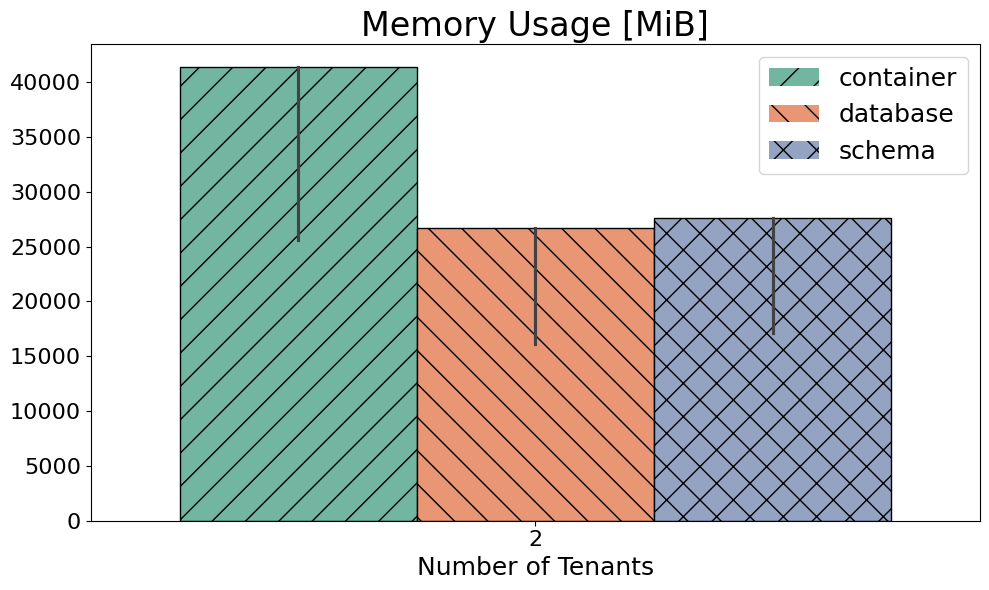

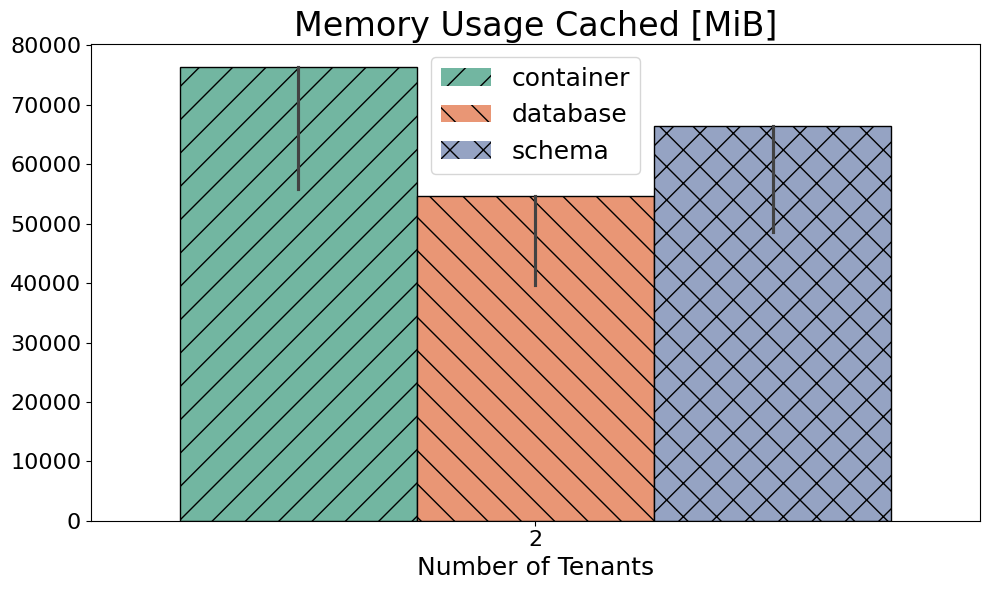

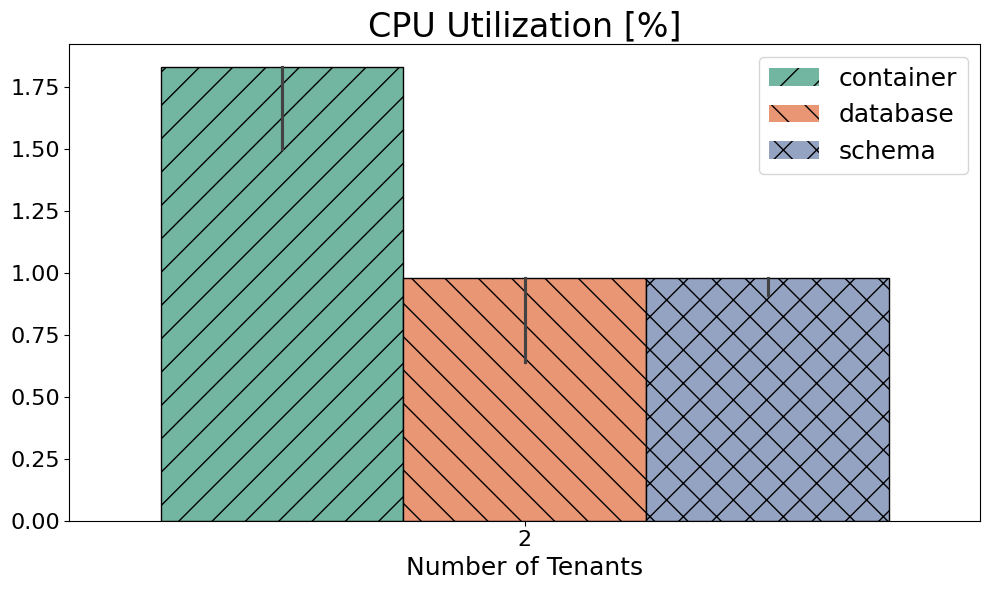

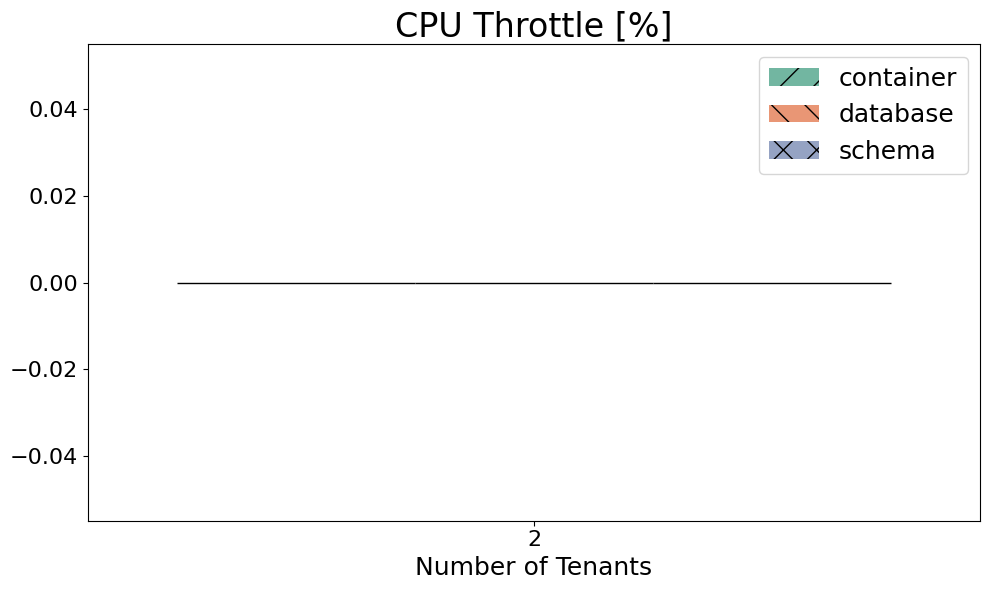

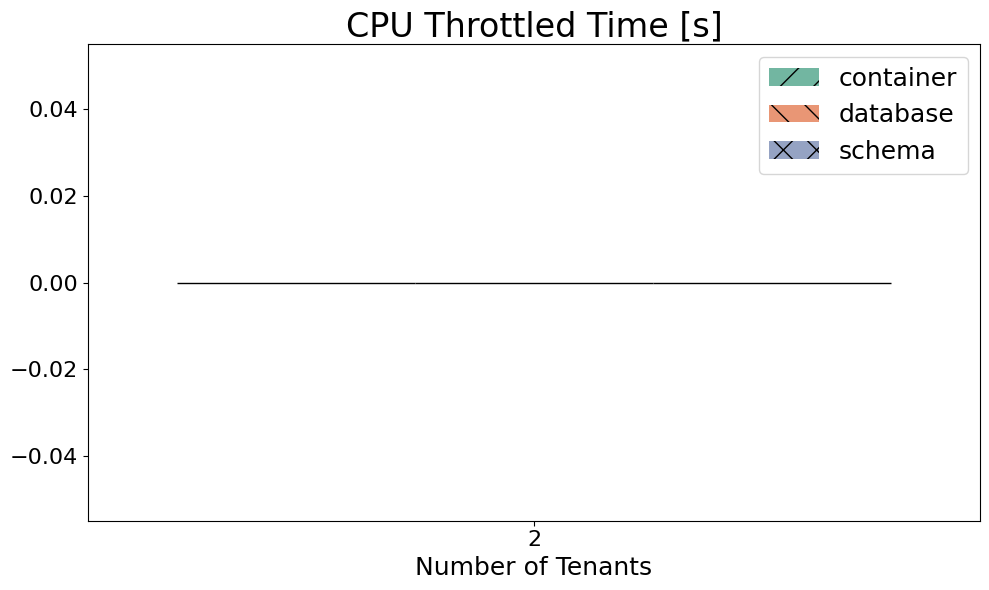

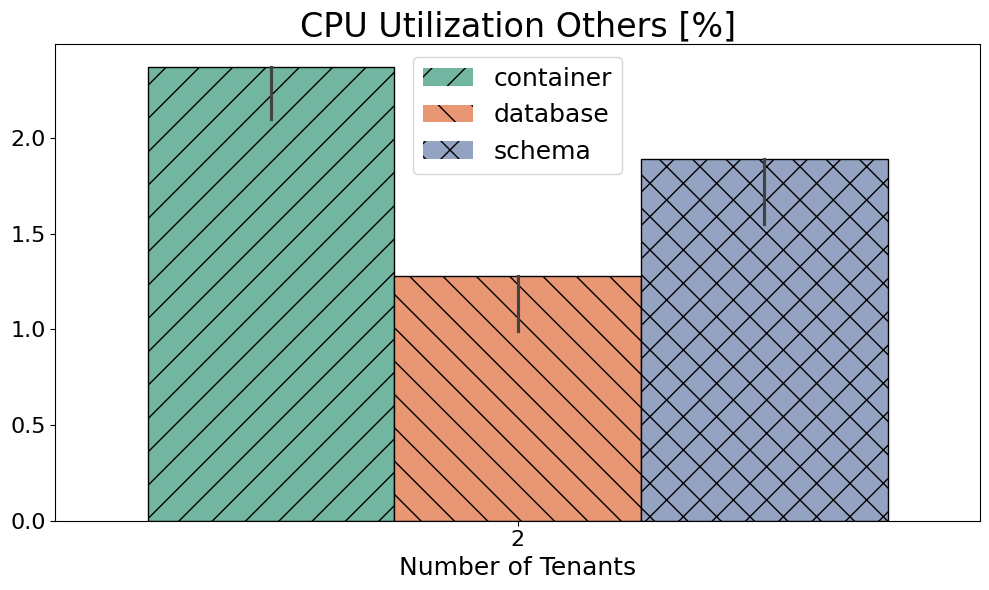

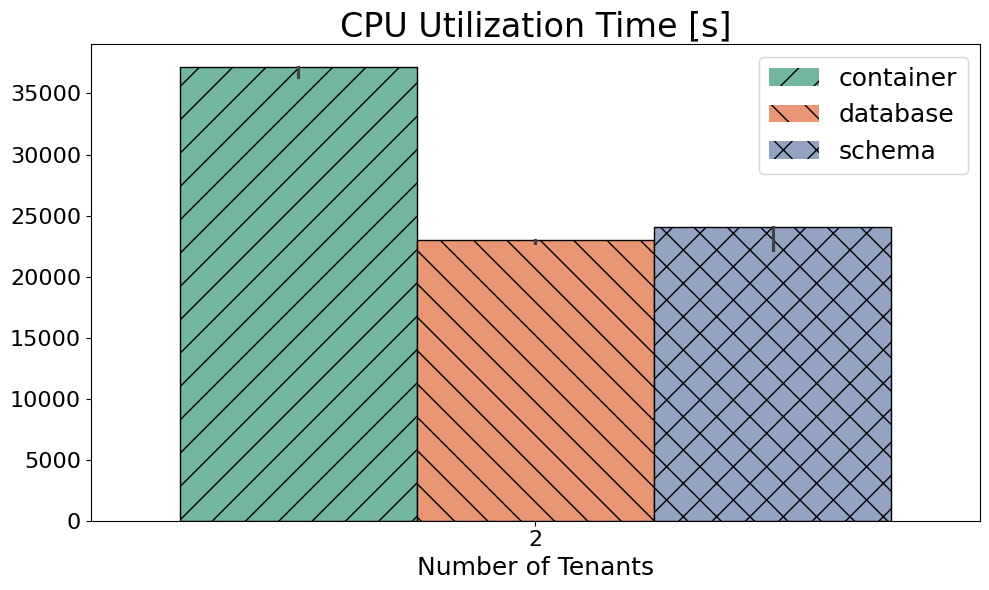

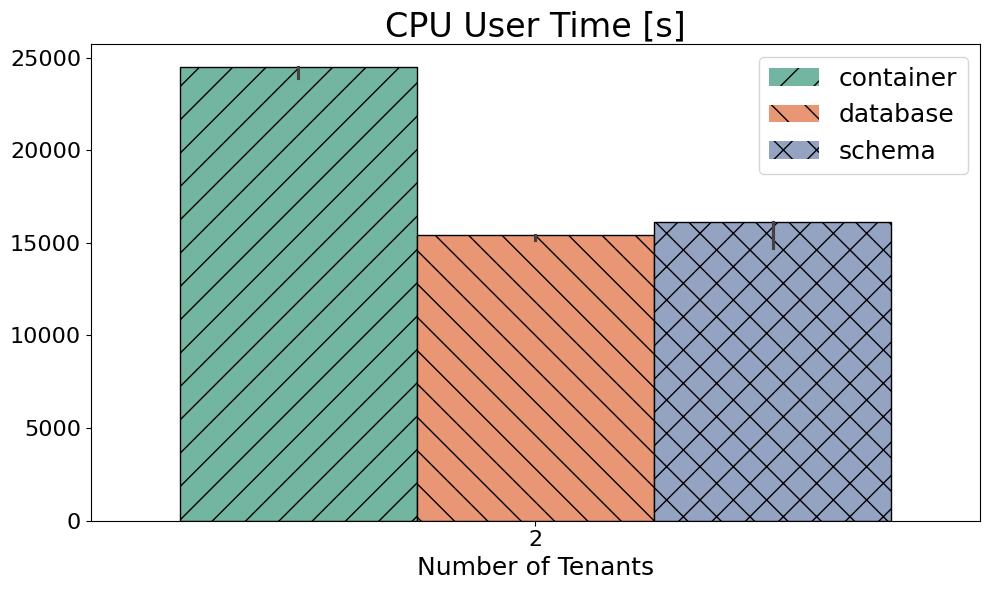

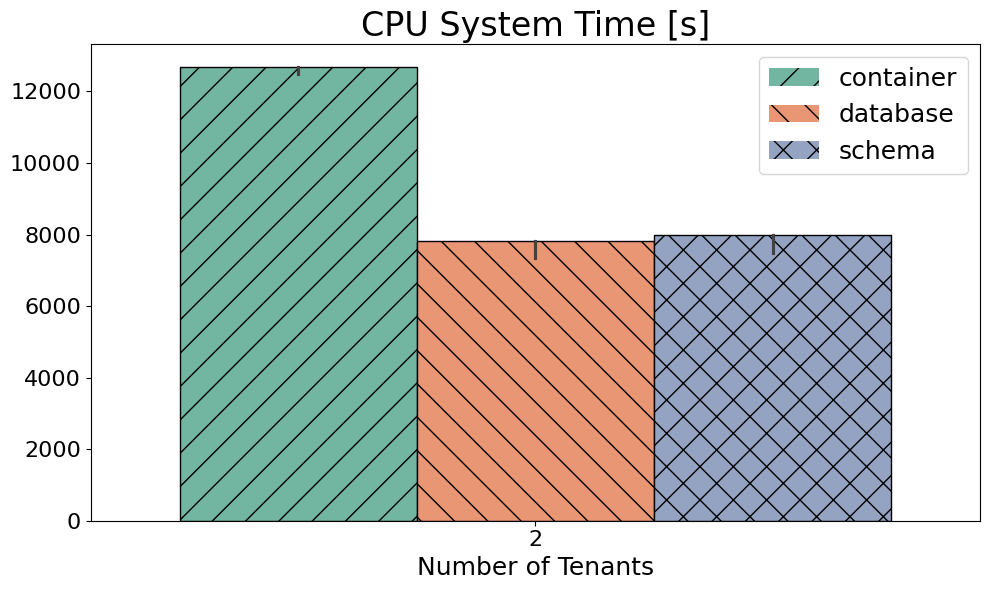

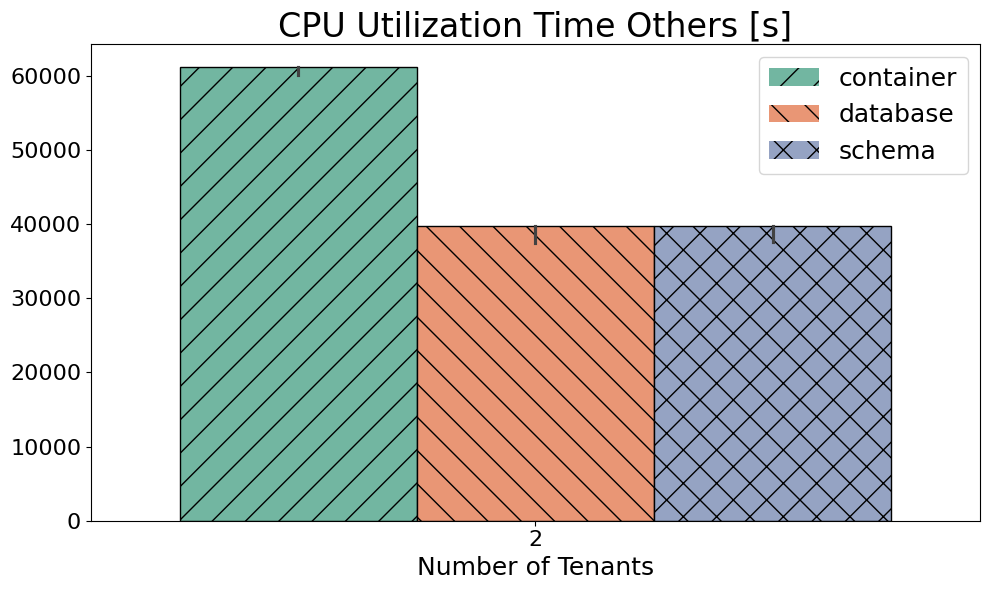

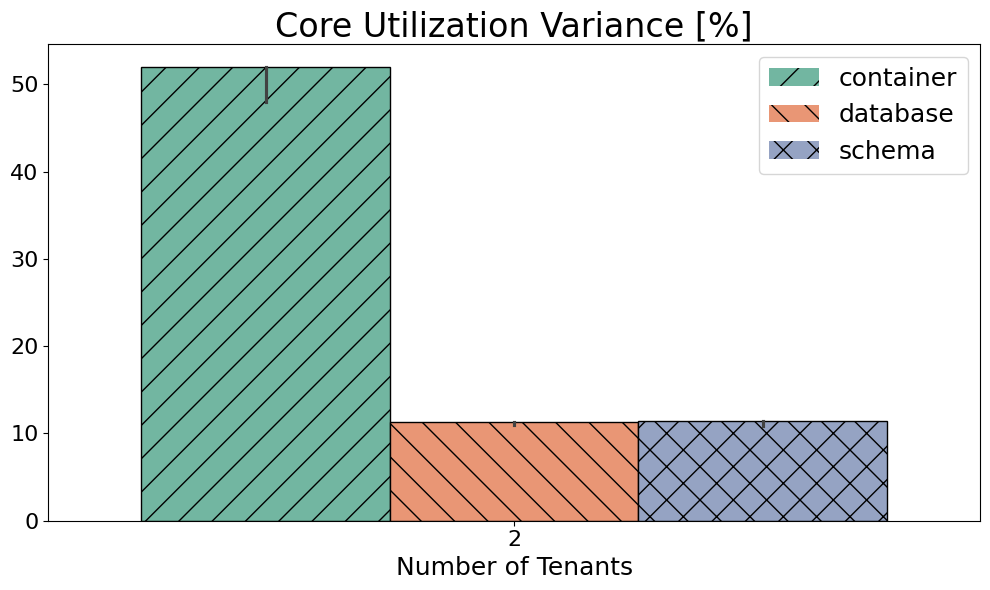

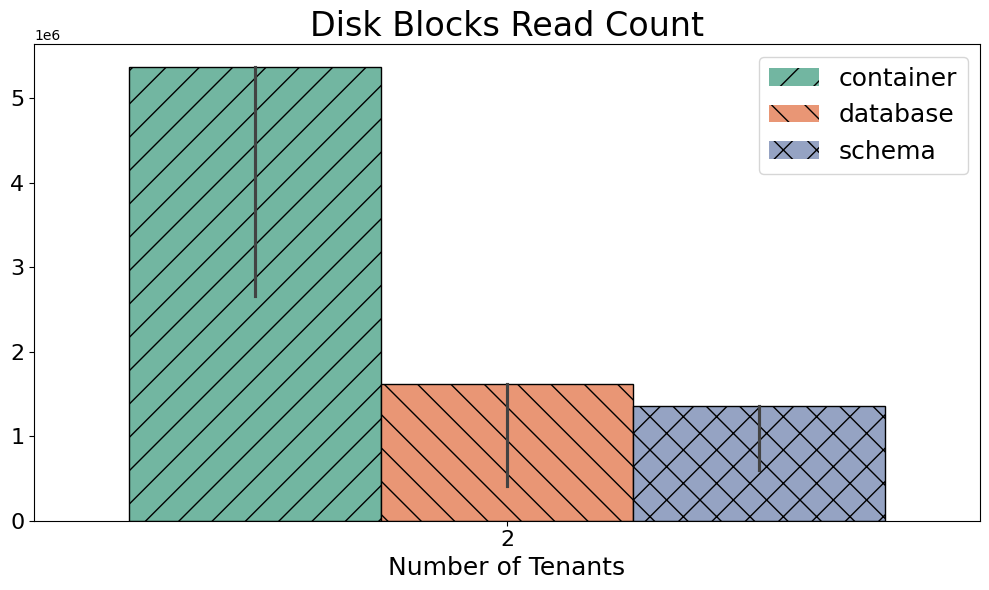

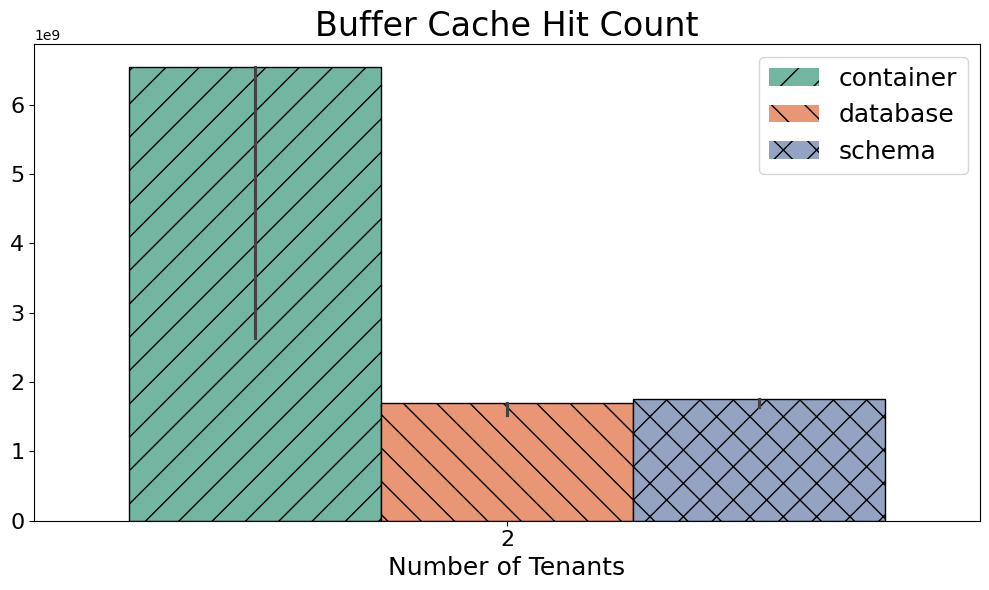

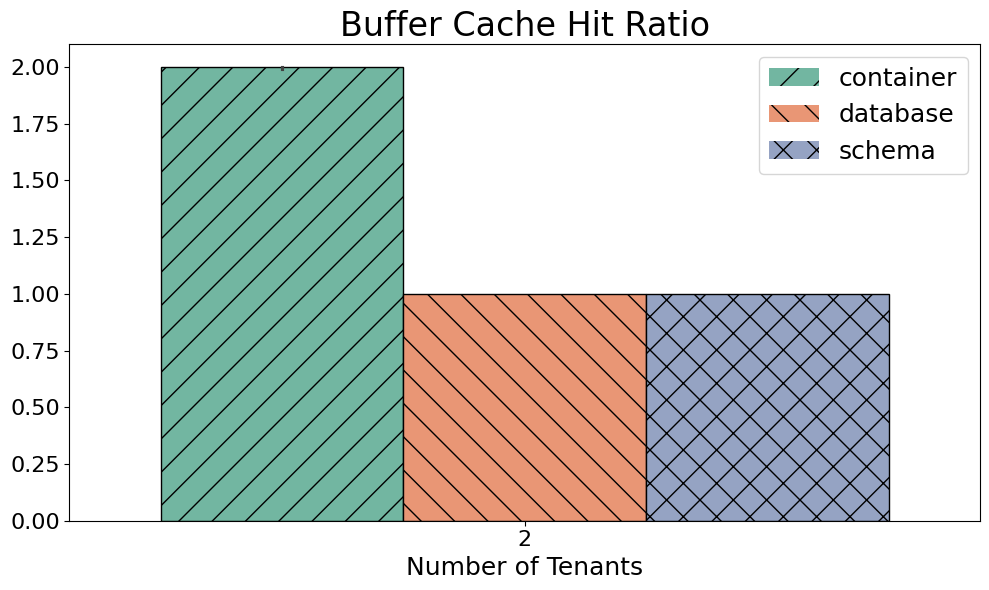

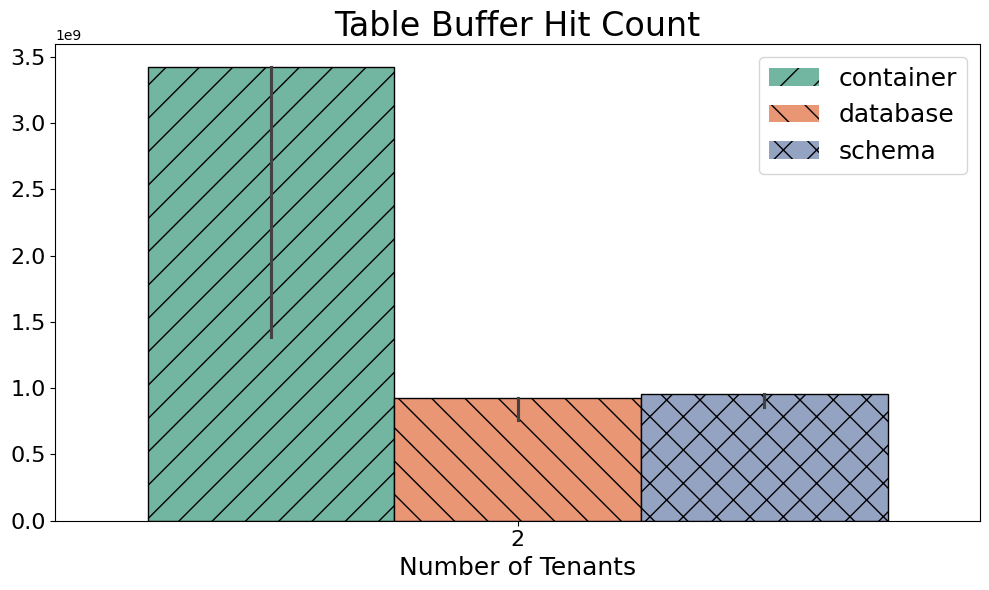

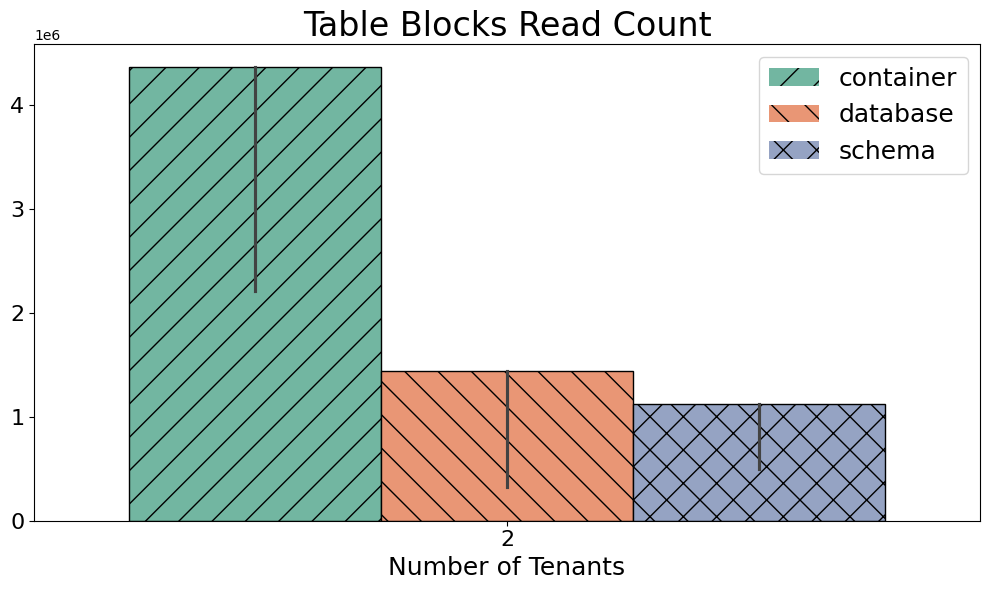

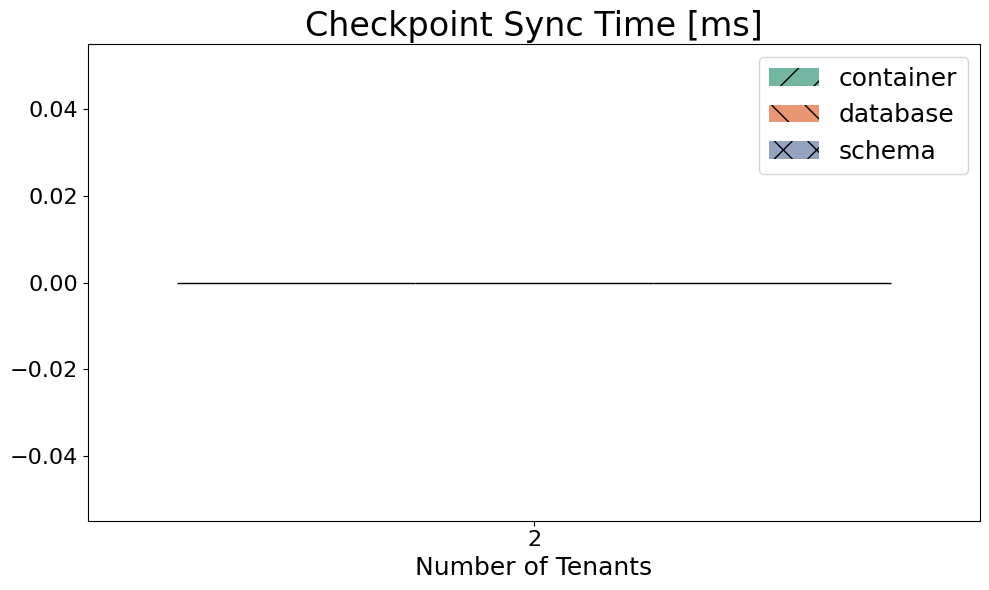

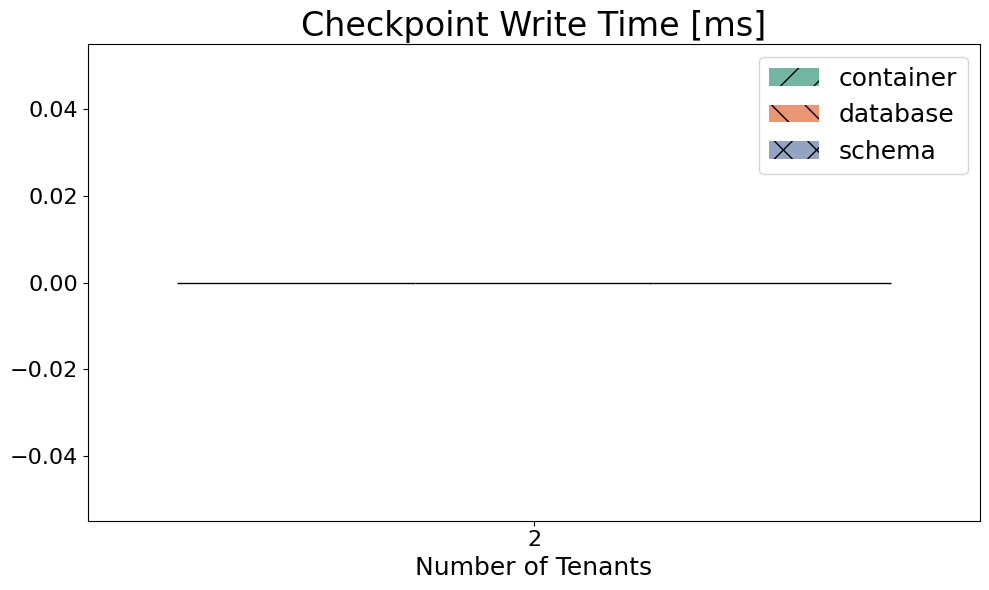

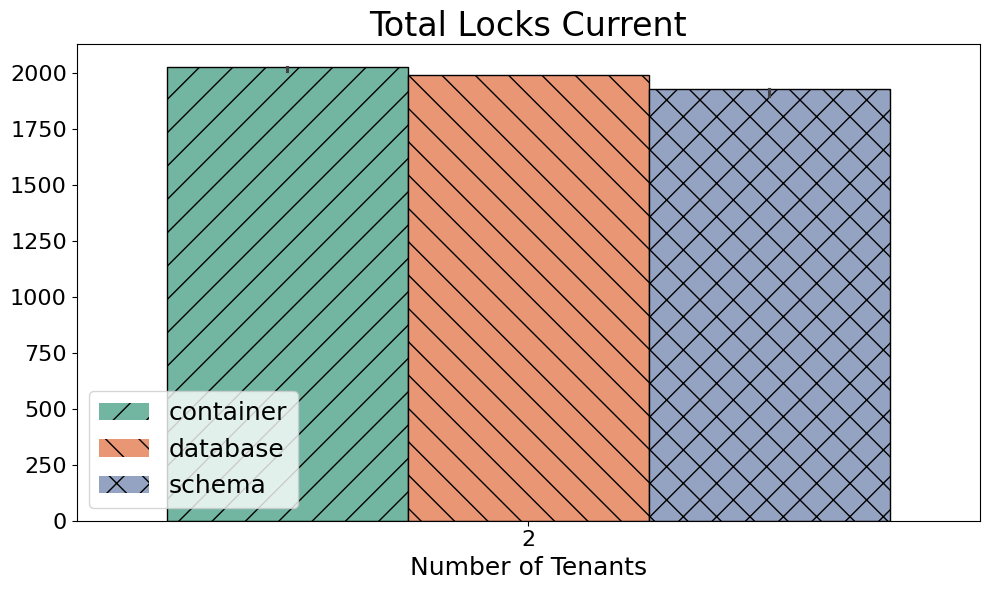

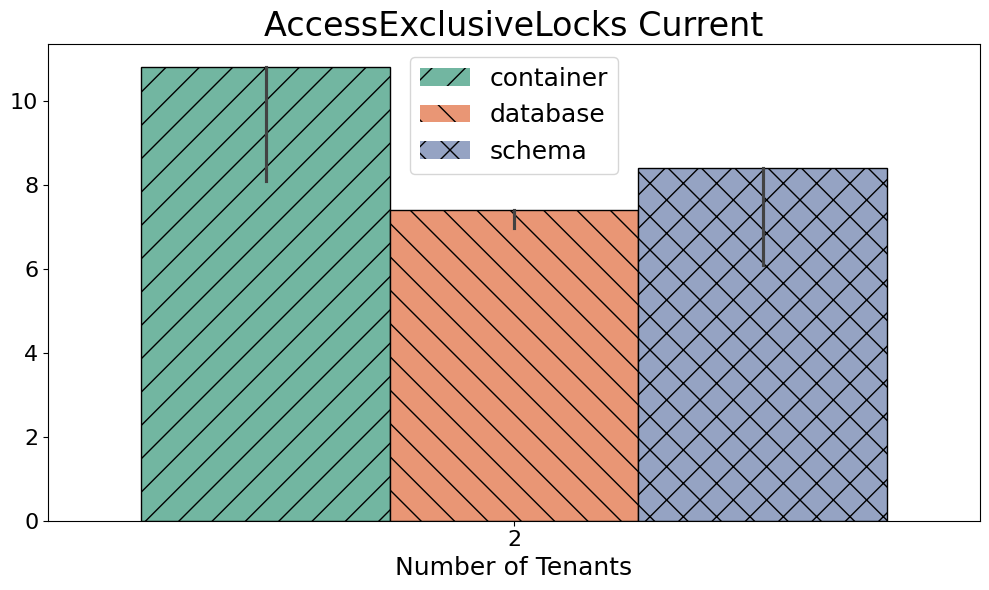

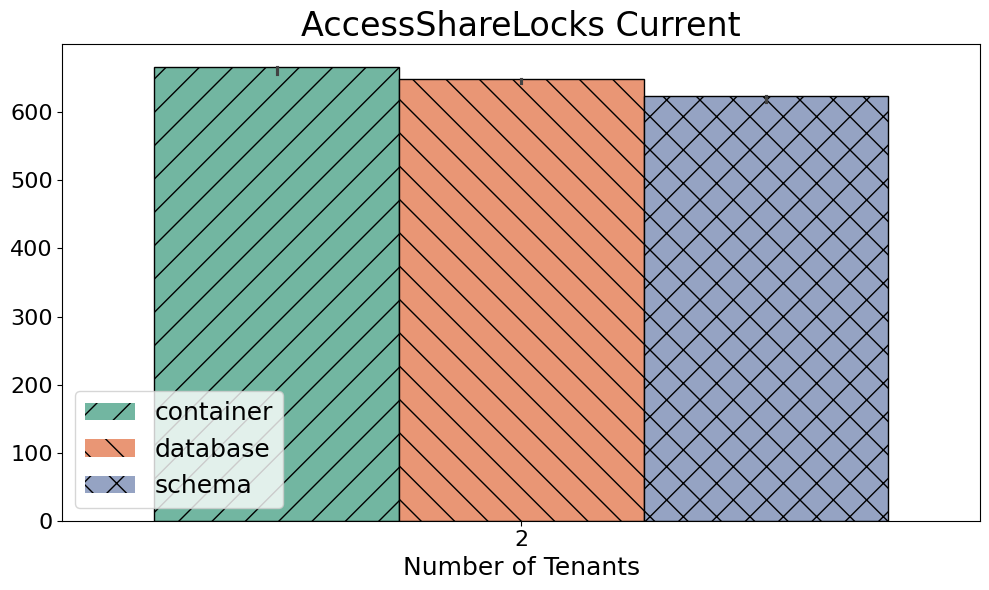

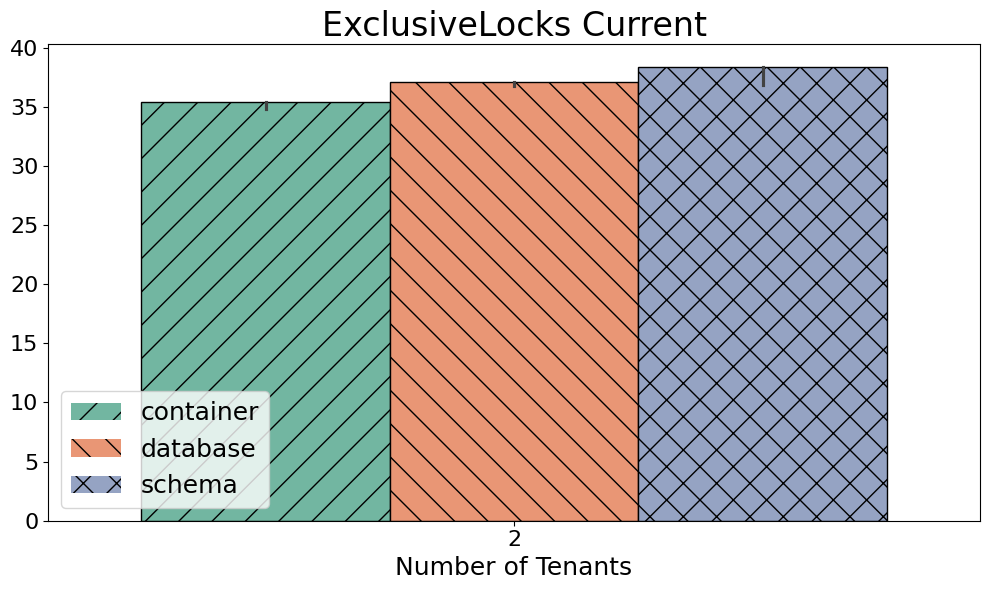

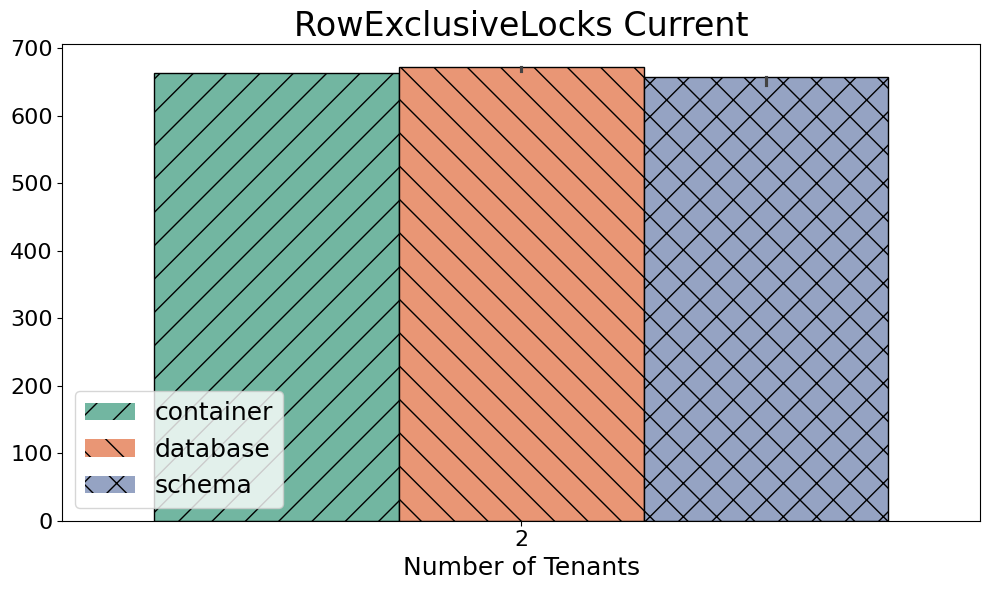

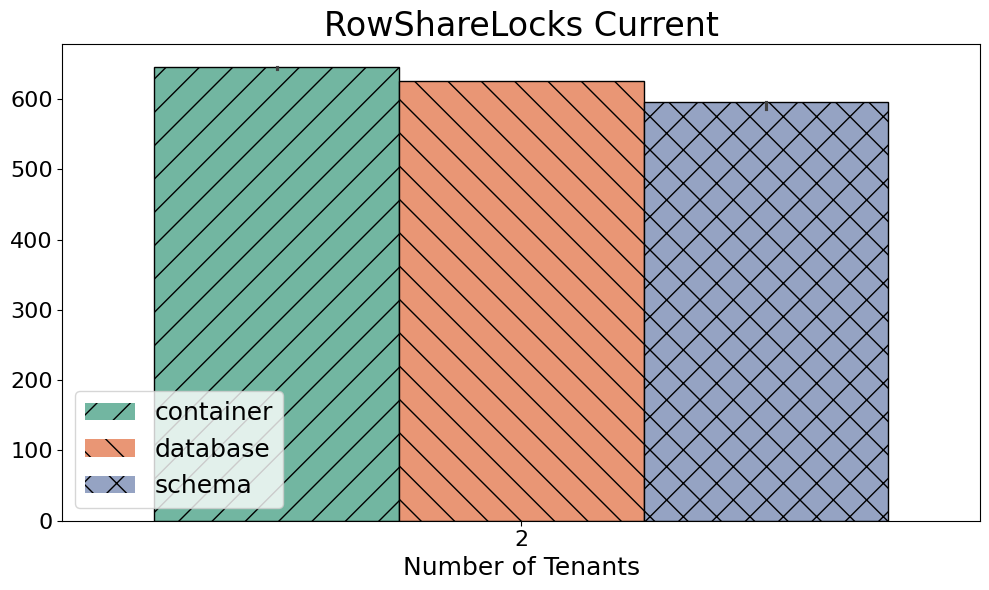

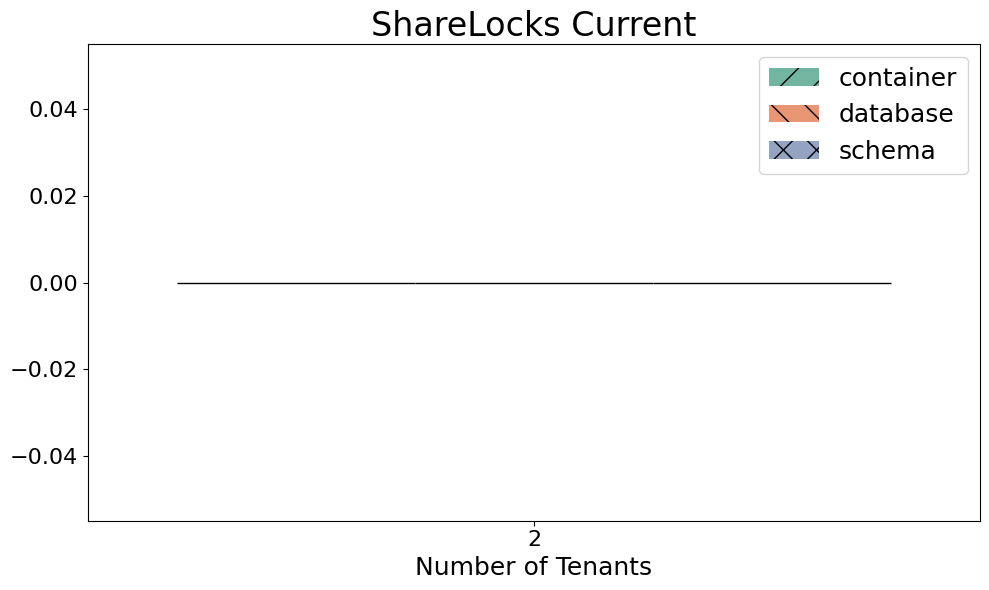

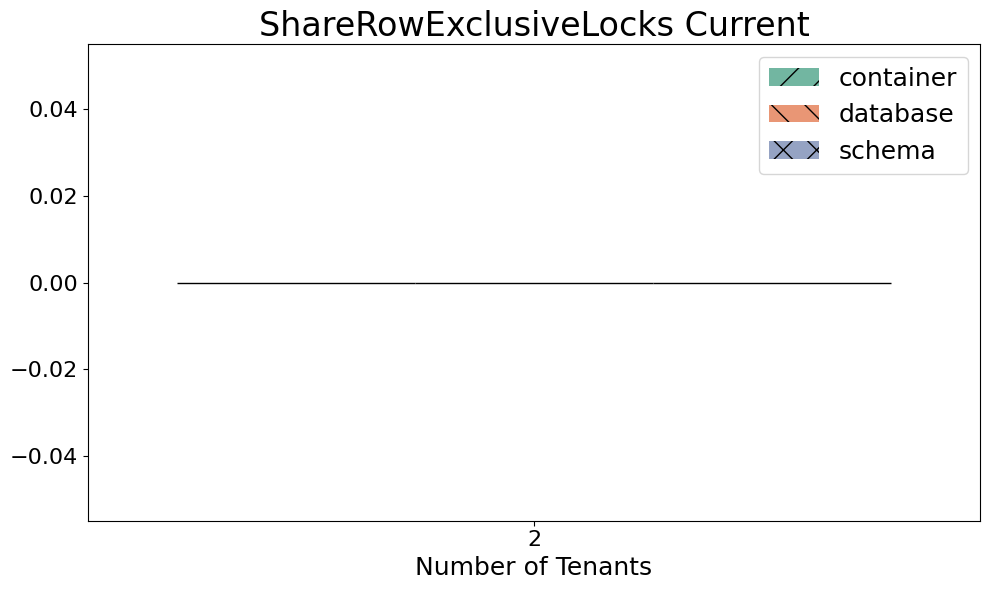

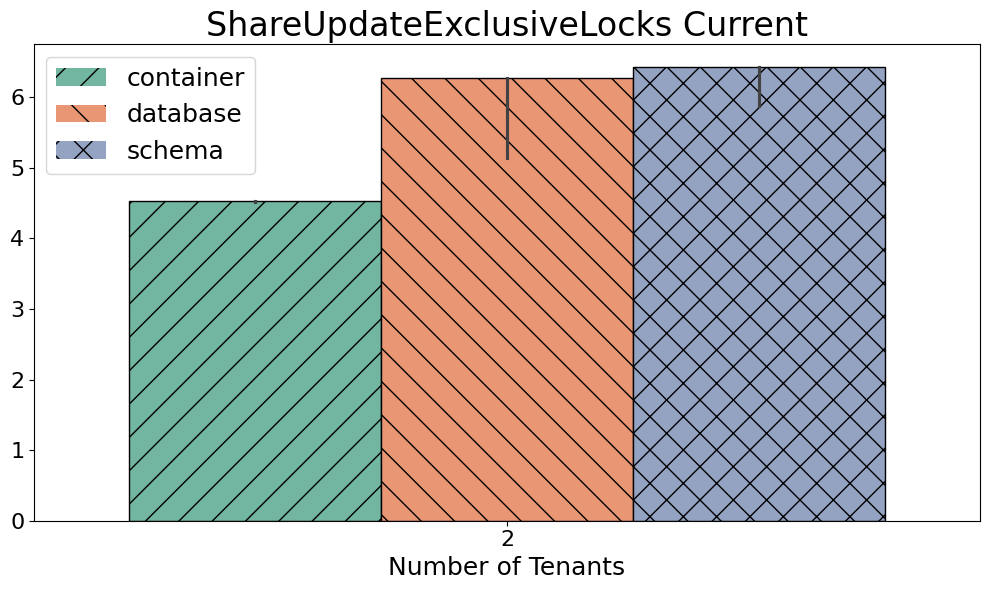

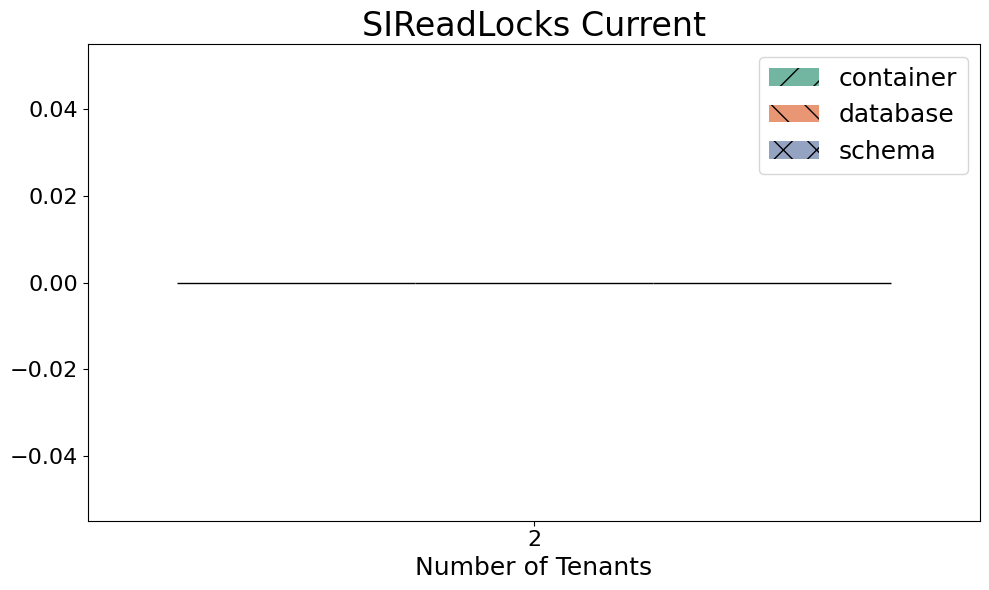

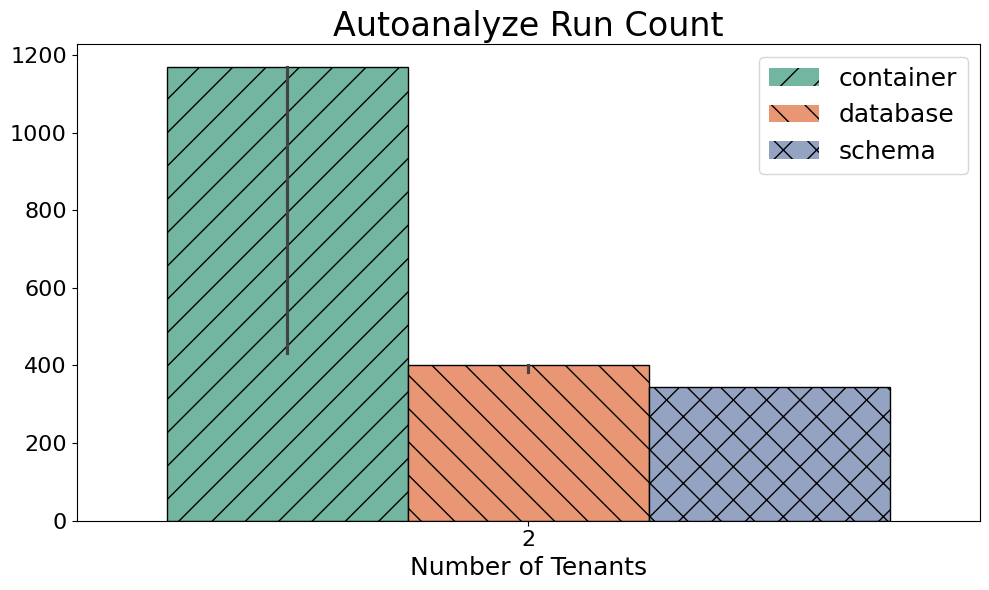

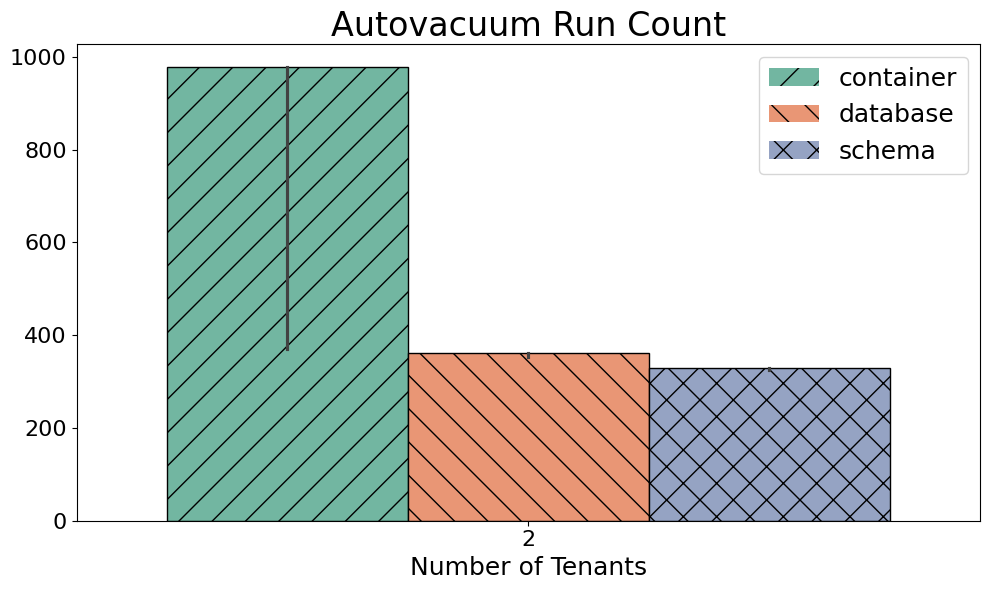

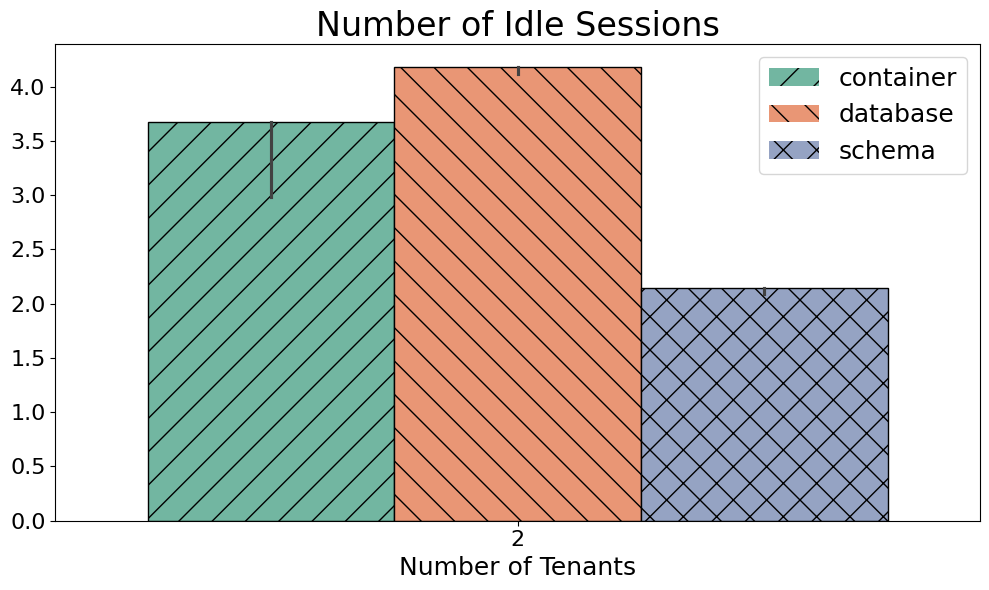

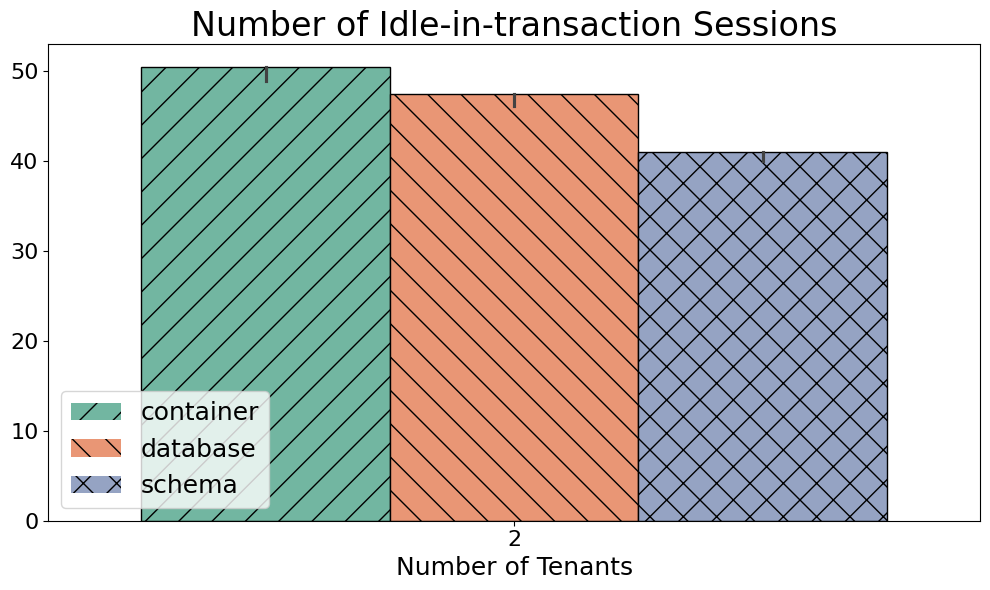

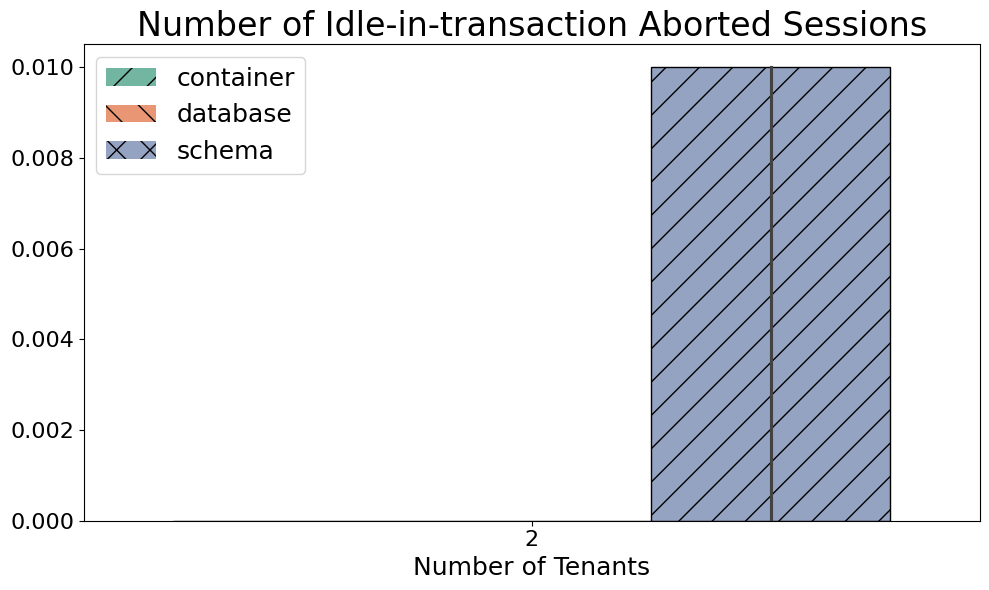

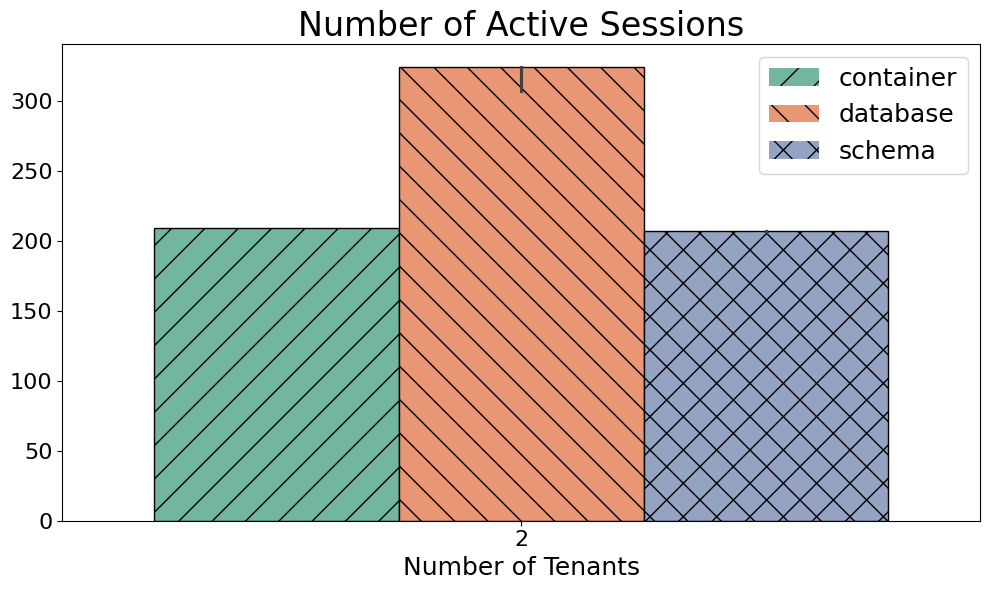

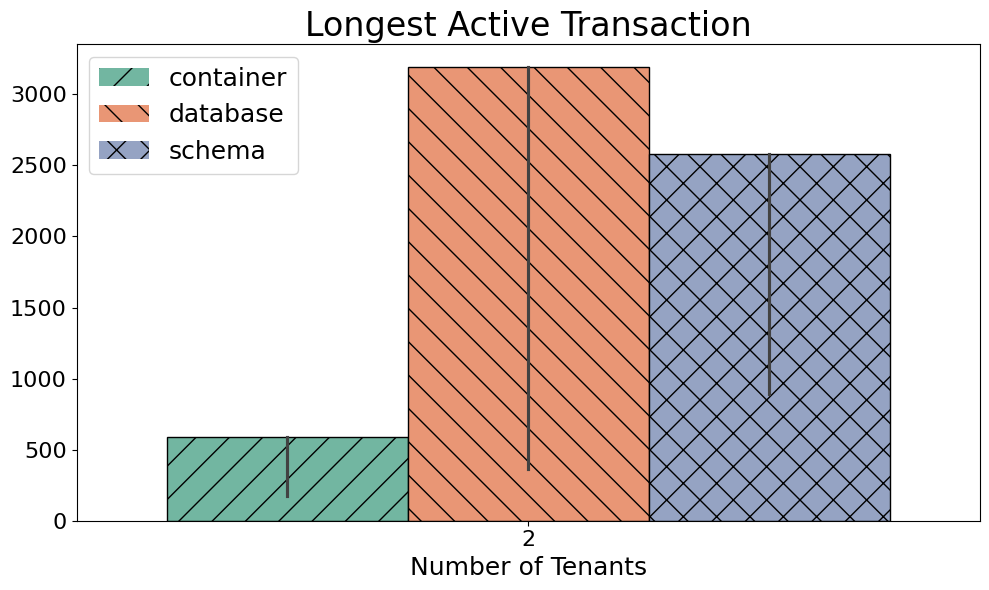

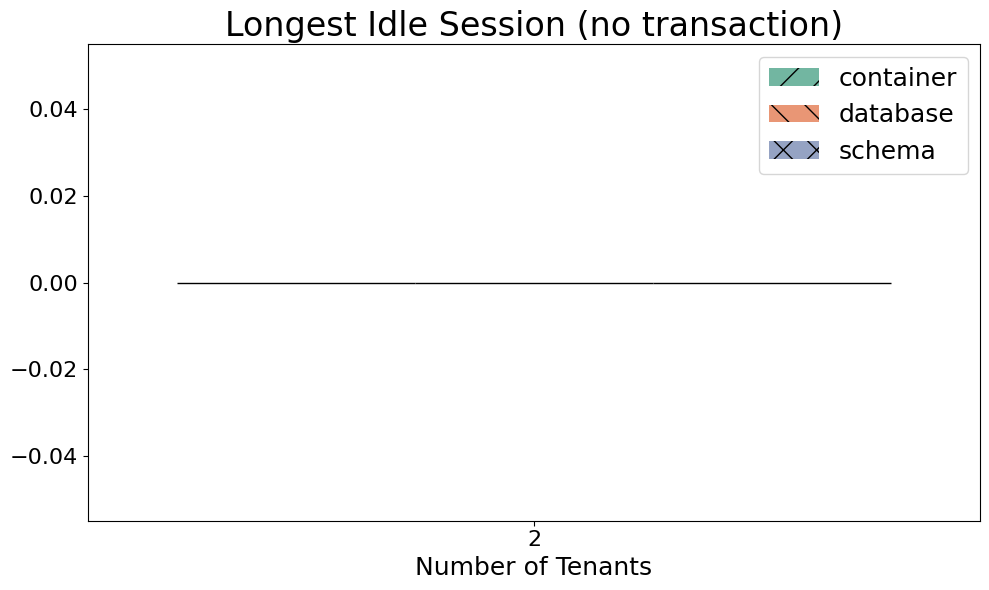

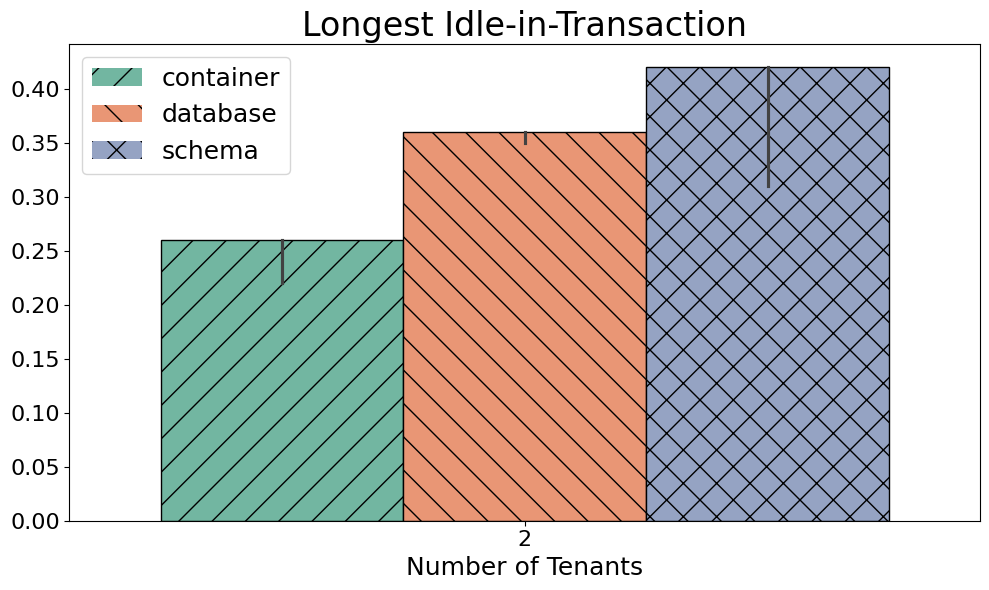

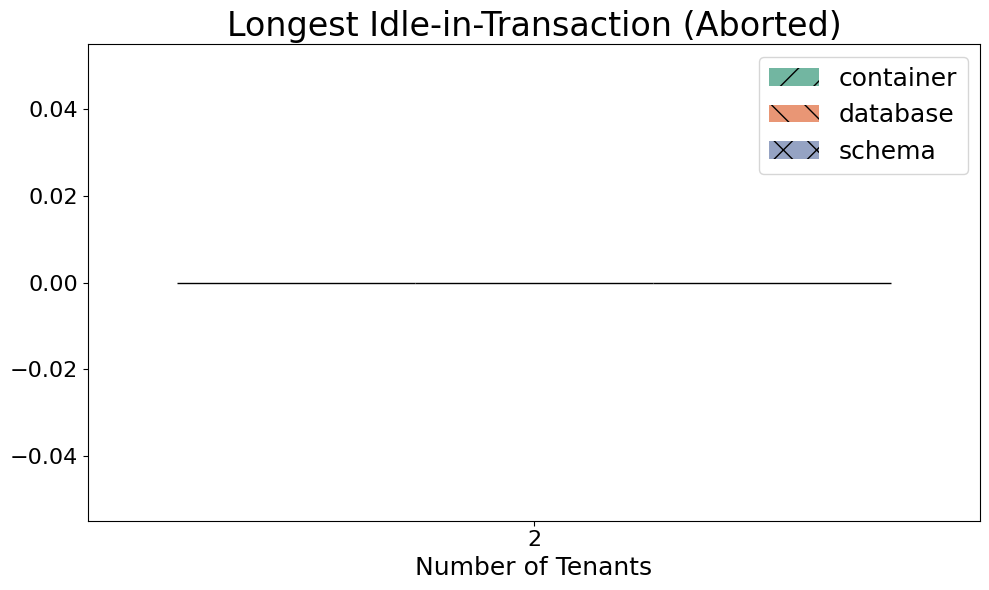

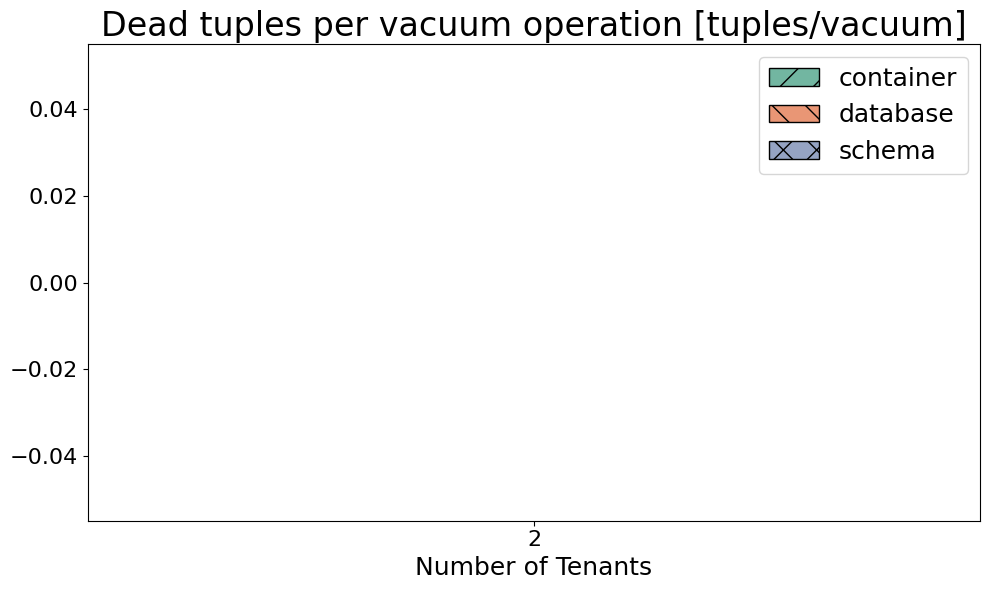

In [95]:
results = []
code = codes[0]
for idx, row in df_metrics.iterrows():
    if row["active"] == False:
        continue
    #print(idx, row["title"])
    metric_name = idx
    method = 'diff' if row["metric"] == 'counter' else 'mean'
    col_name = row["title"]
    plot_bars(df_performance, y=col_name, title=col_name, estimator='max')
    #df_monitoring = collect.get_monitoring_timeseries_single(code, metric=metric_name)
    #print(df_monitoring)
    #plot_boxplots(df_monitoring, y=metric_name, title=col_name)
    #ax = df_monitoring.boxplot()
    #ax.set_title(col_name)
    #plt.show()

# Monitoring as Time Series

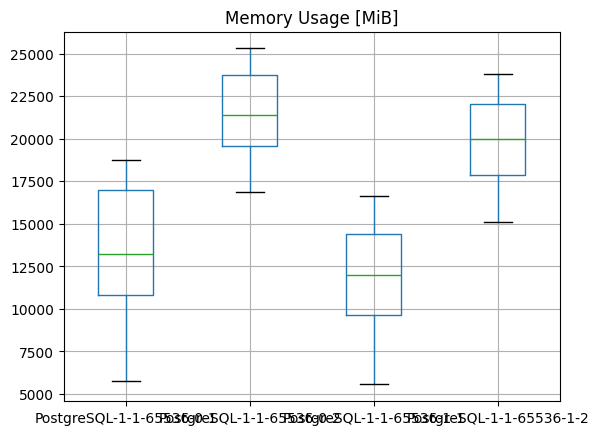

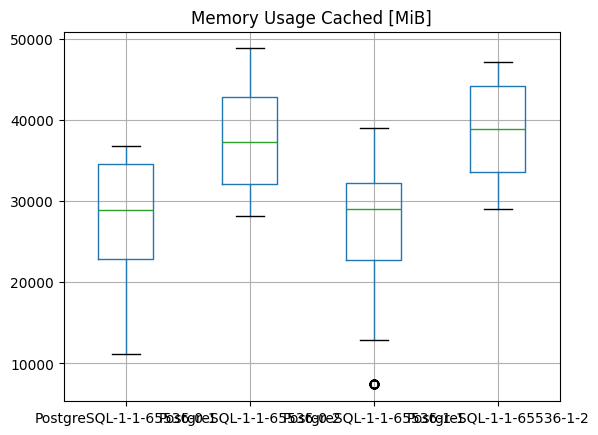

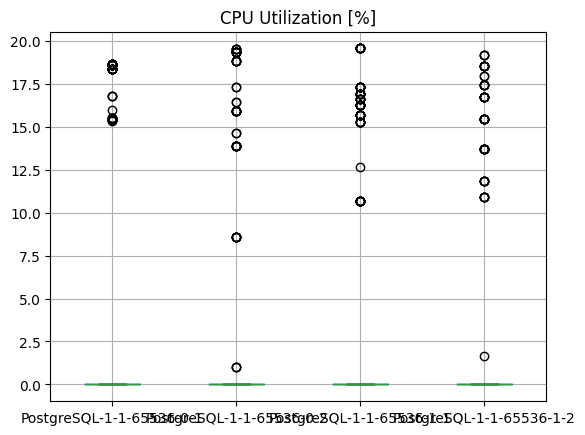

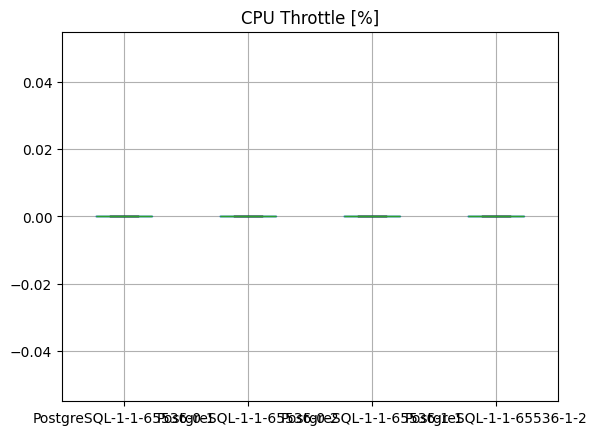

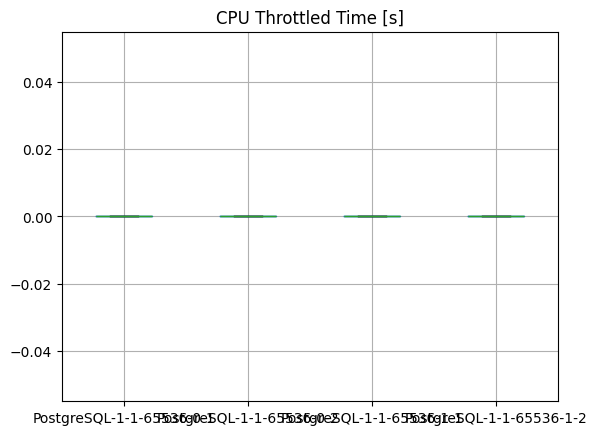

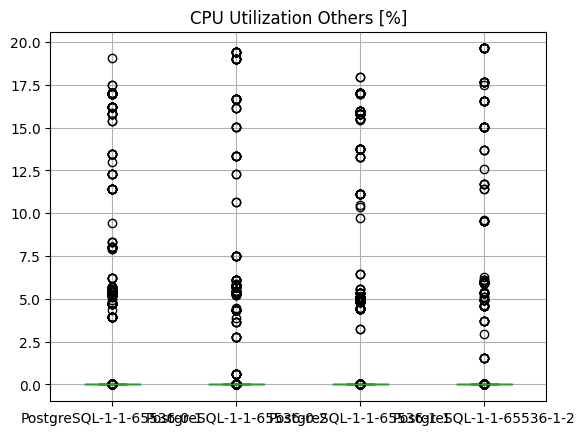

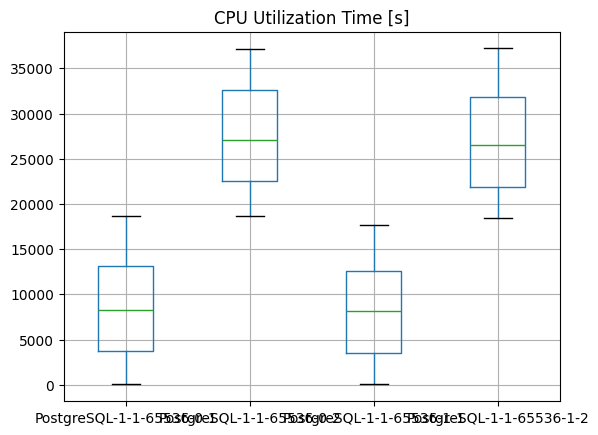

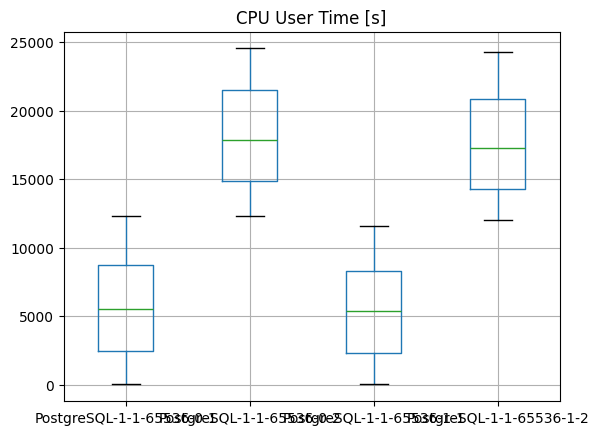

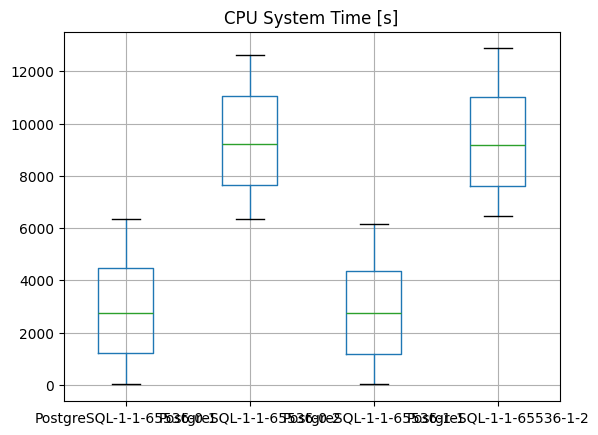

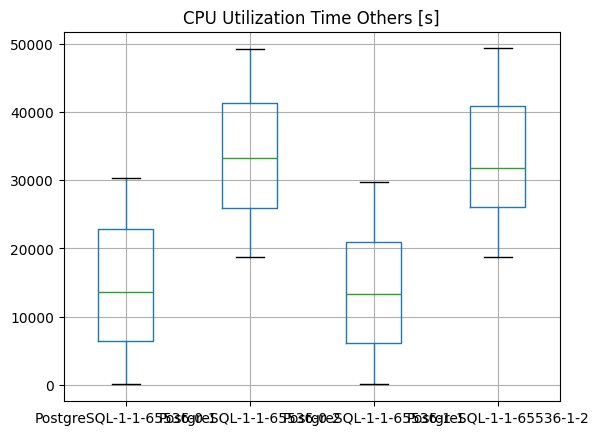

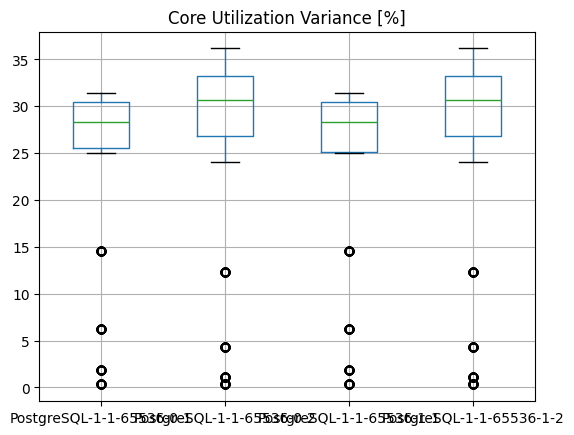

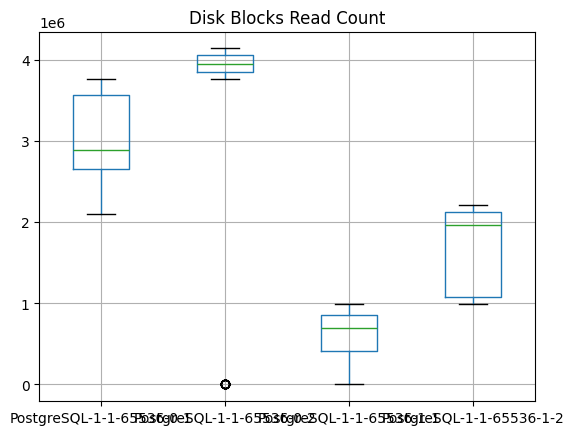

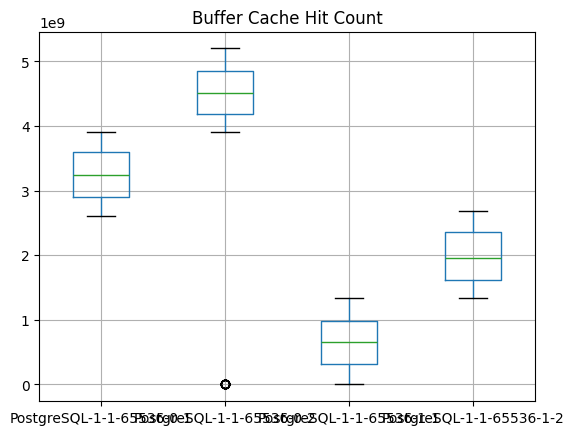

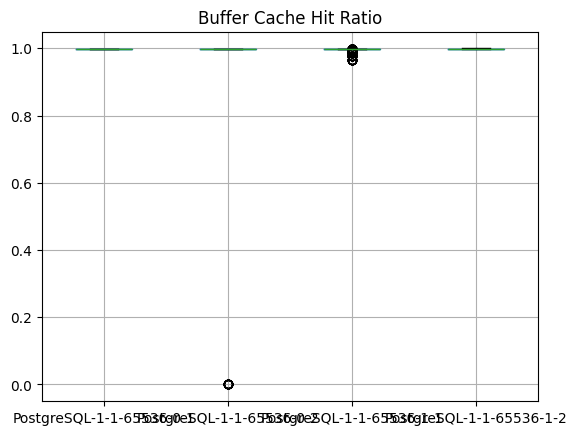

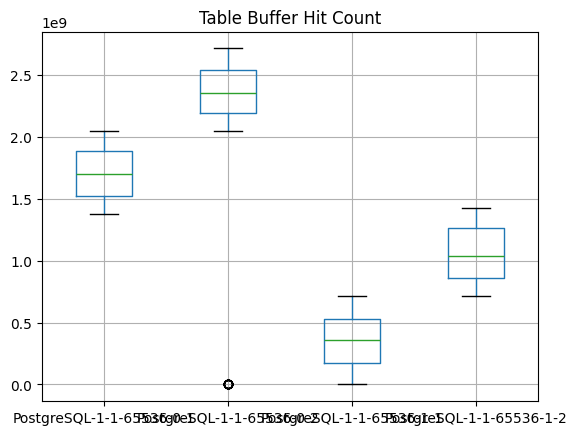

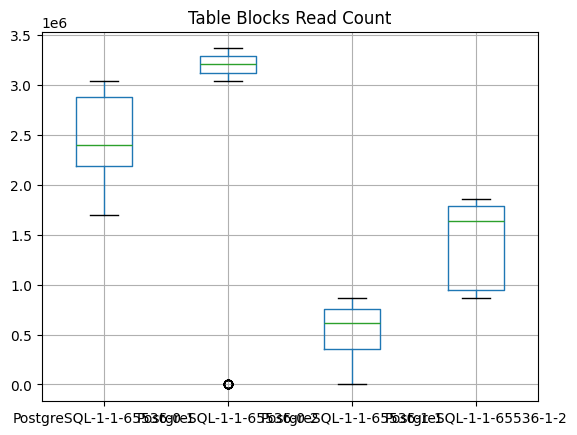

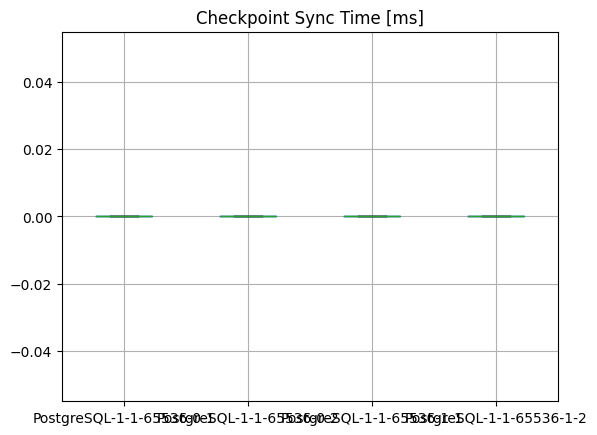

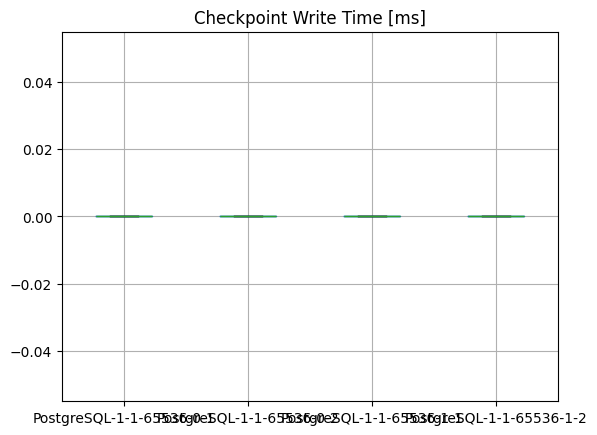

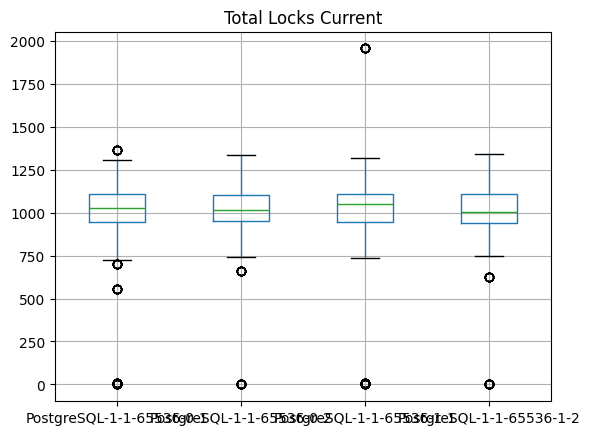

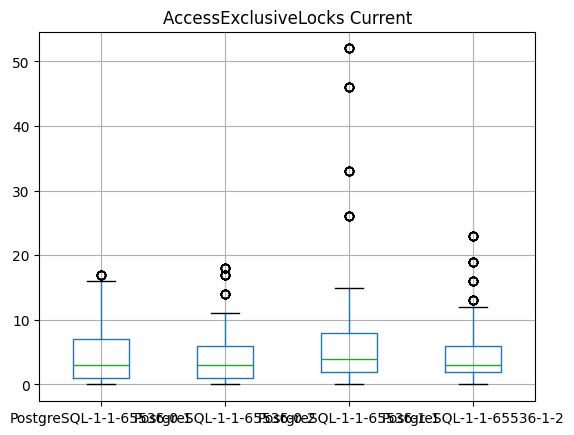

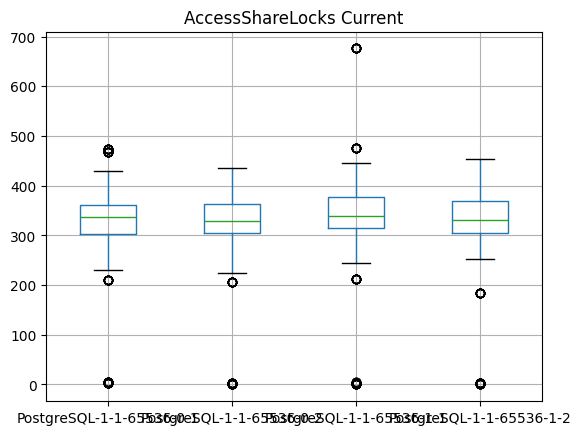

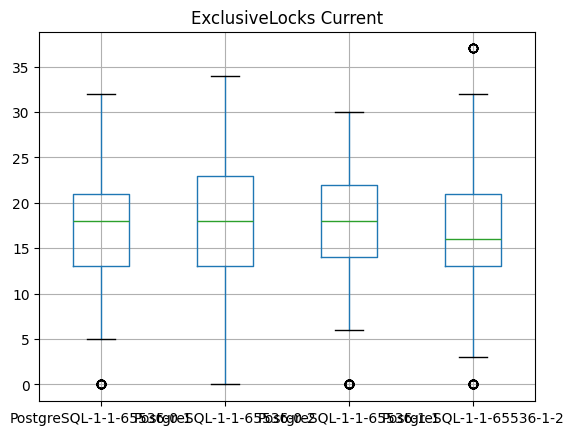

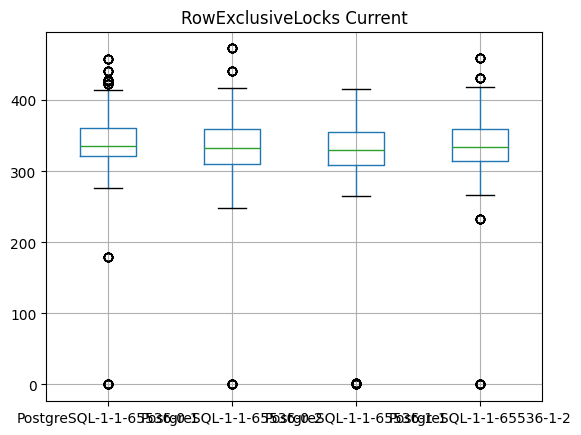

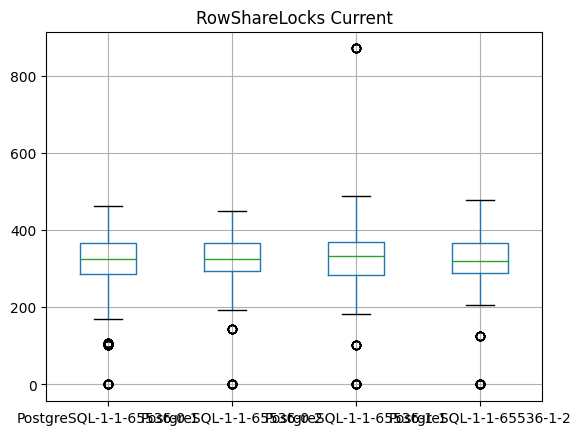

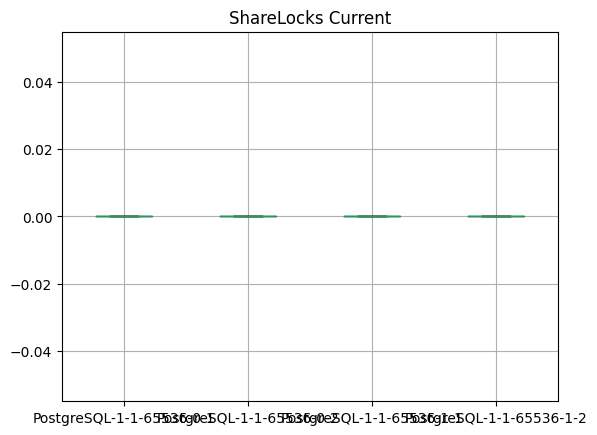

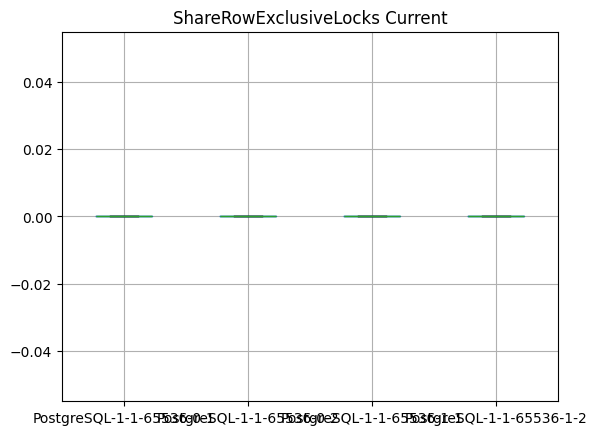

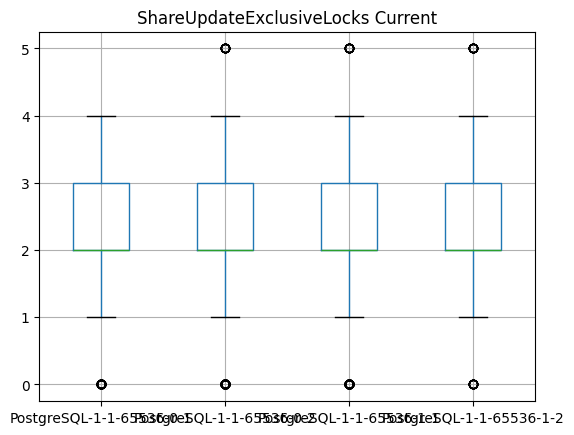

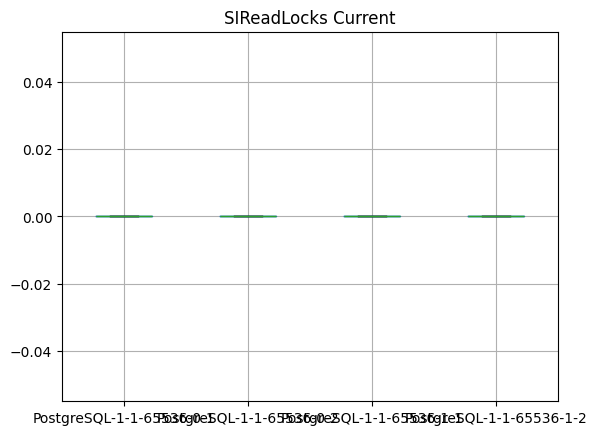

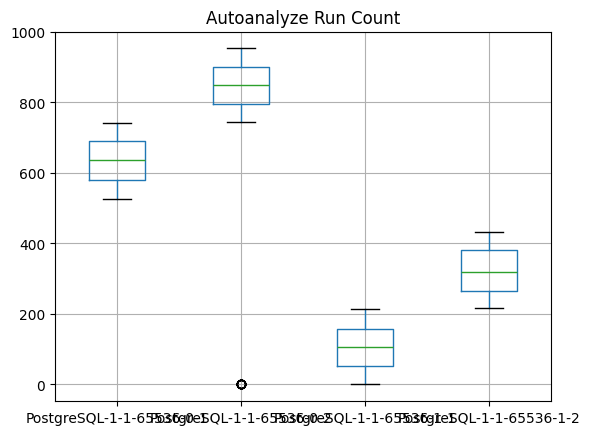

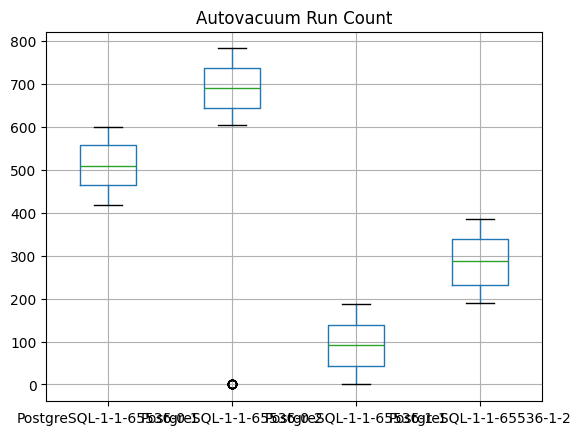

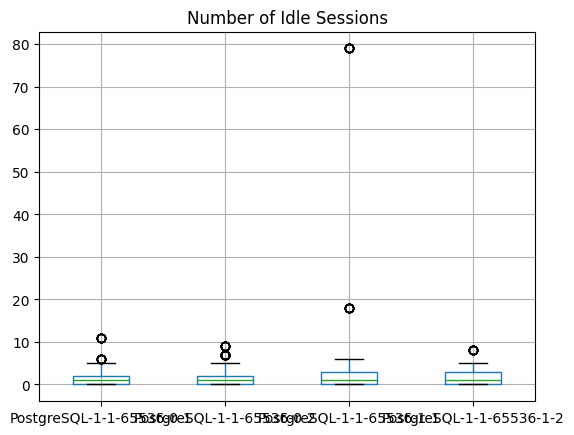

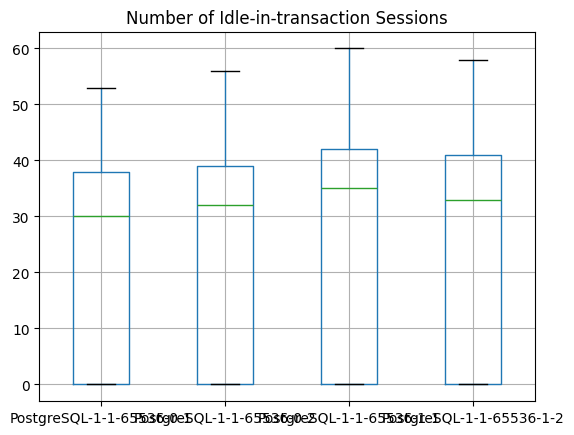

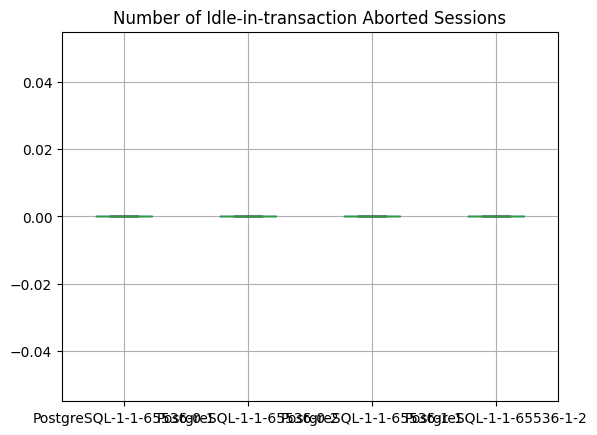

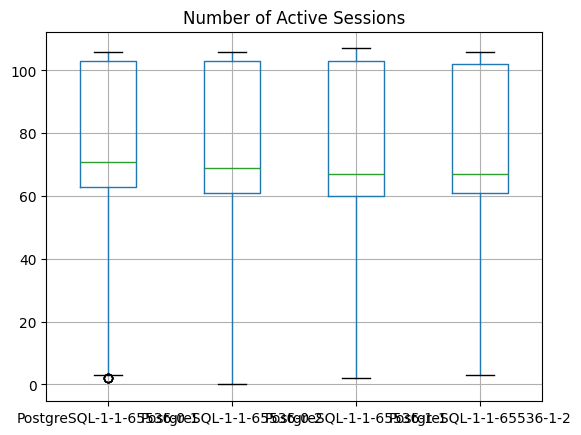

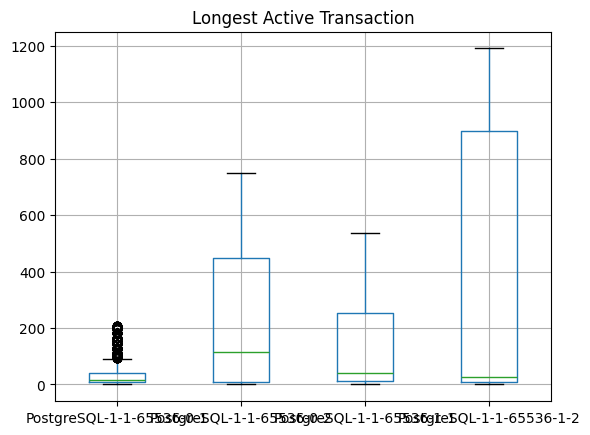

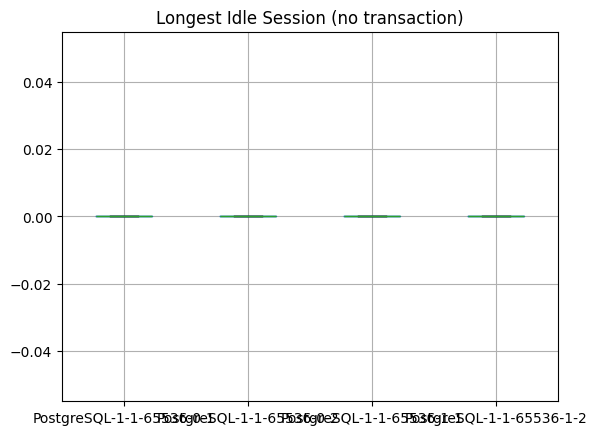

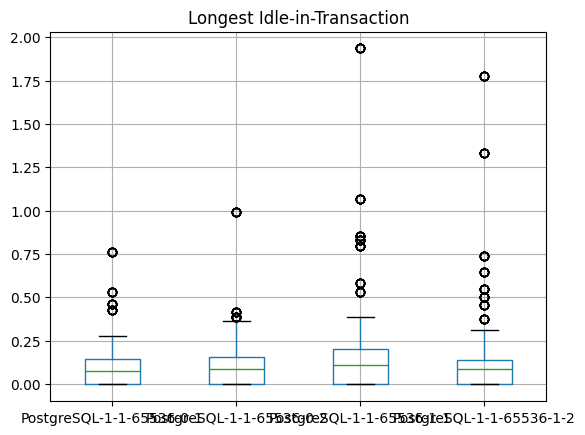

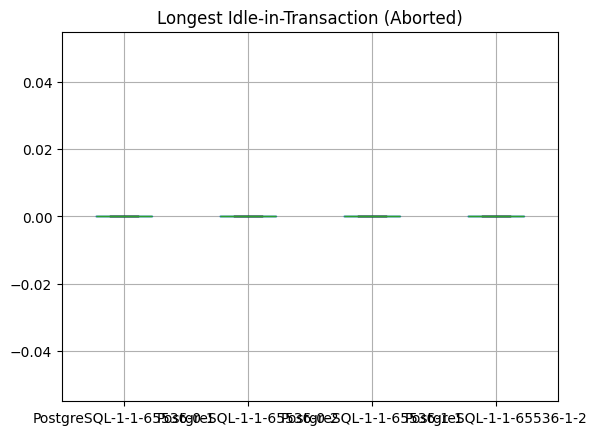

C:\Users\Patrick\.conda\envs\dbmsbenchmarker\Lib\site-packages\numpy\lib\_function_base_impl.py:4720: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\Patrick\.conda\envs\dbmsbenchmarker\Lib\site-packages\matplotlib\cbook.py:1320: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\Patrick\.conda\envs\dbmsbenchmarker\Lib\site-packages\matplotlib\cbook.py:1327: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\Patrick\.conda\envs\dbmsbenchmarker\Lib\site-packages\matplotlib\cbook.py:1335: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\Patrick\.conda\envs\dbmsbenchmarker\Lib\site-packages\matplotlib\cbook.py:1336: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


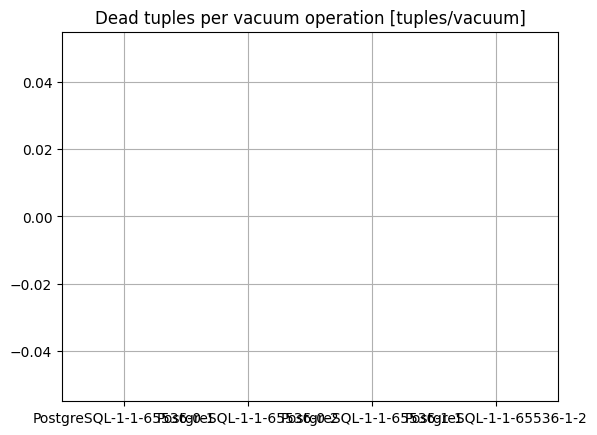

In [84]:
results = []
code = codes[2]
for idx, row in df_metrics.iterrows():
    if row["active"] == False:
        continue
    #print(idx, row["title"])
    metric_name = idx
    method = 'diff' if row["metric"] == 'counter' else 'mean'
    col_name = row["title"]
    df_monitoring = collect.get_monitoring_timeseries_single(code, metric=metric_name)
    #print(df_monitoring)
    #plot_boxplots(df_monitoring, y=metric_name, title=col_name)
    ax = df_monitoring.boxplot()
    ax.set_title(col_name)
    plt.show()

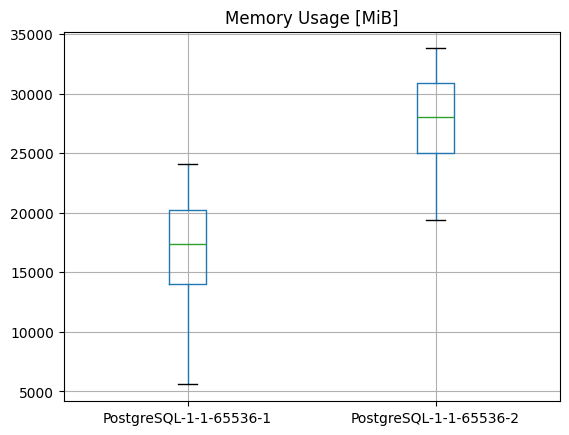

In [10]:
metric = 'pg_stat_activity_max_tx_duration_active'
#metric = 'pg_stat_database_blks_reads'
#metric = 'pg_stat_activity_count_idle_transaction'
metric = 'total_cpu_memory'
code = codes[0]
df_monitoring = collect.get_monitoring_timeseries_single(code, metric=metric)

#df_monitoring.plot(title=metric)
#df_monitoring.boxplot()
ax = df_monitoring.boxplot()
ax.set_title(df_metrics.loc[metric]['title'])#metric)
plt.show()

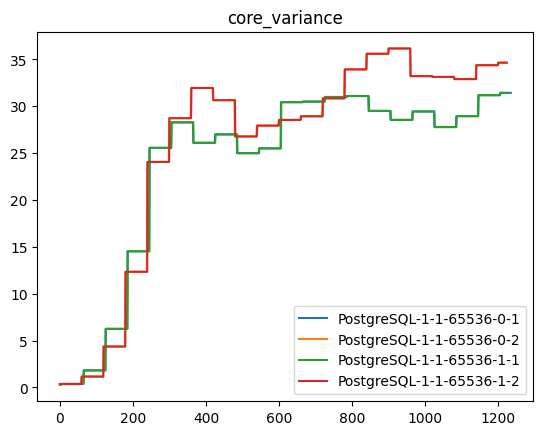

In [91]:
metric = 'pg_stat_database_blks_hit'
metric = 'pg_stat_activity_count_idle_transaction'
metric = 'total_cpu_memory'
metric = 'total_cpu_util'
metric = 'total_cpu_util_s'
metric = 'core_variance'

code = codes[2]
df_monitoring = collect.get_monitoring_timeseries_single(code, metric=metric)

#df_monitoring.plot(title=metric)
ax = df_monitoring.plot()
ax.set_title(metric)
plt.show()

In [12]:
df_performance = collect.get_monitoring_single_all("stream")
df_performance

CPU [CPUs]  CPU Throttled  Max CPU  Max RAM [Gb]  \
PostgreSQL-1-1-65536-0-1    18653.12            0.0    18.62         18.30   
PostgreSQL-1-1-65536-0-2    18455.24            0.0    19.52         24.71   
PostgreSQL-1-1-65536-1-1    17689.05            0.0    19.54         16.26   
PostgreSQL-1-1-65536-1-2    18713.50            0.0    19.14         23.23   
PostgreSQL-1-1-65536-1      22757.25            0.0    23.24         22.48   
PostgreSQL-1-1-65536-2      22993.46            0.0    24.27         31.16   
PostgreSQL-1-1-65536-1      22175.03            0.0    24.94         23.50   
PostgreSQL-1-1-65536-2      24096.40            0.0    23.75         33.01   

                          Max RAM Cached [Gb]    Locks  Access Exclusive  \
PostgreSQL-1-1-65536-0-1                35.95  1008.36              4.45   
PostgreSQL-1-1-65536-0-2                47.64  1001.06              3.85   
PostgreSQL-1-1-65536-1-1                38.04  1018.26              6.35   
PostgreSQL-1-1-65536-1-2                46.00  1008.81              4.23   
PostgreSQL-1-1-65536-1                  56.56  1989.86              7.39   
PostgreSQL-1-1-65536-2                  66.95  1991.15              6.97   
PostgreSQL-1-1-65536-1                  66.04  1929.35              8.39   
PostgreSQL-1-1-65536-2                  80.97  1894.99              6.08   

                          Access Share  Exclusive  Row Exclusive  ...  \
PostgreSQL-1-1-65536-0-1        328.23      17.46         335.40  ...   
PostgreSQL-1-1-65536-0-2        326.00      17.86         331.07  ...   
PostgreSQL-1-1-65536-1-1        338.27      17.92         328.44  ...   
PostgreSQL-1-1-65536-1-2        330.92      16.95         331.37  ...   
PostgreSQL-1-1-65536-1          648.62      36.77         666.36  ...   
PostgreSQL-1-1-65536-2          642.65      37.10         672.04  ...   
PostgreSQL-1-1-65536-1          624.10      38.36         656.90  ...   
PostgreSQL-1-1-65536-2          614.89      36.80         644.69  ...   

                          Sync Time  Write Time  Cache Hit Ratio [%]  \
PostgreSQL-1-1-65536-0-1        0.0         0.0                99.91   
PostgreSQL-1-1-65536-0-2        0.0         0.0                98.77   
PostgreSQL-1-1-65536-1-1        0.0         0.0                99.81   
PostgreSQL-1-1-65536-1-2        0.0         0.0                99.92   
PostgreSQL-1-1-65536-1          0.0         0.0                99.90   
PostgreSQL-1-1-65536-2          0.0         0.0                99.91   
PostgreSQL-1-1-65536-1          0.0         0.0                99.86   
PostgreSQL-1-1-65536-2          0.0         0.0                99.88   

                          Number Autoanalyze  Number Autovacuum  \
PostgreSQL-1-1-65536-0-1               216.0              183.0   
PostgreSQL-1-1-65536-0-2               953.0              783.0   
PostgreSQL-1-1-65536-1-1               215.0              188.0   
PostgreSQL-1-1-65536-1-2               216.0              195.0   
PostgreSQL-1-1-65536-1                 402.0              362.0   
PostgreSQL-1-1-65536-2                 383.0              352.0   
PostgreSQL-1-1-65536-1                 345.0              324.0   
PostgreSQL-1-1-65536-2                 345.0              330.0   

                          Variance of Core Util [%]  client       type  \
PostgreSQL-1-1-65536-0-1                      24.03       1  container   
PostgreSQL-1-1-65536-0-2                      26.00       2  container   
PostgreSQL-1-1-65536-1-1                      23.93       1  container   
PostgreSQL-1-1-65536-1-2                      25.98       2  container   
PostgreSQL-1-1-65536-1                        11.01       1   database   
PostgreSQL-1-1-65536-2                        11.32       2   database   
PostgreSQL-1-1-65536-1                        10.86       1     schema   
PostgreSQL-1-1-65536-2                        11.46       2     schema   

                          num_tenants        code  
PostgreS

# Monitoring Aggregated Values

In [13]:
df_performance = collect.get_monitoring_all("stream")

df_performance_first = df_performance[df_performance['client']=='1']
df_performance_second = df_performance[df_performance['client']=='2']

df_performance#[['Max CPU', 'client', 'type', 'num_tenants']]

client  CPU [CPUs]  Max RAM [Gb]  Max RAM Cached [Gb]  Max CPU  \
0      1    36342.17         34.56                73.99    38.16   
1      2    37168.74         47.94                93.64    38.66   
0      1    22757.25         22.48                56.56    23.24   
1      2    22993.46         31.16                66.95    24.27   
0      1    22175.03         23.50                66.04    24.94   
1      2    24096.40         33.01                80.97    23.75   

   CPU Throttled    Locks  Access Exclusive  Access Share  Exclusive  ...  \
0            0.0  2026.62             10.80        666.50      35.38  ...   
1            0.0  2009.87              8.08        656.92      34.81  ...   
0            0.0  1989.86              7.39        648.62      36.77  ...   
1            0.0  1991.15              6.97        642.65      37.10  ...   
0            0.0  1929.35              8.39        624.10      38.36  ...   
1            0.0  1894.99              6.08        614.89      36.80  ...   

      Heap Hits  Sync Time  Write Time  Number Autoanalyze  Number Autovacuum  \
0  1.389347e+09        0.0         0.0               431.0              371.0   
1  3.423106e+09        0.0         0.0              1169.0              978.0   
0  9.242831e+08        0.0         0.0               402.0              362.0   
1  7.573223e+08        0.0         0.0               383.0              352.0   
0  8.562967e+08        0.0         0.0               345.0              324.0   
1  9.555812e+08        0.0         0.0               345.0              330.0   

   Cache Hit Ratio [%]  Variance of Core Util [%]       type  num_tenants  \
0               99.860                      24.03  container            2   
1               99.345                      26.00  container            2   
0               99.900                      11.01   database            2   
1               99.910                      11.32   database            2   
0               99.860                      10.86     schema            2   
1               99.880                      11.46     schema            2   

         code  
0  1755696350  
1  1755696350  
0  1755693435  
1  1755693435  
0  1755690481  
1  1755690481  

[6 rows x 33 columns]

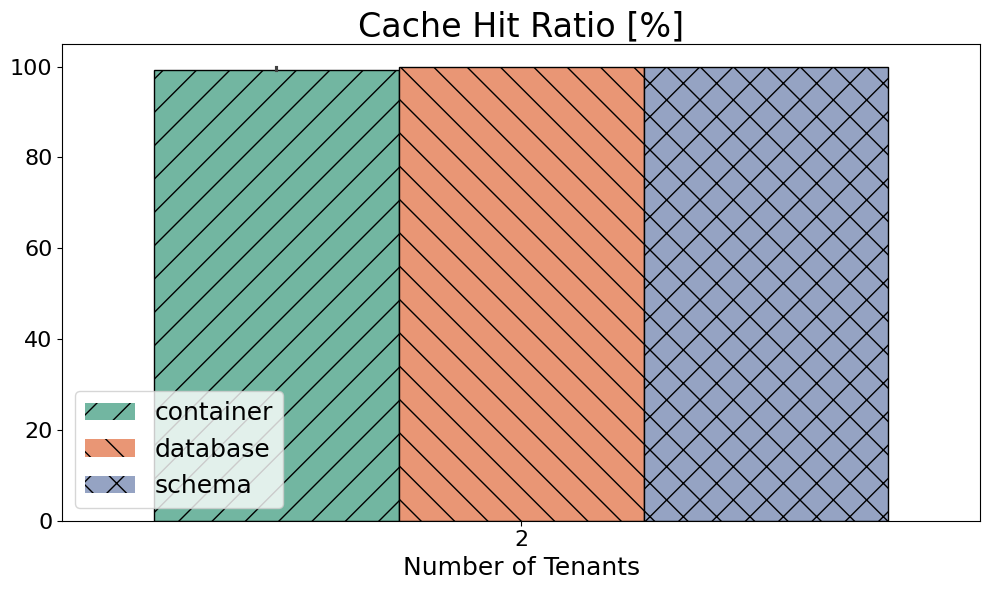

In [14]:
plot_bars(df_performance.fillna(0), y='Cache Hit Ratio [%]', title='Cache Hit Ratio [%]', estimator='min')

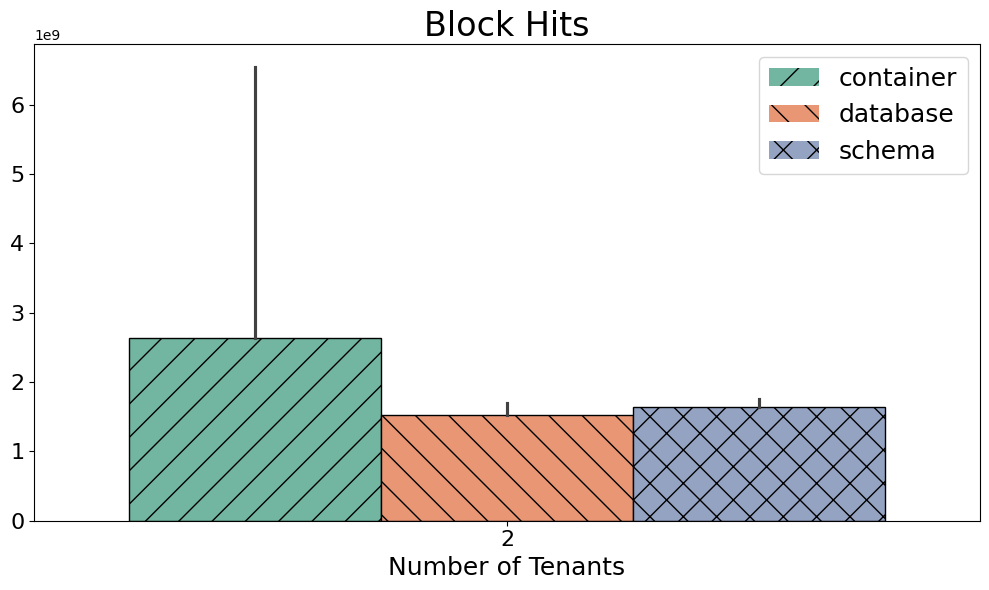

In [15]:
plot_bars(df_performance, y='Block Hits', title='Block Hits', estimator='min')

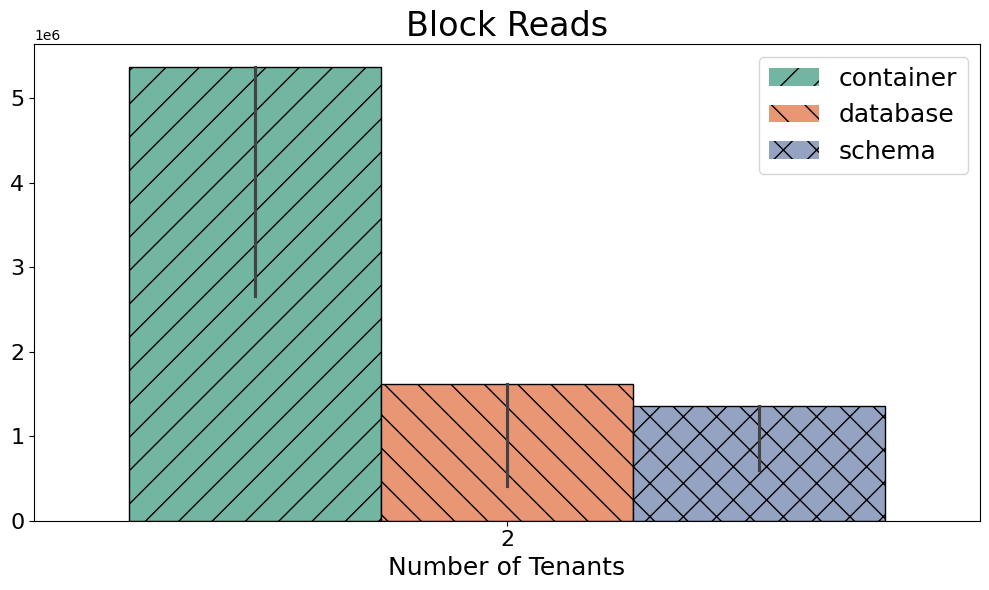

In [16]:
plot_bars(df_performance, y='Block Reads', title='Block Reads', estimator='max')

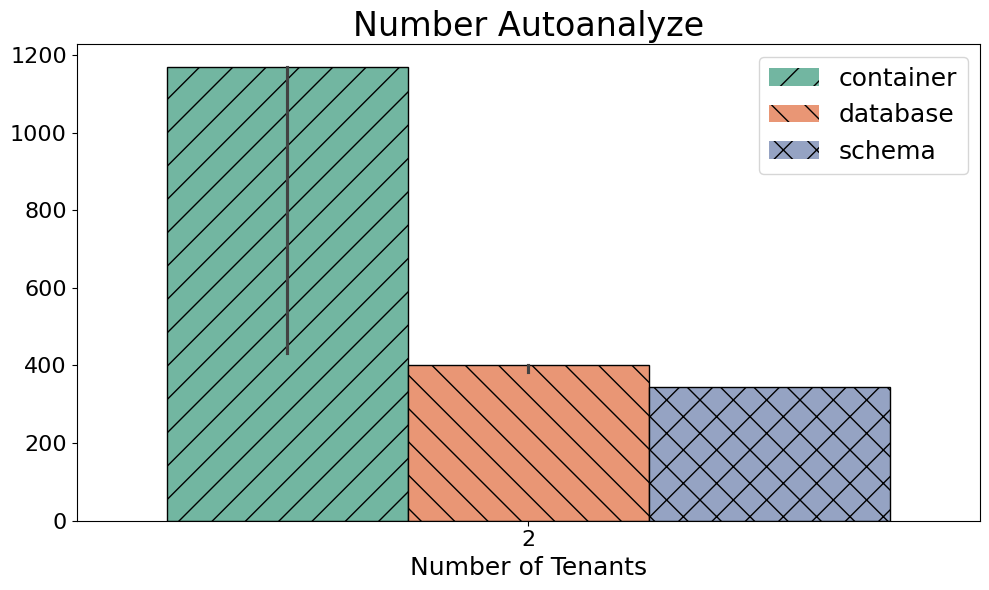

In [17]:
plot_bars(df_performance, y='Number Autoanalyze', title='Number Autoanalyze', estimator='max')

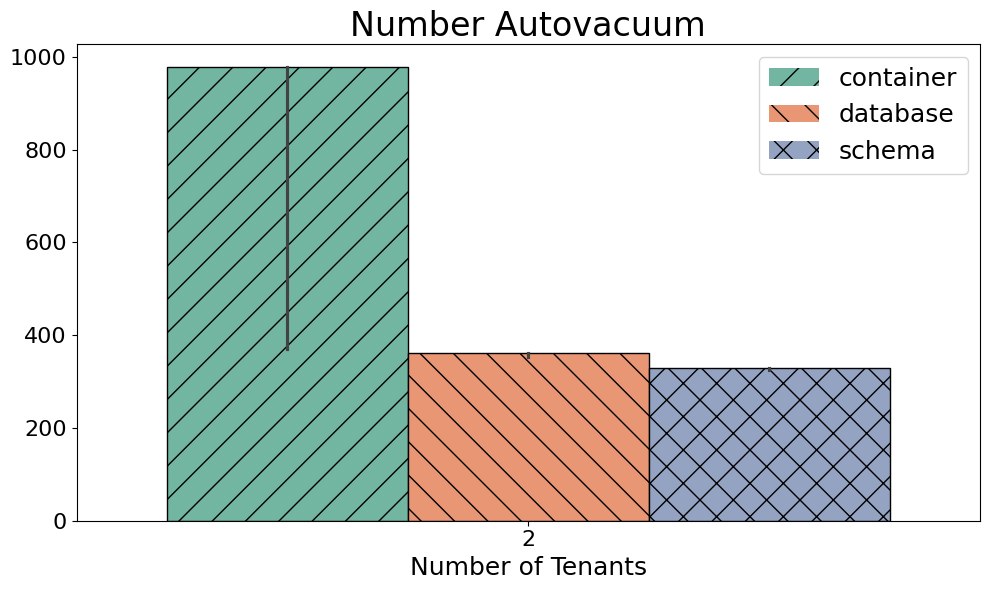

In [18]:
plot_bars(df_performance, y='Number Autovacuum', title='Number Autovacuum', estimator='max')

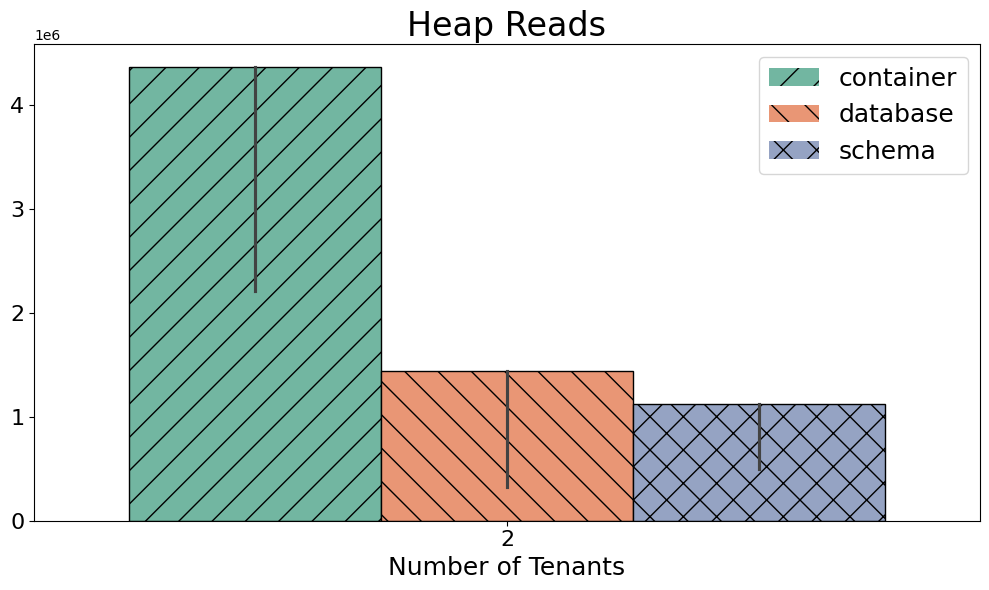

In [19]:
plot_bars(df_performance, y='Heap Reads', title='Heap Reads', estimator='max')

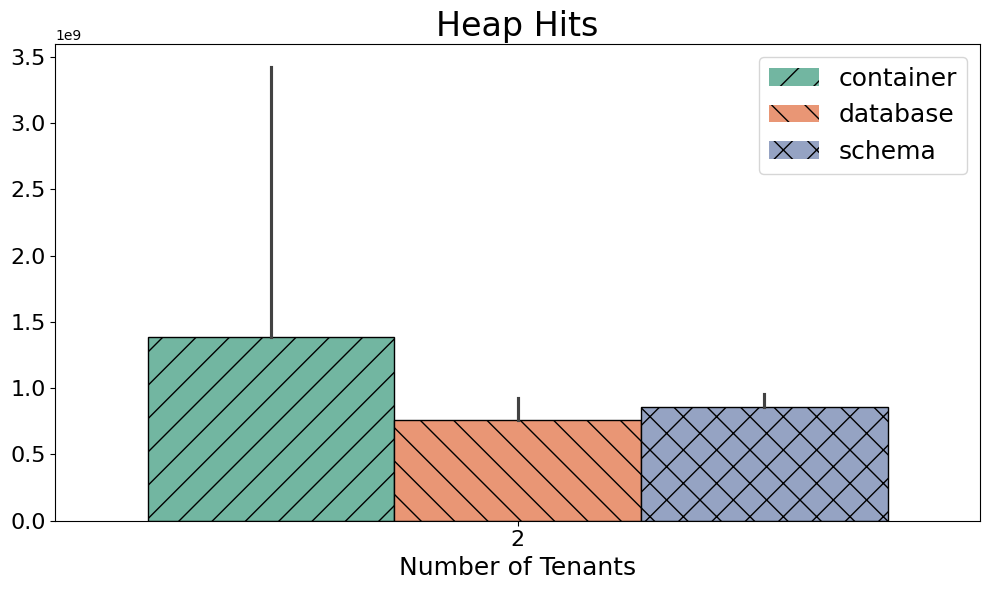

In [20]:
plot_bars(df_performance, y='Heap Hits', title='Heap Hits', estimator='min')

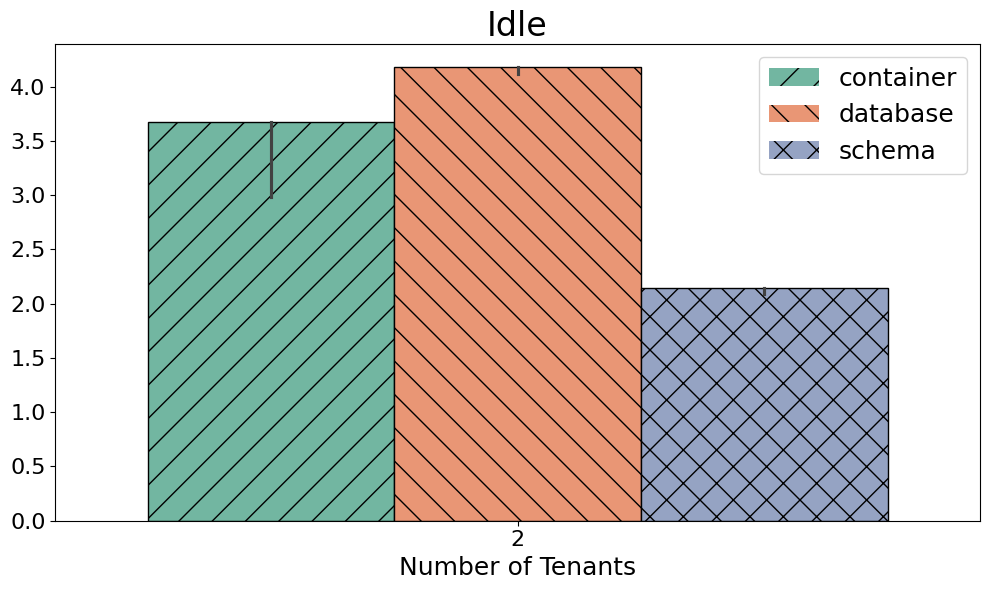

In [21]:
plot_bars(df_performance, y='Idle', title='Idle', estimator='max')

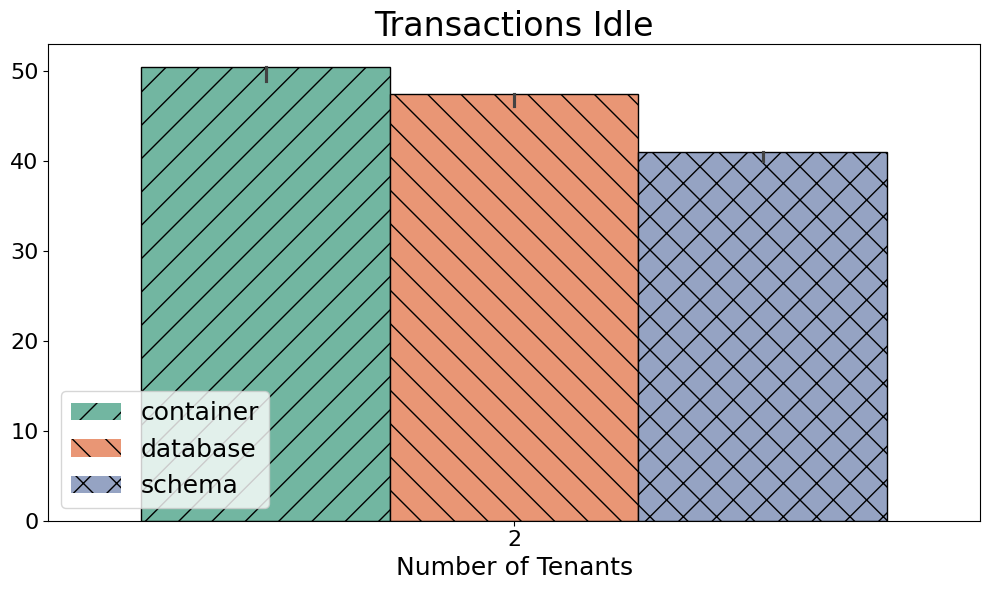

In [22]:
plot_bars(df_performance, y='Transactions Idle', title='Transactions Idle', estimator='max')

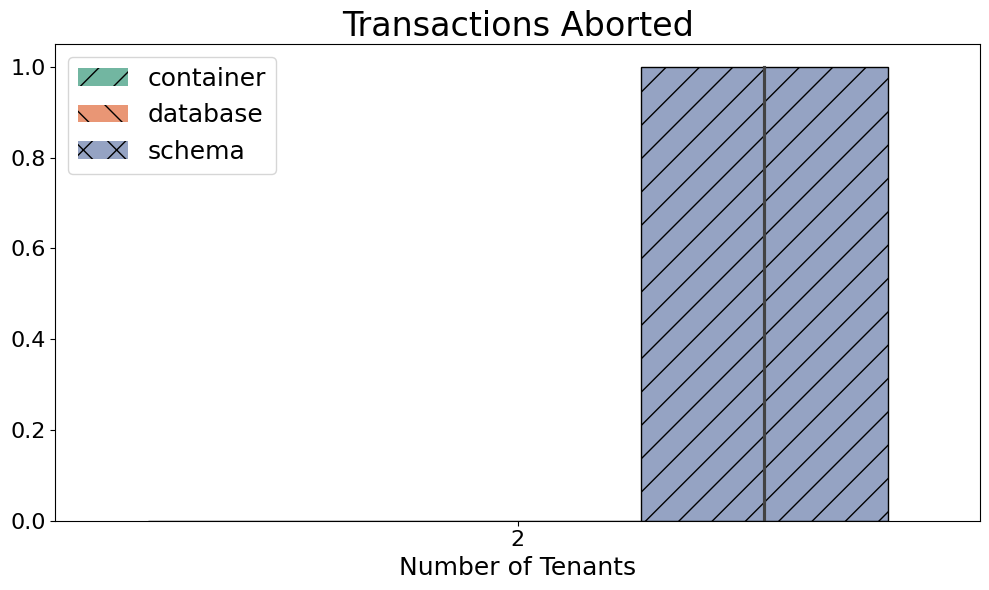

In [23]:
plot_bars(df_performance, y='Transactions Aborted', title='Transactions Aborted', estimator='max')

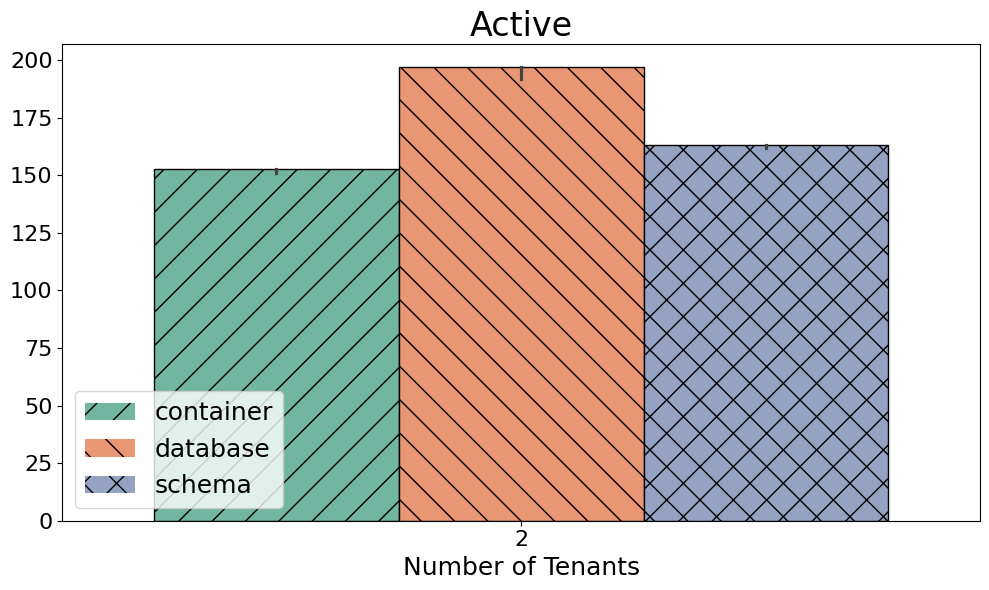

In [24]:
plot_bars(df_performance, y='Active', title='Active', estimator='max')

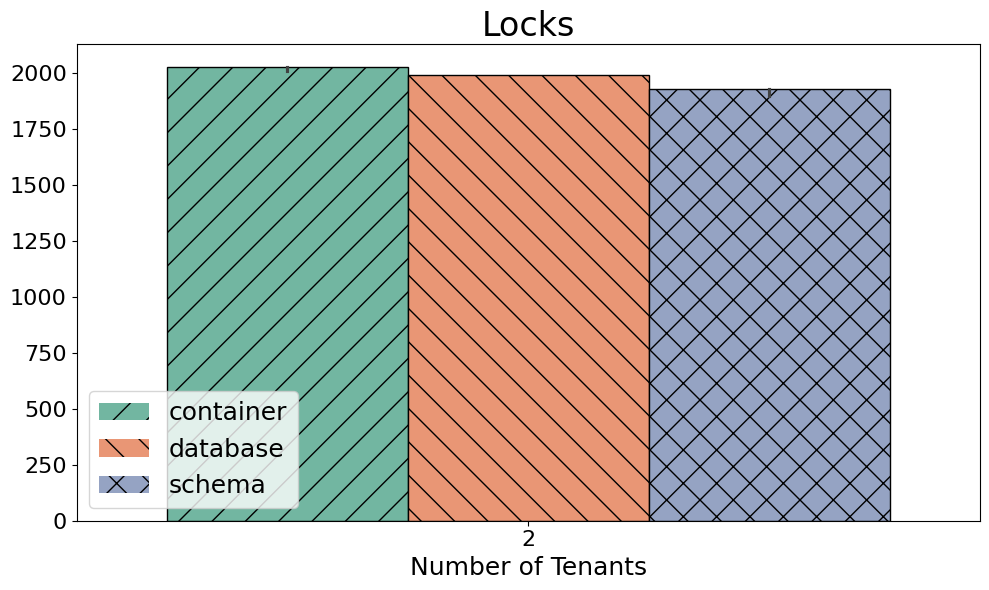

In [25]:
plot_bars(df_performance, y='Locks', title='Locks', estimator='max')

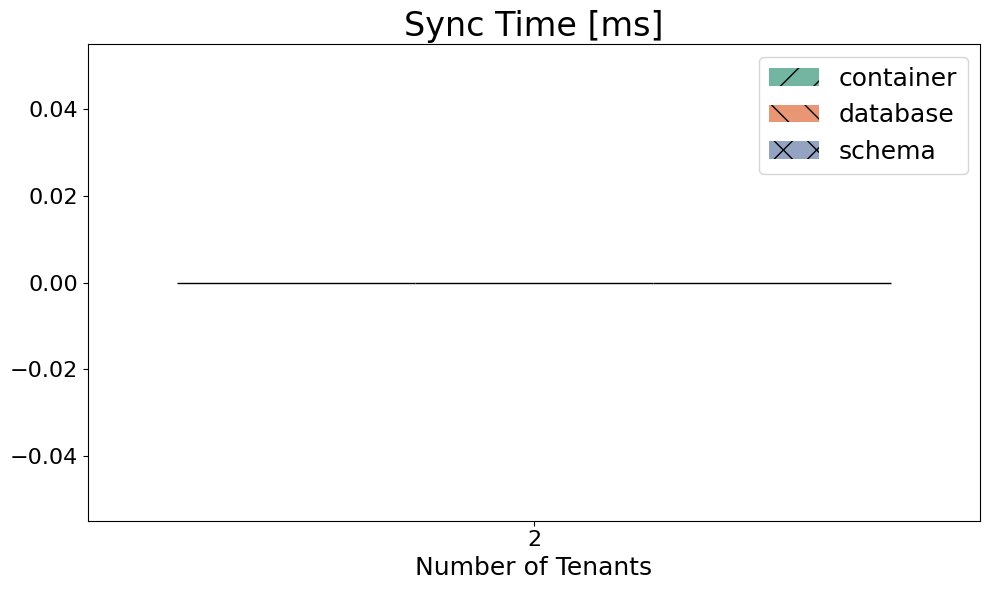

In [26]:
plot_bars(df_performance, y='Sync Time', title='Sync Time [ms]', estimator='max')

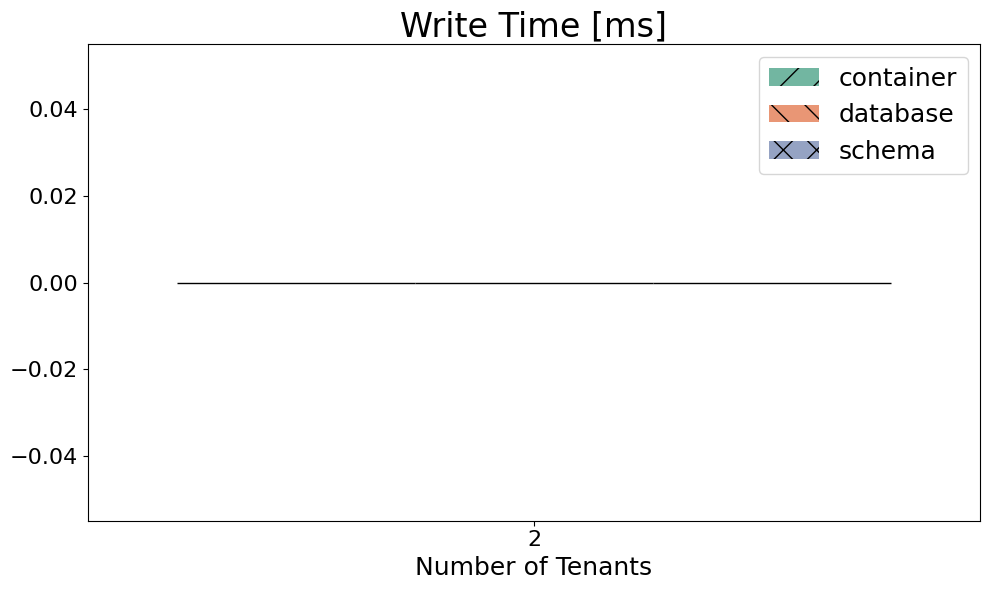

In [27]:
plot_bars(df_performance, y='Write Time', title='Write Time [ms]', estimator='max')

In [28]:
#plot_bars(df_performance, y='Variance of Core Util [%]', title='Variance of Core Util [%]', estimator='max')

# Performance Results per Tenant

In [29]:
df_performance = collect.get_performance_all_single()

df_performance_first = df_performance[df_performance['client']=='1']
df_performance_second = df_performance[df_performance['client']=='2']

df_performance

connection           configuration  \
connection_pod                                                                 
PostgreSQL-1-1-65536-0-1-1  PostgreSQL-1-1-65536-0-1  PostgreSQL-1-1-65536-0   
PostgreSQL-1-1-65536-1-1-1  PostgreSQL-1-1-65536-1-1  PostgreSQL-1-1-65536-1   
PostgreSQL-1-1-65536-0-2-1  PostgreSQL-1-1-65536-0-2  PostgreSQL-1-1-65536-0   
PostgreSQL-1-1-65536-1-2-1  PostgreSQL-1-1-65536-1-2  PostgreSQL-1-1-65536-1   
PostgreSQL-1-1-65536-1-1      PostgreSQL-1-1-65536-1    PostgreSQL-1-1-65536   
PostgreSQL-1-1-65536-1-2      PostgreSQL-1-1-65536-1    PostgreSQL-1-1-65536   
PostgreSQL-1-1-65536-2-1      PostgreSQL-1-1-65536-2    PostgreSQL-1-1-65536   
PostgreSQL-1-1-65536-2-2      PostgreSQL-1-1-65536-2    PostgreSQL-1-1-65536   
PostgreSQL-1-1-65536-1-1      PostgreSQL-1-1-65536-1    PostgreSQL-1-1-65536   
PostgreSQL-1-1-65536-1-2      PostgreSQL-1-1-65536-1    PostgreSQL-1-1-65536   
PostgreSQL-1-1-65536-2-1      PostgreSQL-1-1-65536-2    PostgreSQL-1-1-65536   
PostgreSQL-1-1-65536-2-2      PostgreSQL-1-1-65536-2    PostgreSQL-1-1-65536   

                           experiment_run client                    pod  \
connection_pod                                                            
PostgreSQL-1-1-65536-0-1-1              1      1  7fk6r.dbmsbenchmarker   
PostgreSQL-1-1-65536-1-1-1              1      1  29rrc.dbmsbenchmarker   
PostgreSQL-1-1-65536-0-2-1              1      2  pjppf.dbmsbenchmarker   
PostgreSQL-1-1-65536-1-2-1              1      2  g6hgp.dbmsbenchmarker   
PostgreSQL-1-1-65536-1-1                1      1  gxpwt.dbmsbenchmarker   
PostgreSQL-1-1-65536-1-2                1      1  rjjdg.dbmsbenchmarker   
PostgreSQL-1-1-65536-2-1                1      2  7b2zk.dbmsbenchmarker   
PostgreSQL-1-1-65536-2-2                1      2  sst92.dbmsbenchmarker   
PostgreSQL-1-1-65536-1-1                1      1  7tmw9.dbmsbenchmarker   
PostgreSQL-1-1-65536-1-2                1      1  dbxsg.dbmsbenchmarker   
PostgreSQL-1-1-65536-2-1                1      2  mtpsg.dbmsbenchmarker   
PostgreSQL-1-1-65536-2-2                1      2  vv8db.dbmsbenchmarker   

                           pod_count bench   profile target  time  ...  \
connection_pod                                                     ...   
PostgreSQL-1-1-65536-0-1-1         1  tpcc  postgres  65536  1200  ...   
PostgreSQL-1-1-65536-1-1-1         1  tpcc  postgres  65536  1200  ...   
PostgreSQL-1-1-65536-0-2-1         1  tpcc  postgres  65536  1200  ...   
PostgreSQL-1-1-65536-1-2-1         1  tpcc  postgres  65536  1200  ...   
PostgreSQL-1-1-65536-1-1           2  tpcc  postgres  65536  1200  ...   
PostgreSQL-1-1-65536-1-2           2  tpcc  postgres  65536  1200  ...   
PostgreSQL-1-1-65536-2-1           2  tpcc  postgres  65536  1200  ...   
PostgreSQL-1-1-65536-2-2           2  tpcc  postgres  65536  1200  ...   
PostgreSQL-1-1-65536-1-1           2  tpcc  postgres  65536  1200  ...   
PostgreSQL-1-1-65536-1-2           2  tpcc  postgres  65536  1200  ...   
PostgreSQL-1-1-65536-2-1           2  tpcc  postgres  65536  1200  ...   
PostgreSQL-1-1-65536-2-2           2  tpcc  postgres  65536  1200  ...   

                           Latency Distribution.Median Latency (microseconds)  \
connection_pod                                                                  
PostgreSQL-1-1-65536-0-1-1                                              13327   
PostgreSQL-1-1-65536-1-1-1                                              13180   
PostgreSQL-1-1-65536-0-2-1                                              13594   
PostgreSQL-1-1-65536-1-2-1                                              13921   
PostgreSQL-1-1-65536-1-1                                                16776   
PostgreSQL-1-1-65536-1-2                                                17311   
PostgreSQL-1-1-65536-2-1                                                16560   
PostgreSQL-1-1-65536-2-2                                                16631   
PostgreSQL-1-1-65536-1-

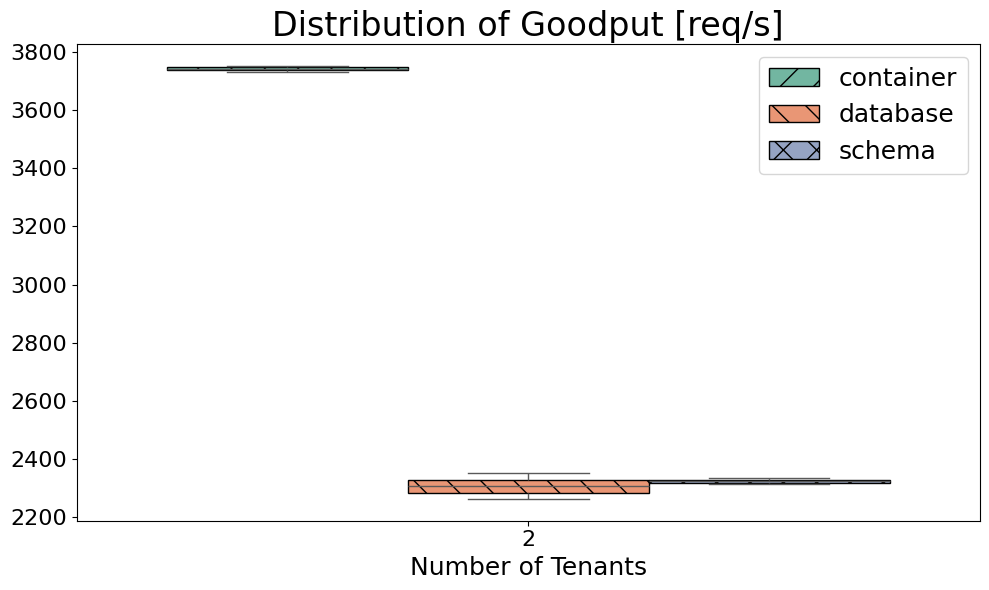

In [30]:
plot_boxplots(df_performance_first, y='Goodput (requests/second)', title='Distribution of Goodput [req/s]')

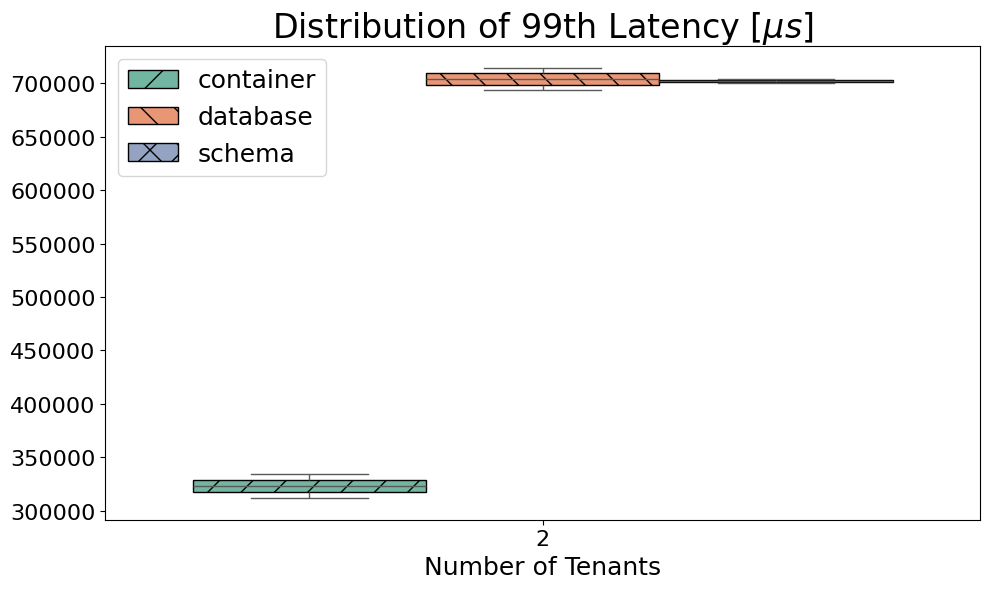

In [31]:
plot_boxplots(df_performance_first, y='Latency Distribution.99th Percentile Latency (microseconds)', title='Distribution of 99th Latency [$\mu s$]')

# Performance Results per Total

In [56]:
df_performance = collect.get_performance_all()

df_performance_first = df_performance[df_performance['client']=='1']
df_performance_second = df_performance[df_performance['client']=='2']

df_performance.dropna(inplace=True)

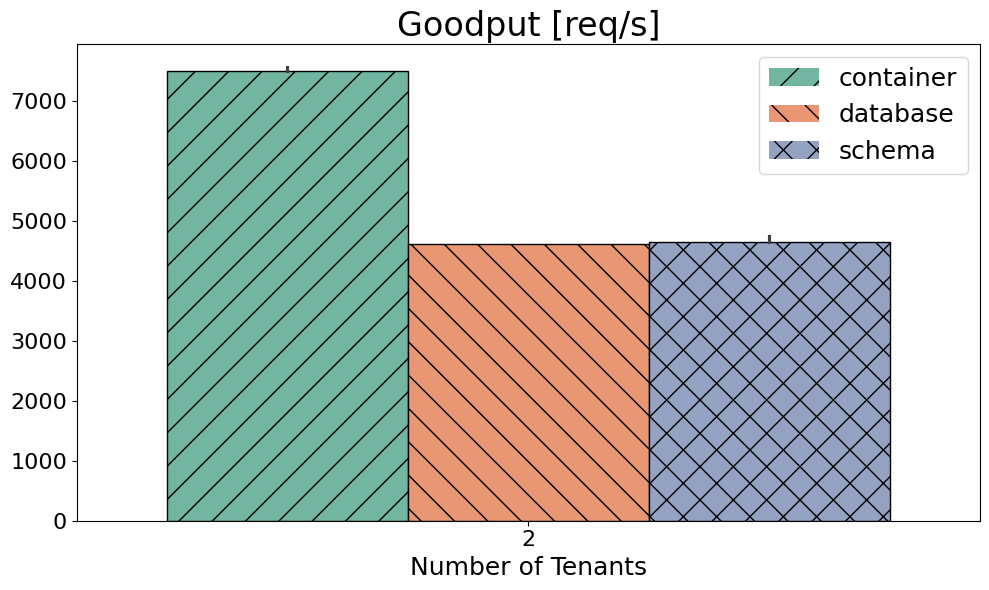

In [57]:
plot_bars(df_performance, y='Goodput (requests/second)', title='Goodput [req/s]', estimator='min')

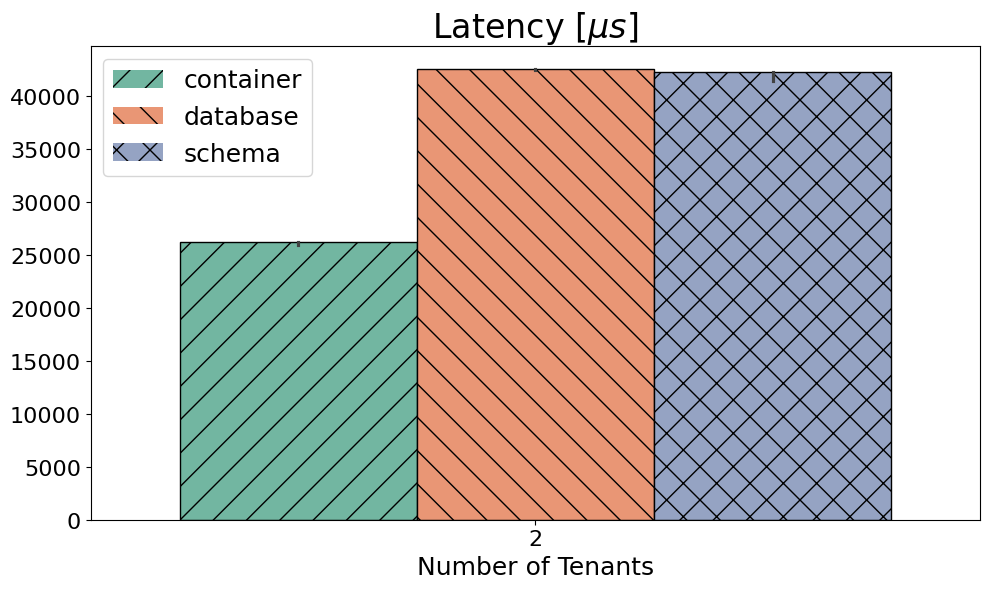

In [58]:
plot_bars(df_performance, y='Latency Distribution.Average Latency (microseconds)', title='Latency [$\mu s$]', estimator='max')

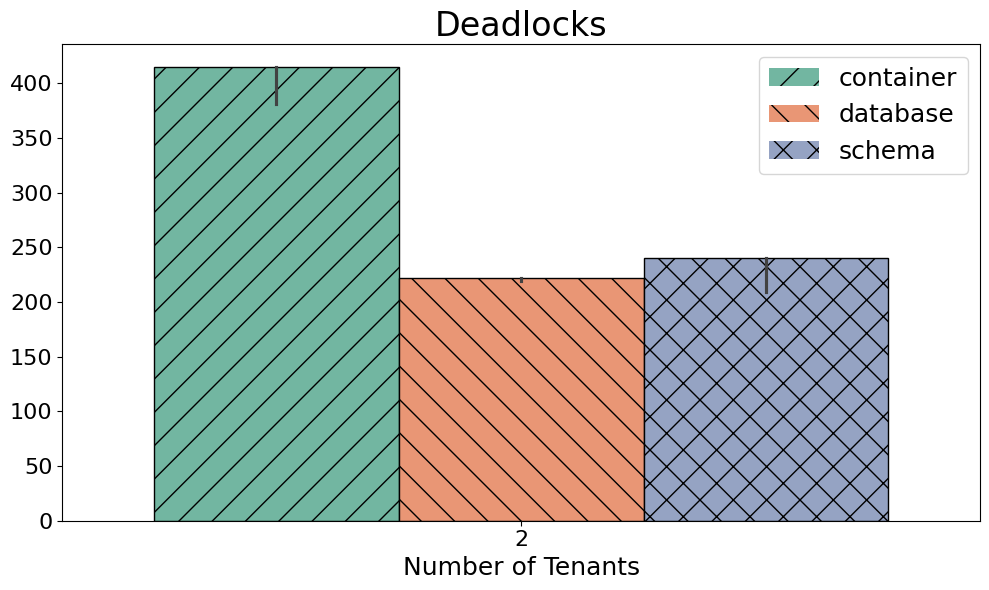

In [35]:
plot_bars(df_performance, y='num_errors', title='Deadlocks', estimator='max')

In [36]:
df_performance = collect.get_loading_time_max_all()

df_performance_first = df_performance[df_performance['client']=='1']
df_performance_second = df_performance[df_performance['client']=='2']

df_performance

time_load time_ingest time_check terminals pods  \
PostgreSQL-1-1-65536-0-1     363.0       150.0      211.0         1    1   
PostgreSQL-1-1-65536-0-2     363.0       150.0      211.0         1    1   
PostgreSQL-1-1-65536-1-1     355.0       146.0      206.0         1    1   
PostgreSQL-1-1-65536-1-2     355.0       146.0      206.0         1    1   
PostgreSQL-1-1-65536-1       541.0       240.0      297.0         1    2   
PostgreSQL-1-1-65536-2       541.0       240.0      297.0         1    2   
PostgreSQL-1-1-65536-1       548.0       245.0      299.0         1    2   
PostgreSQL-1-1-65536-2       548.0       245.0      299.0         1    2   

                         tenant client datadisk       type  num_tenants  \
PostgreSQL-1-1-65536-0-1      0      1    10229  container            2   
PostgreSQL-1-1-65536-0-2      0      2    15100  container            2   
PostgreSQL-1-1-65536-1-1      1      1    10573  container            2   
PostgreSQL-1-1-65536-1-2      1      2    19228  container            2   
PostgreSQL-1-1-65536-1               1    14497   database            2   
PostgreSQL-1-1-65536-2               2    26471   database            2   
PostgreSQL-1-1-65536-1               1    23940     schema            2   
PostgreSQL-1-1-65536-2               2    36427     schema            2   

                                code  
PostgreSQL-1-1-65536-0-1  1755696350  
PostgreSQL-1-1-65536-0-2  1755696350  
PostgreSQL-1-1-65536-1-1  1755696350  
PostgreSQL-1-1-65536-1-2  1755696350  
PostgreSQL-1-1-65536-1    1755693435  
PostgreSQL-1-1-65536-2    1755693435  
PostgreSQL-1-1-65536-1    1755690481  
PostgreSQL-1-1-65536-2    1755690481

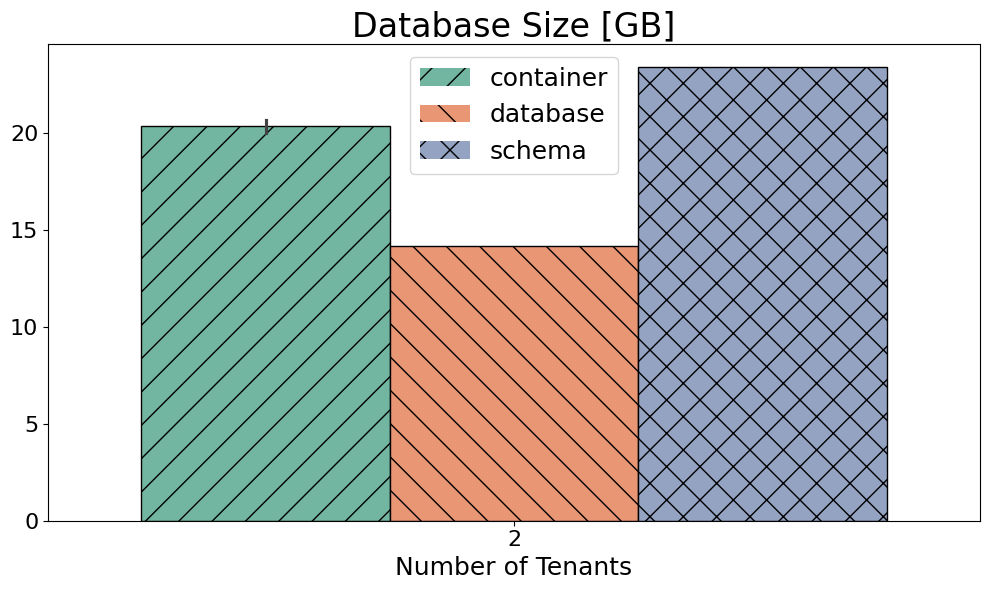

In [37]:
df_performance_first = df_performance[df_performance['client'] == '1']
# Divide datadisk by the count of rows with the same type and num_tenants
df = df_performance_first.copy()
# Create a mask for rows where type is not "container"
mask = df['type'] != 'container'

# Only apply the group count to the relevant rows
group_counts = df[mask].groupby(['type', 'num_tenants'])['datadisk'].transform('count')

# Initialize the column with NaN (or 0, if preferred)
df['datadisk_normalized'] = df['datadisk'] / 1024

# Apply the normalized value only where the mask is True
df.loc[mask, 'datadisk_normalized'] = df.loc[mask, 'datadisk'] / group_counts / 1024

plot_bars(df, y='datadisk_normalized', title='Database Size [GB]', estimator='sum')

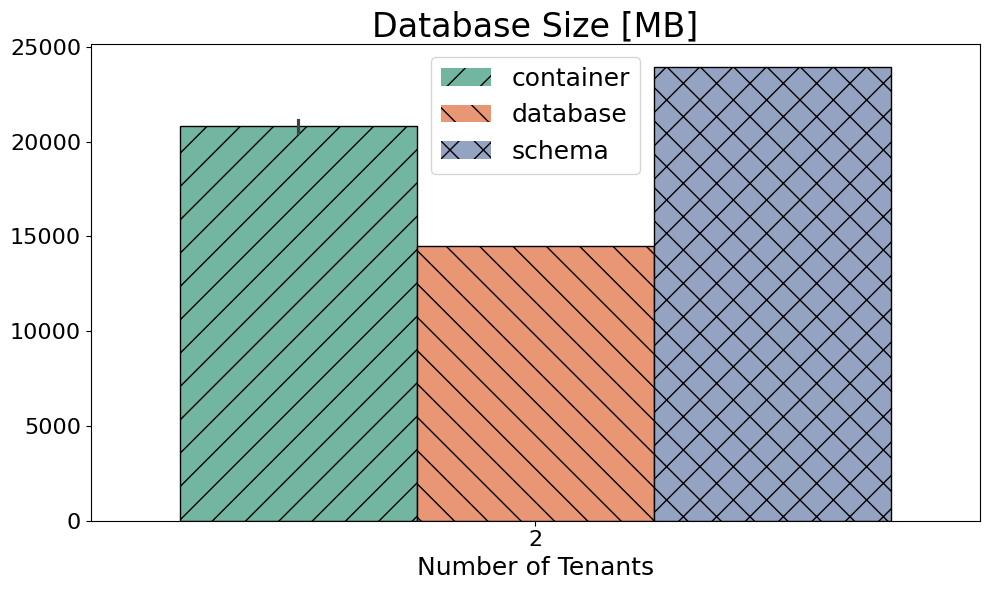

In [38]:
plot_bars(df_performance_first, y='datadisk', title='Database Size [MB]', estimator='sum')

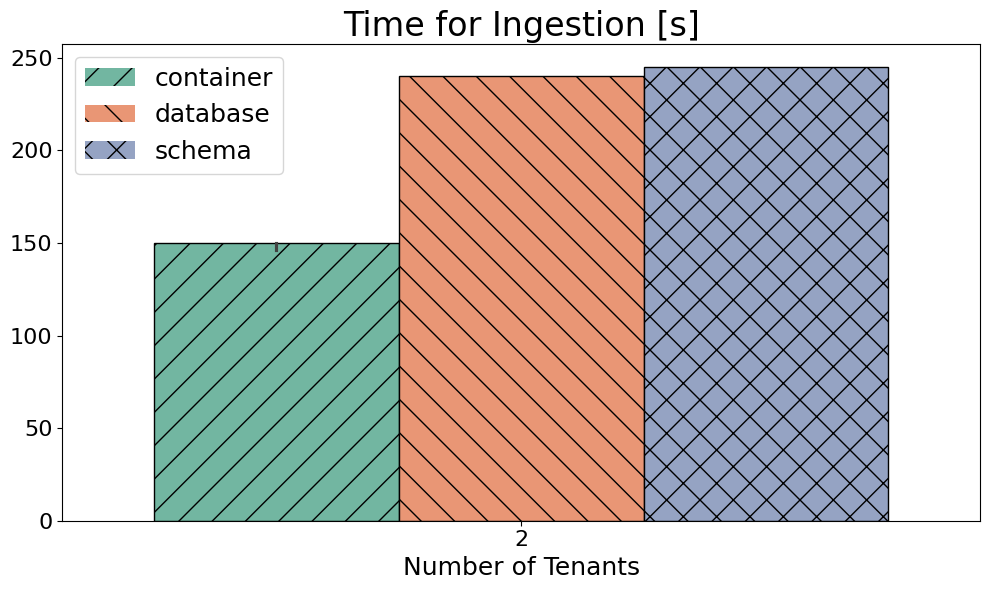

In [39]:
plot_bars(df_performance_first, y='time_ingest', title='Time for Ingestion [s]', estimator='max')

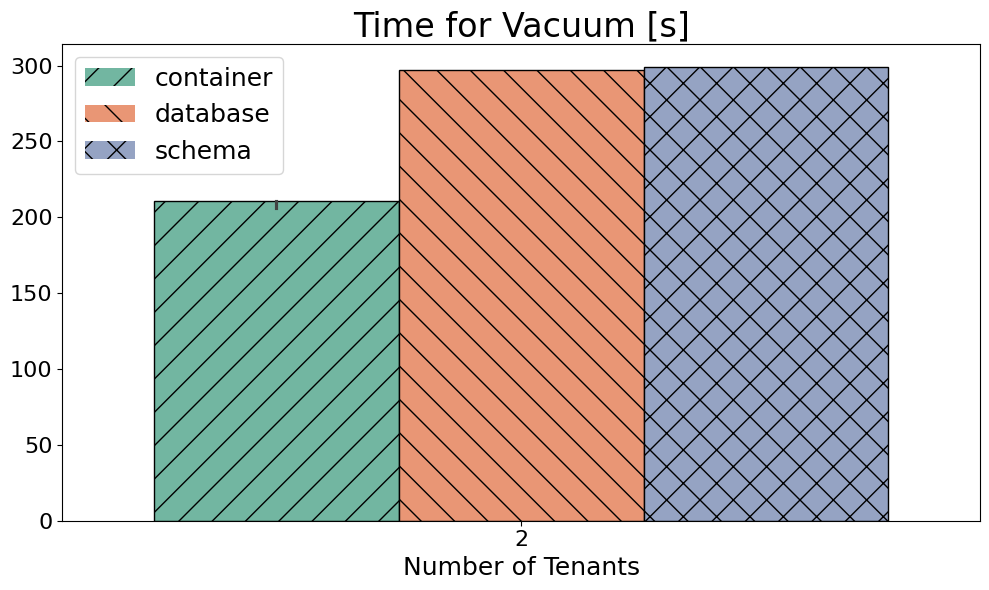

In [40]:
plot_bars(df_performance_first, y='time_check', title='Time for Vacuum [s]', estimator='max')

# Hardware Monitoring for Benchmarking Phase

In [41]:
df_performance = collect.get_monitoring_all(type="stream")

df_performance_first = df_performance[df_performance['client']=='1']
df_performance_second = df_performance[df_performance['client']=='2']

df_performance.T

0             1             0  \
client                                1             2             1   
CPU [CPUs]                     36342.17      37168.74      22757.25   
Max RAM [Gb]                      34.56         47.94         22.48   
Max RAM Cached [Gb]               73.99         93.64         56.56   
Max CPU                           38.16         38.66         23.24   
CPU Throttled                       0.0           0.0           0.0   
Locks                           2026.62       2009.87       1989.86   
Access Exclusive                   10.8          8.08          7.39   
Access Share                      666.5        656.92        648.62   
Exclusive                         35.38         34.81         36.77   
Row Exclusive                    663.84        662.44        666.36   
Row Share                        645.57         643.1        625.56   
Share                               0.0           0.0           0.0   
Share Row Exclusive                 0.0           0.0           0.0   
Share Update Exclusive             4.53          4.51          5.14   
SI Read                             0.0           0.0           0.0   
Active                           152.74         151.2        191.67   
Idle                               3.67          2.98          4.18   
Transactions Idle                 48.92         50.44         47.39   
Transactions Aborted                0.0           0.0           0.0   
Block Hits                 2638030924.0  6541039564.0  1697032514.0   
Block Reads                   2657307.0     5366363.0     1620871.0   
Heap Reads                    2207945.0     4361201.0     1437132.0   
Heap Hits                  1389346939.0  3423106408.0   924283125.0   
Sync Time                           0.0           0.0           0.0   
Write Time                          0.0           0.0           0.0   
Number Autoanalyze                431.0        1169.0         402.0   
Number Autovacuum                 371.0         978.0         362.0   
Cache Hit Ratio [%]               99.86        99.345          99.9   
Variance of Core Util [%]         24.03          26.0         11.01   
type                          container     container      database   
num_tenants                           2             2             2   
code                         1755696350    1755696350    1755693435   

                                      1             0             1  
client                                2             1             2  
CPU [CPUs]                     22993.46      22175.03       24096.4  
Max RAM [Gb]                      31.16          23.5         33.01  
Max RAM Cached [Gb]               66.95         66.04         80.97  
Max CPU                           24.27         24.94         23.75  
CPU Throttled                       0.0           0.0           0.0  
Locks                           1991.15       1929.35       1894.99  
Access Exclusive                   6.97          8.39          6.08  
Access Share                     642.65         624.1        614.89  
Exclusive                          37.1         38.36          36.8  
Row Exclusive                    672.04         656.9        644.69  
Row Share                        626.13        595.72        586.11  
Share                               0.0           0.0           0.0  
Share Row Exclusive                 0.0           0.0           0.0  
Share Update Exclusive             6.27          5.88          6.43  
SI Read                             0.0           0.0           0.0  
Active                           197.04        161.98        163.36  
Idle                               4.12          2.14          2.09  
Transactions Idle                 46.11         40.98         40.01  
Transactions Aborted                0.0           0.0           1.0  
Block Hits                 1526497482.0  1638259420.0  1757558751.0  
Block Reads                    407514.0     1353511.0      594992.0  
Heap Reads   

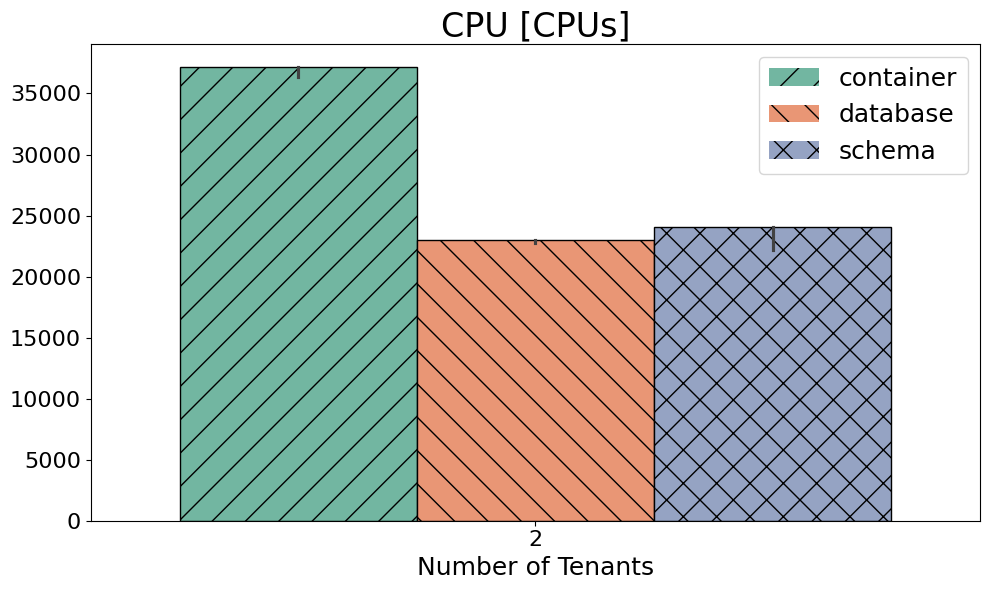

In [42]:
plot_bars(df_performance, y='CPU [CPUs]', title='CPU [CPUs]', estimator='max')

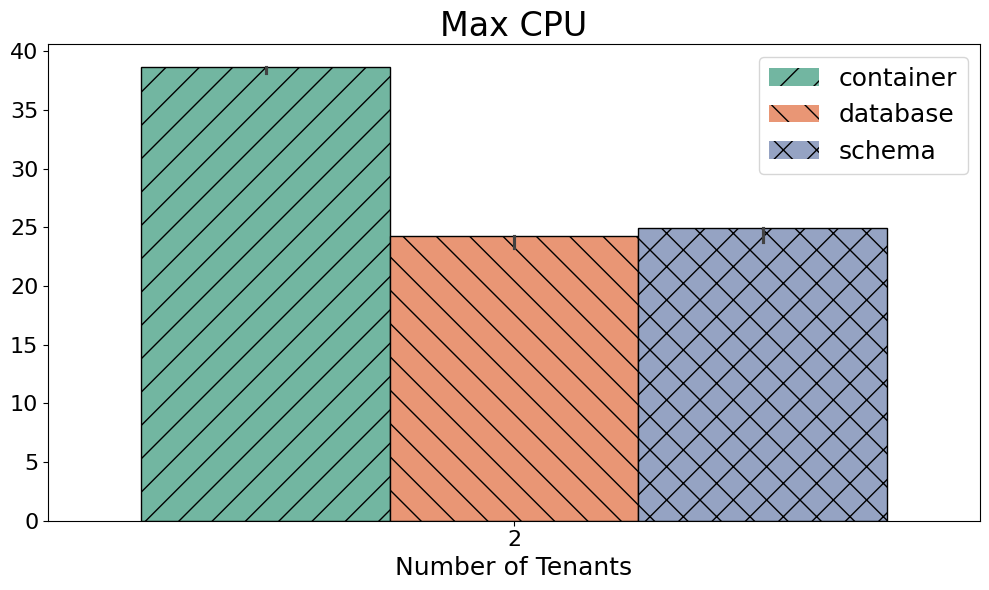

In [43]:
plot_bars(df_performance, y='Max CPU', title='Max CPU', estimator='max')

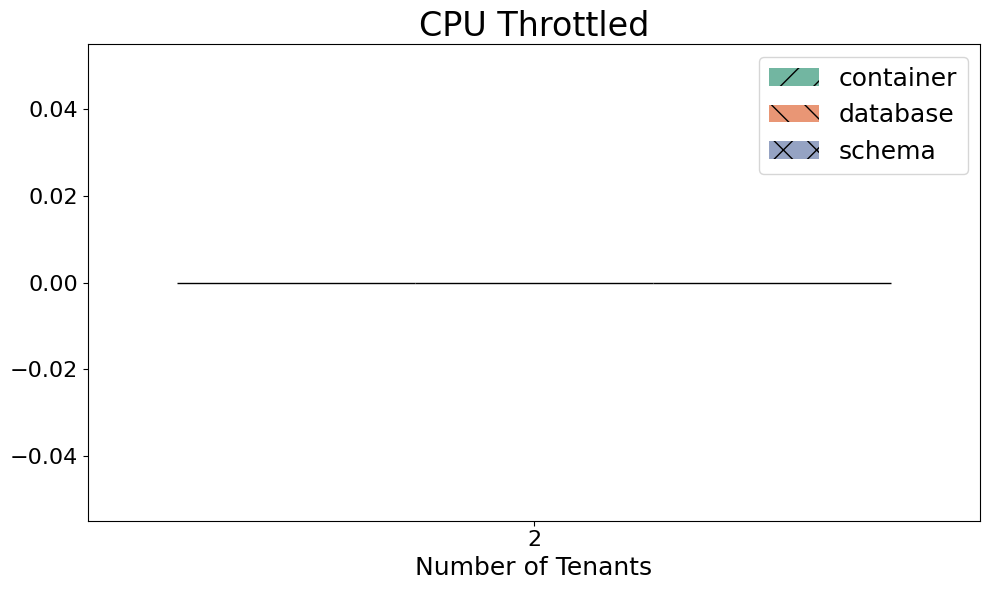

In [44]:
plot_bars(df_performance, y='CPU Throttled', title='CPU Throttled', estimator='max')

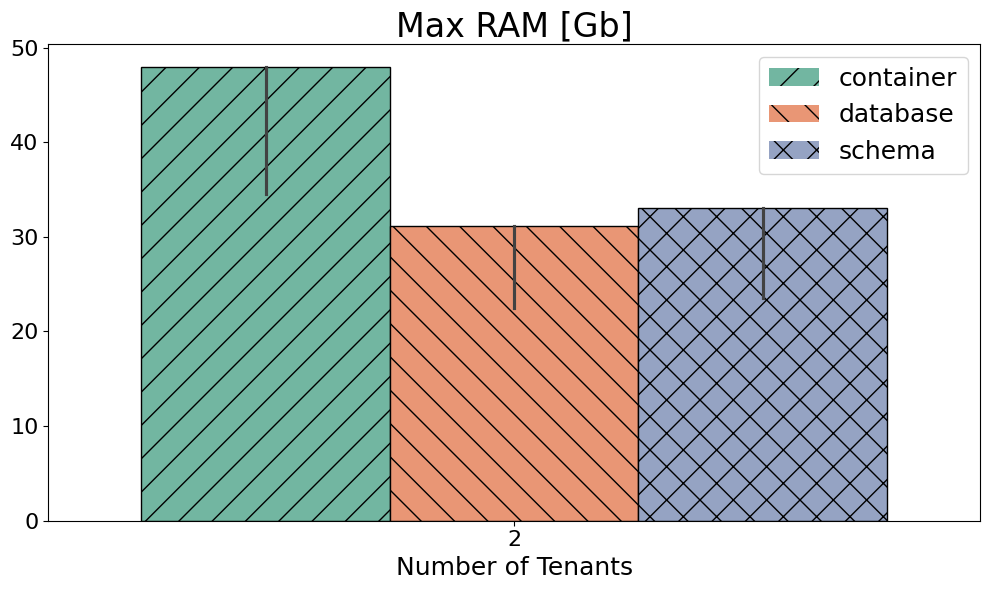

In [45]:
plot_bars(df_performance, y='Max RAM [Gb]', title='Max RAM [Gb]', estimator='max')

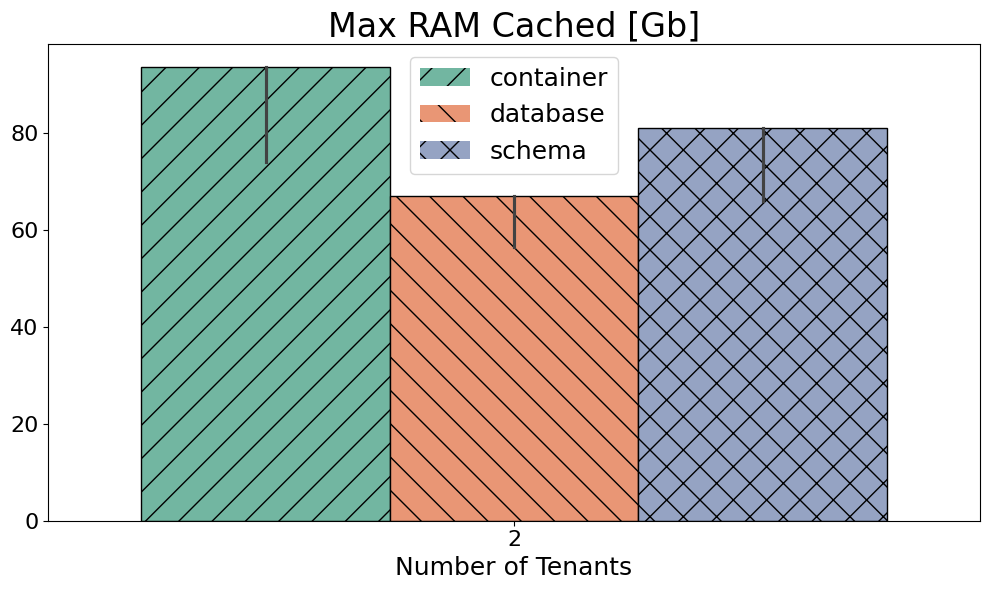

In [46]:
plot_bars(df_performance, y='Max RAM Cached [Gb]', title='Max RAM Cached [Gb]', estimator='max')

# Hardware Monitoring for Loading Phase

In [124]:
df_performance = collect.get_monitoring_all("loading")

df_performance_first = df_performance[df_performance['client']=='1']
df_performance_second = df_performance[df_performance['client']=='2']

df_performance

1755690481 None
1755693435 None
1755696350 None


KeyError: 'num_tenants'

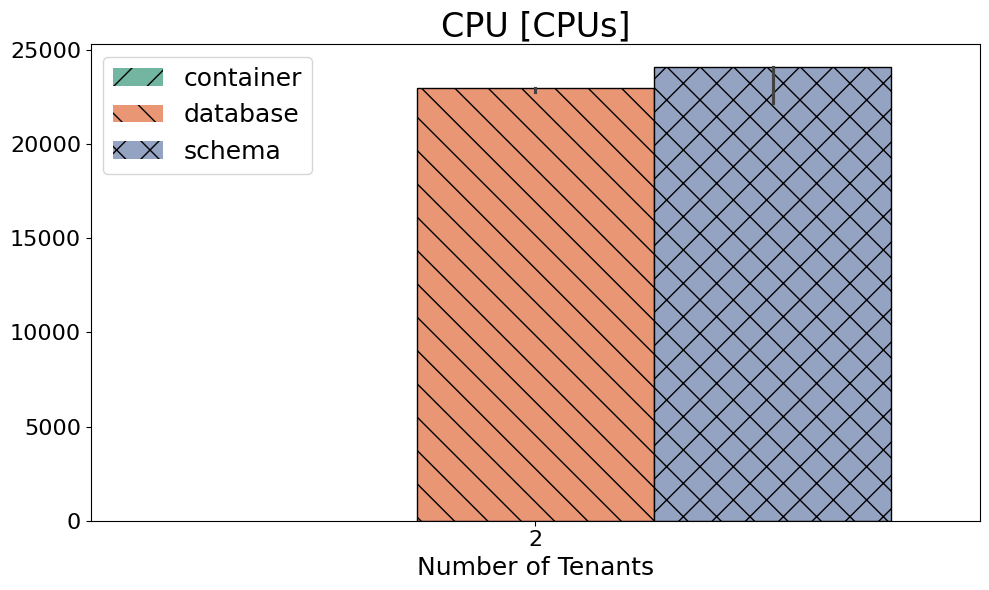

In [77]:
plot_bars(df_performance, y='CPU [CPUs]', title='CPU [CPUs]', estimator='max')

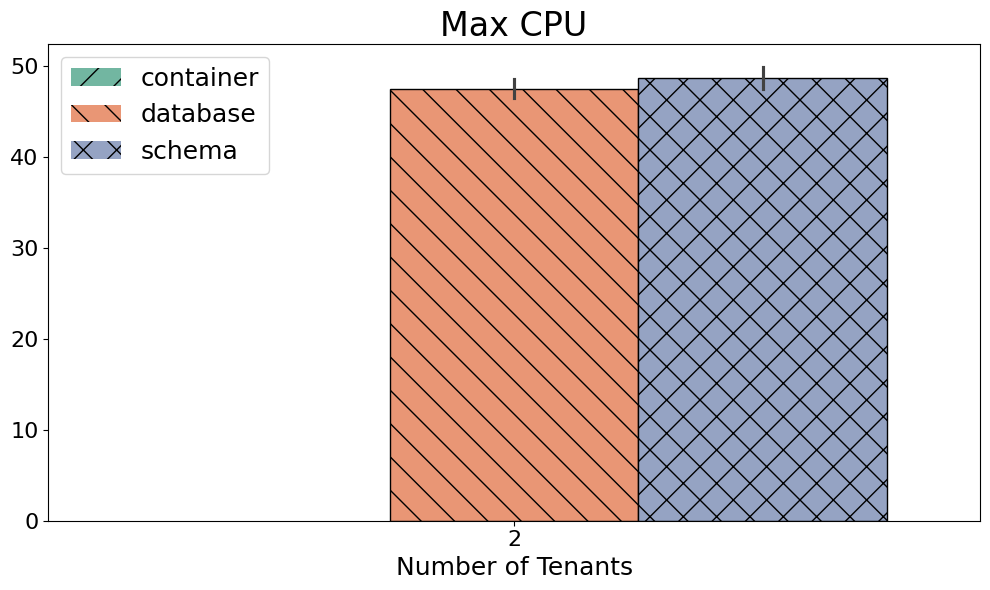

In [78]:
plot_bars(df_performance, y='Max CPU', title='Max CPU', estimator='sum')

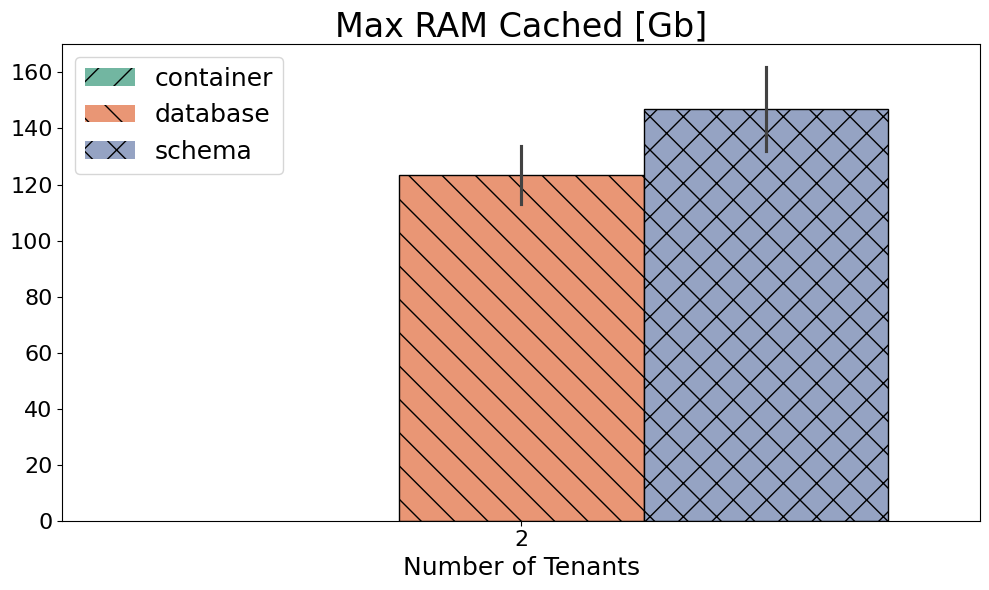

In [79]:
plot_bars(df_performance, y='Max RAM Cached [Gb]', title='Max RAM Cached [Gb]', estimator='sum')

# Efficiency

In [59]:
client = '1'

df_performance_monitoring = collect.get_monitoring_all(type="stream")
df_performance_monitoring = df_performance_monitoring[df_performance_monitoring['client'] == client]
df_performance = collect.get_performance_all()
df_performance = df_performance[df_performance['client'] == client]
merged_df = pd.merge(df_performance, df_performance_monitoring, on=['type', 'num_tenants', 'code', 'client'], how='inner')
#merged_df['I_Lat'] = 1./merged_df['E_Lat']
merged_df['E_Tpx'] = merged_df['Goodput (requests/second)'] / merged_df['CPU [CPUs]'] * 600.
merged_df['E_Lat'] = 1./np.sqrt(merged_df['Latency Distribution.Average Latency (microseconds)']*merged_df['CPU [CPUs]']/1E6)
merged_df['E_RAM'] = (merged_df['Goodput (requests/second)']) / merged_df['Max RAM [Gb]']
merged_df

client  Goodput (requests/second)  num_errors  \
0      1                7486.300520         415   
1      1                4612.628209         222   
2      1                4645.543978         209   

   Latency Distribution.Average Latency (microseconds)  \
0                                              26221.5   
1                                              42607.5   
2                                              42299.5   

   Latency Distribution.99th Percentile Latency (microseconds)       type  \
0                                                       334549  container   
1                                                       714583   database   
2                                                       704003     schema   

   num_tenants        code  CPU [CPUs]  Max RAM [Gb]  ...     Heap Hits  \
0            2  1755696350    36342.17         34.56  ...  1.389347e+09   
1            2  1755693435    22757.25         22.48  ...  9.242831e+08   
2            2  1755690481    22175.03         23.50  ...  8.562967e+08   

   Sync Time  Write Time  Number Autoanalyze  Number Autovacuum  \
0        0.0         0.0               431.0              371.0   
1        0.0         0.0               402.0              362.0   
2        0.0         0.0               345.0              324.0   

   Cache Hit Ratio [%]  Variance of Core Util [%]       E_Tpx     E_Lat  \
0                99.86                      24.03  123.596921  0.032394   
1                99.90                      11.01  121.612977  0.032114   
2                99.86                      10.86  125.696623  0.032651   

        E_RAM  
0  216.617492  
1  205.188088  
2  197.682722  

[3 rows x 40 columns]

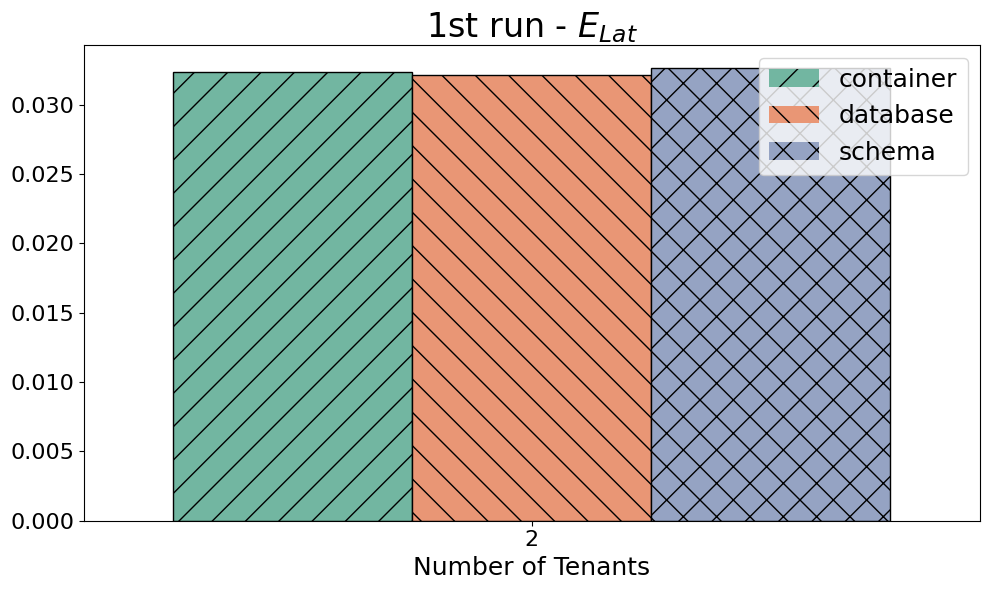

In [60]:
plot_bars(merged_df, y='E_Lat', title='1st run - $E_{Lat}$', estimator='max')

In [61]:
#plot_bars(merged_df, y='I_Lat', title='1st run - $I_{Lat}$', estimator='max')

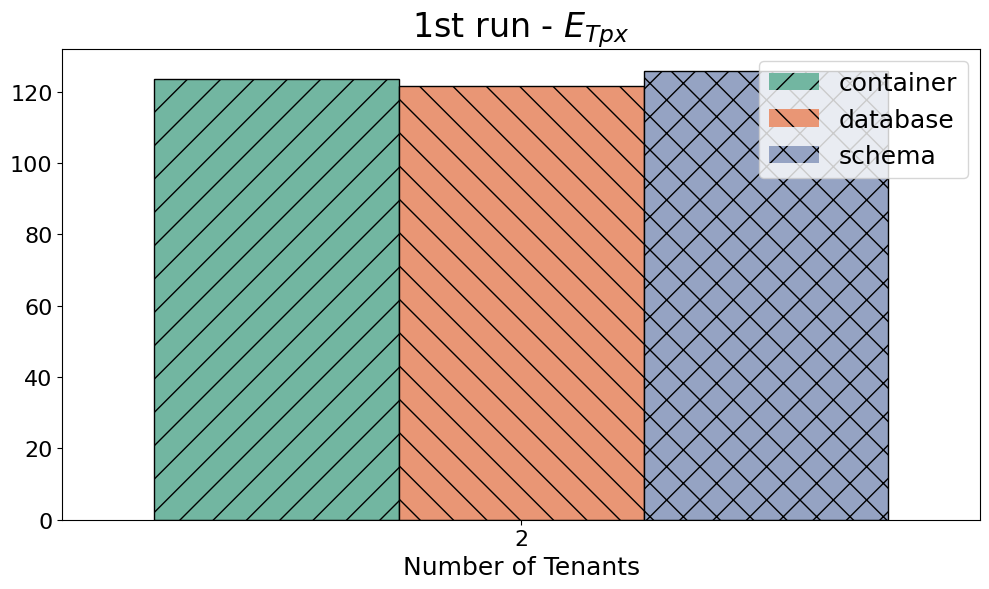

In [62]:
plot_bars(merged_df, y='E_Tpx', title='1st run - $E_{Tpx}$', estimator='max')

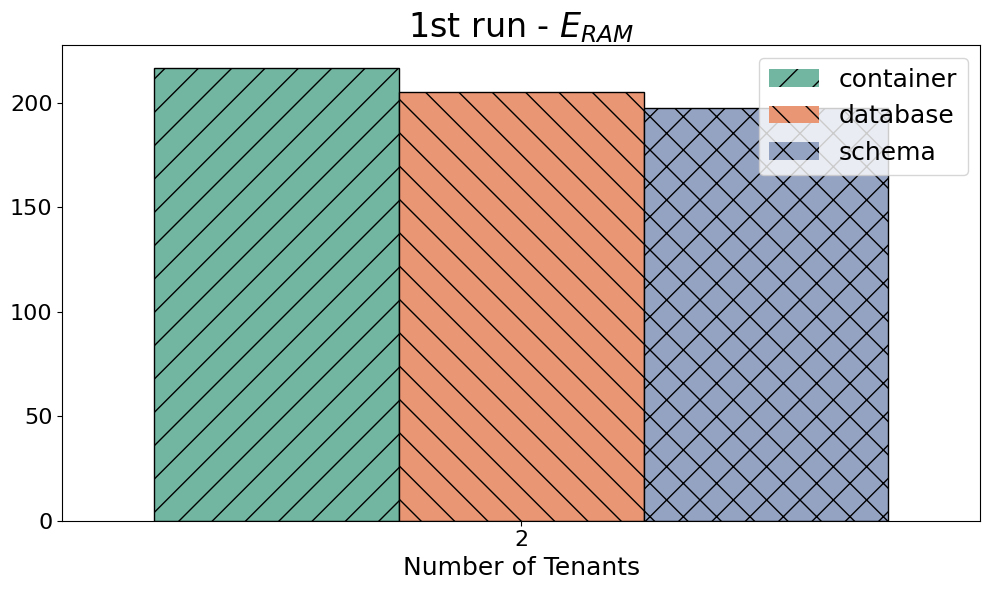

In [63]:
plot_bars(merged_df, y='E_RAM', title='1st run - $E_{RAM}$', estimator='min')

In [64]:
client = '2'

df_performance_monitoring = collect.get_monitoring_all(type="stream")
df_performance_monitoring = df_performance_monitoring[df_performance_monitoring['client'] == client]
df_performance = collect.get_performance_all()
df_performance = df_performance[df_performance['client'] == client]
merged_df = pd.merge(df_performance, df_performance_monitoring, on=['type', 'num_tenants', 'code', 'client'], how='inner')
#merged_df['CPUs/Request'] = merged_df['CPU [CPUs]'] / merged_df['Goodput (requests/second)'] / 600.
merged_df['E_Tpx'] = merged_df['Goodput (requests/second)'] / merged_df['CPU [CPUs]'] * 600.
merged_df['E_Lat'] = 1./np.sqrt(merged_df['Latency Distribution.Average Latency (microseconds)']*merged_df['CPU [CPUs]']/1E6)
merged_df['E_RAM'] = (merged_df['Goodput (requests/second)']) / merged_df['Max RAM [Gb]']

merged_df

client  Goodput (requests/second)  num_errors  \
0      2                7560.925590         381   
1      2                4617.888195         219   
2      2                4736.978165         240   

   Latency Distribution.Average Latency (microseconds)  \
0                                              25980.0   
1                                              42517.0   
2                                              41474.0   

   Latency Distribution.99th Percentile Latency (microseconds)       type  \
0                                                       303649  container   
1                                                       755719   database   
2                                                       702615     schema   

   num_tenants        code  CPU [CPUs]  Max RAM [Gb]  ...     Heap Hits  \
0            2  1755696350    37168.74         47.94  ...  3.423106e+09   
1            2  1755693435    22993.46         31.16  ...  7.573223e+08   
2            2  1755690481    24096.40         33.01  ...  9.555812e+08   

   Sync Time  Write Time  Number Autoanalyze  Number Autovacuum  \
0        0.0         0.0              1169.0              978.0   
1        0.0         0.0               383.0              352.0   
2        0.0         0.0               345.0              330.0   

   Cache Hit Ratio [%]  Variance of Core Util [%]       E_Tpx     E_Lat  \
0               99.345                      26.00  122.052977  0.032180   
1               99.910                      11.32  120.500913  0.031983   
2               99.880                      11.46  117.950686  0.031633   

        E_RAM  
0  157.716429  
1  148.199236  
2  143.501308  

[3 rows x 40 columns]

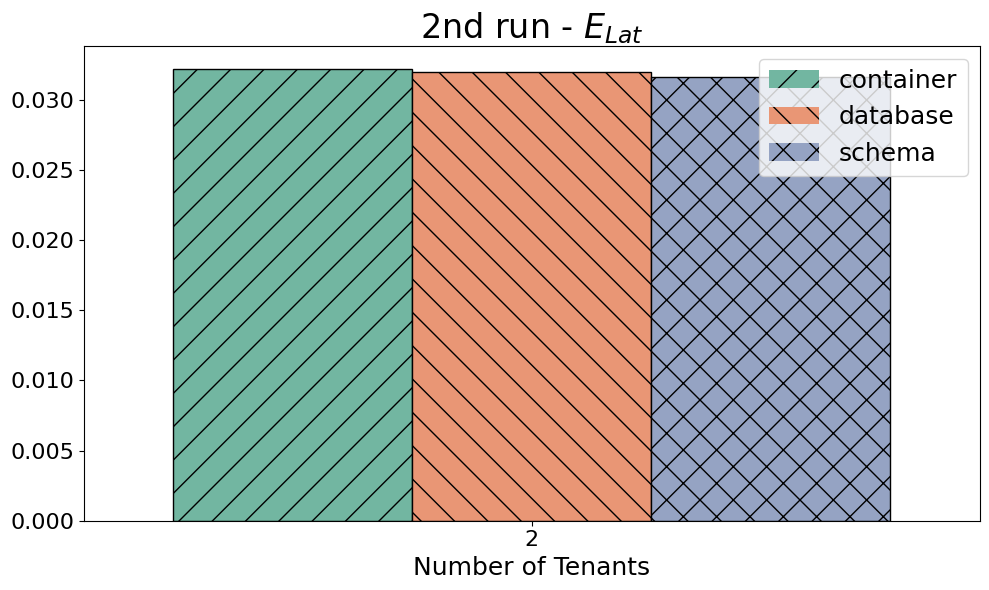

In [65]:
plot_bars(merged_df, y='E_Lat', title='2nd run - $E_{Lat}$', estimator='max')

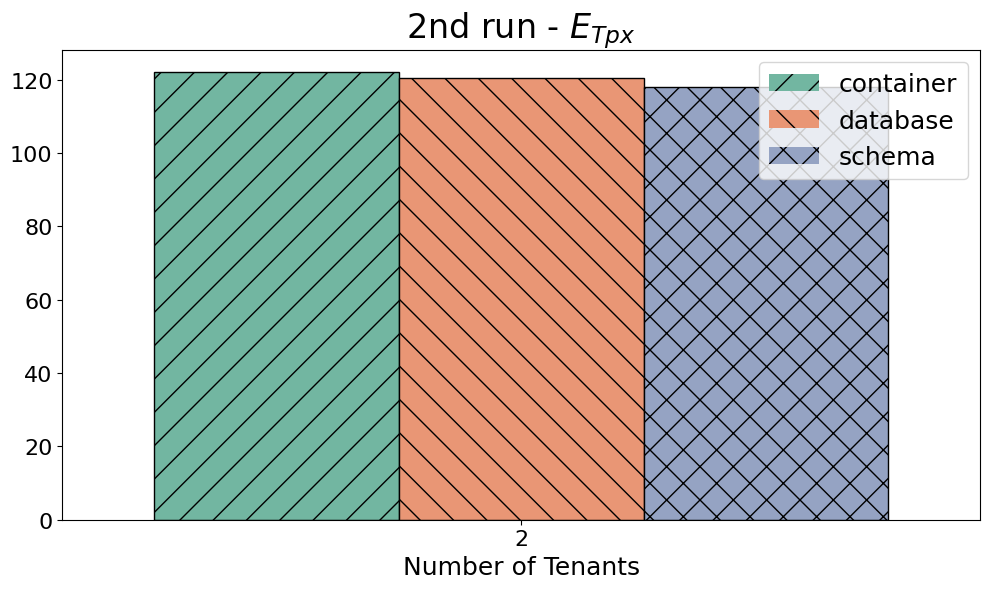

In [66]:
plot_bars(merged_df, y='E_Tpx', title='2nd run - $E_{Tpx}$', estimator='max')

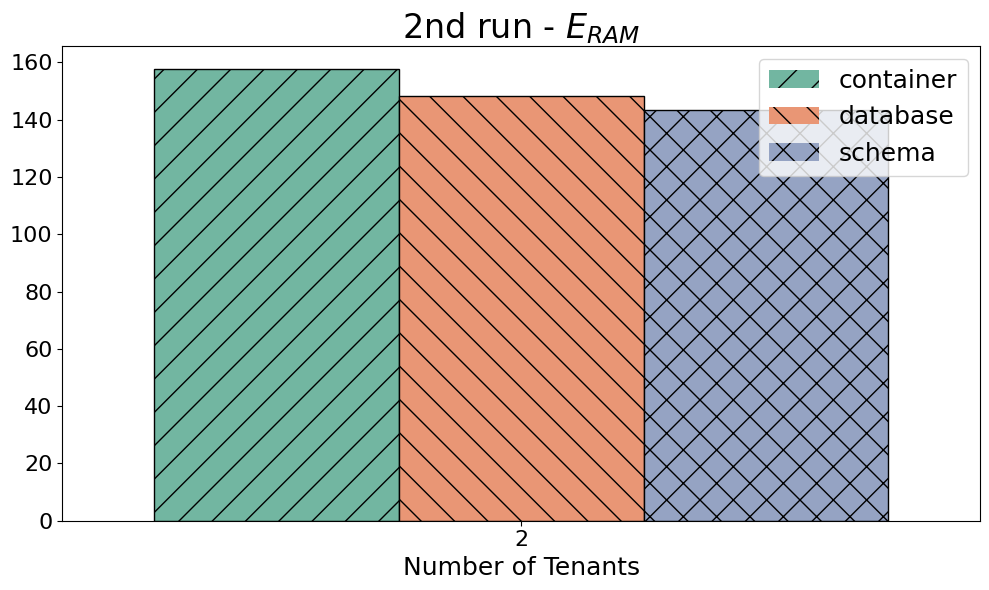

In [133]:
plot_bars(merged_df, y='E_RAM', title='2nd run - $E_{RAM}$', estimator='max')

In [56]:
import os
import zipfile

def zip_all_results():
    # Set the base directory containing the folders
    base_dir = path # "/path/to/your/folders"  # CHANGE THIS to your actual directory
    # List all folder names in the directory
    folder_names = codes
    # Create a zip for each folder
    for folder in folder_names:
        folder_path = os.path.join(base_dir, folder)
        zip_path = os.path.join(base_dir, f"{folder}.zip")
        print(f"Zipping {folder_path} to {zip_path}...")
        with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
            for root, _, files in os.walk(folder_path):
                for file in files:
                    abs_path = os.path.join(root, file)
                    rel_path = os.path.relpath(abs_path, folder_path)
                    zipf.write(abs_path, arcname=os.path.join(folder, rel_path))
    print("✅ Done zipping all folders.")


In [57]:
#zip_all_results()